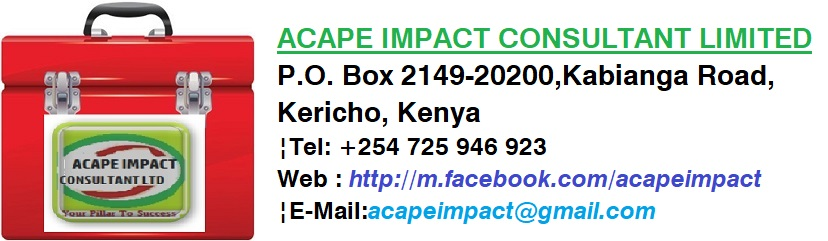

In [12]:
from IPython.display import Image
Image("C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/AcapeLogo.jpg")

# PART ONE: INDEPENDENT AXLE LOAD MONITORING DATA ANALYSIS FOR KENYA ROADS BOARD
# DESIGNED BY: DIR. PETER KIPROTICH NGETICH,
#  (Up and Running with Python)
# DATA IMPORTATION PROCESSES:- (Use Jupyter Notebook and make sure your data imported as Q3 (excel)

In [13]:
#IMPORT REQUIRED MODULES/LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For data visualization

#DivertedUndivertedData
DivertedUndivertedData = pd.read_csv('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/DivertedUndivertedData.csv')
DivertedUndivertedData

,Station,Frequency Diverted (Weighed),Frequency Un-diverted,Total HGV Traffic
0,MOMBASA,132,308,440
1,SHIMANZI,60,109,169
2,MWALA,53,29,82
3,NZUKINI,59,98,157
4,CHUKA,11,23,34
5,MAJIMBO-SIAKAGO-UGWERI,13,19,32
6,NDARAGWA,50,130,180
7,KAJIADO-IMARORO RD,127,240,367
8,NAIROBI-BABA DOGO RD,151,422,573
9,THIKA-KIGANJO-BAT,50,79,129


In [14]:
# READ YOUR INDEPENDENT RAW EXCEL DATA NAMED Q3 ON COMPUTER DESKTOP UNDER Rbased FOLDER IN Independet FOLDER.

Q3 = pd.ExcelFile('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/Q3.xlsx')

Q3 = Q3.parse(0)

#REMOVING SPECIAL CHARATERS IN DATAFRAME
for Station in Q3.columns:
    Q3['Station'] = Q3['Station'].str.replace(r'\W', " ")

for Configuration in Q3.columns:
    Q3['Configuration'] = Q3['Configuration'].str.replace(r'\W', " ")

for VehicleType in Q3.columns:
    Q3['VehicleType'] = Q3['VehicleType'].str.replace(r'\W', " ")
    
for Origin in Q3.columns:
    Q3['Origin'] = Q3['Origin'].str.replace(r'\W', "")

for Destination in Q3.columns:
    Q3['Destination'] = Q3['Destination'].str.replace(r'\W', " ")

for Transporter in Q3.columns:
    Q3['Transporter'] = Q3['Transporter'].str.replace(r'\W', " ")
    
for Cargo in Q3.columns:
    Q3['Cargo'] = Q3['Cargo'].str.replace(r'\W', " ")

Q3['Station'].fillna(0, inplace=True)
Q3['PlateNo'].fillna(0, inplace=True)
Q3['Configuration'].fillna(0, inplace=True)
Q3['VehicleType'].fillna(0, inplace=True)
Q3['Origin'].fillna(0, inplace=True)
Q3['Destination'].fillna(0, inplace=True)
Q3['Transporter'].fillna(0, inplace=True)
Q3['Cargo'].fillna(0, inplace=True)
   
Q3.head()

,Station,PlateNo,Configuration,VehicleType,Cargo,Origin,Destination,Transporter,A1,A2,A3,A4,A5,A6,A7,Speed
0,MOMBASA,KBV046Y,2A,MITSUBISHI,BEANS,NAKURU,LIKONI,PRESHA ENTERPRISES,5550,6170,0,0,0,0,0,1.9km/h
1,MOMBASA,KCW030V,2A,ISUZU,WATER,MOMBASA,UKUNDA,SIGNON STORES,5460,10150,0,0,0,0,0,0.9km/h
2,MOMBASA,KCG455Z,2A,MITSUBISHI,WATER,MOMBASA,UKUNDA,RAYAN TRADERS,9150,3710,0,0,0,0,0,1.7km/h
3,MOMBASA,KCJ726A,2A,ISUZU,WHITE SAND,MSAMBWENI,MARIAKANI,LUNA CARGO CO,4490,14610,0,0,0,0,0,1.2km/h
4,MOMBASA,KCC824W,2A,ISUZU,WHITE SAND,MSAMBWENI,MARIAKANI,LUNA CARGO CO,4660,13560,0,0,0,0,0,1.7km/h


In [15]:
# DATA CLEANING PROCESSES:-
# Ensure all Variables headings merge: Station, PlateNo, Configuration, VehicleType, Origin, Destination, Transporter, Speed, A1, A2, A3, A4, A5, A6, A7
DATADEL1 = Q3[Q3.A1 <=0] # Omitted data for A1<=0
DATADEL2 = Q3[Q3.A1 <=0] # Omitted data for A2<=0
DATADEL3 = Q3[Q3.PlateNo ==0] # Omitted data missing vehicle plate number
DATADEL4 = Q3[Q3.Station ==0] # Omit data missing: Station

DATADEL = pd.concat([DATADEL1, DATADEL2, DATADEL3, DATADEL4], axis=1) # DATASET OF DISCARDED/ OMITTED/ DELETED DATA

DATADEL = pd.DataFrame(DATADEL) # ENSURING STRUCTURE IS DATASET

DATADEL

,Station,PlateNo,Configuration,VehicleType,Cargo,Origin,Destination,Transporter,A1,A2,...,Destination,Transporter,A1,A2,A3,A4,A5,A6,A7,Speed
203,MWALA,KCM928Y,2A,MITSUBISHI,CEMENT,ATHIRIVER,MWALA,MAKUTANO STORES,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,ELDORET KAMBI SOMALI,KCA611Y,2A,ISUZU,SAND,SOI,PIPELINE,J K TRANSPORTERS,0,4420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874,AINABKOI TIMBOROA,KCD564X,2A,MITSUBISHI,MAIZE,MARAKWET,ELDORET,KITALE BEST ANIMAL FEEDS,0,5460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
DATADEL.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/OMITTED DATA.xlsx') # Save omitted/Deleted Data

In [17]:
# FINE TUNING AND DATA CLEANING

# DATA CLEANING ON AXLE CONFIGURATION
Q3.Configuration.replace("2a","2A", inplace=True)
Q3.Configuration.replace("3a","3A", inplace=True)
Q3.Configuration.replace("3*SDW","3A", inplace=True)
Q3.Configuration.replace("3d","3D", inplace=True)
Q3.Configuration.replace("3d","3D", inplace=True)
Q3.Configuration.replace("4a","4A", inplace=True)
Q3.Configuration.replace("5c","5C", inplace=True)
Q3.Configuration.replace("5d","5D", inplace=True)
Q3.Configuration.replace("5A","5D", inplace=True)
Q3.Configuration.replace("5*SDWWW","5C", inplace=True)
Q3.Configuration.replace("6g","6G", inplace=True)
Q3.Configuration.replace("6*SSDWWW","6G", inplace=True)
Q3.Configuration.replace("6*SSDDDD","6G", inplace=True)
Q3.Configuration.replace("6*SSDDDD","6G", inplace=True)
Q3.Configuration.replace("6*SDSDDD","6G", inplace=True)
Q3.Configuration.replace("6c","6C", inplace=True)
Q3.Configuration.replace("6*SWDDDD","6C", inplace=True)
Q3.Configuration.replace("6*SDDWWW","6C", inplace=True)
Q3.Configuration.replace("6*SWDWWW","6C", inplace=True)
Q3.Configuration.replace("7a","7A", inplace=True)
Q3.Configuration.replace("7A*","7A", inplace=True)
Q3.Configuration.replace("7c*","7A", inplace=True)
Q3.Configuration.replace("7C*","7A", inplace=True)
Q3.Configuration.replace("X7c*","7A", inplace=True)
Q3.Configuration.replace("X7C*","7A", inplace=True)

# DATA CLEANING ON VEHICLE TYPE
Q3.VehicleType.replace("Axor", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("AXOR", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("BENZ", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("Benz", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("benz", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("BEN", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("Ben", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("ben", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("BENS", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("Bens", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("bens", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("MERCEDES", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("ACTROS", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("Actros", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("Actross", "MERCENDEZ BENZ/AXOR/ACTROS", inplace=True)
Q3.VehicleType.replace("SCHACMAN", "SHACMAN", inplace=True)
Q3.VehicleType.replace("Schacman", "SHACMAN", inplace=True)
Q3.VehicleType.replace("Shacman", "SHACMAN", inplace=True)
Q3.VehicleType.replace("Ashock", "ASHOCK LEYLAND", inplace=True)
Q3.VehicleType.replace("ASHOCK", "ASHOCK LEYLAND", inplace=True)
Q3.VehicleType.replace("Ashok", "ASHOCK LEYLAND", inplace=True)
Q3.VehicleType.replace("ASHOK LEYLAND", "ASHOCK LEYLAND", inplace=True)
Q3.VehicleType.replace("ASCHOCK LEYLAND", "ASHOCK LEYLAND", inplace=True)
Q3.VehicleType.replace("ASHOK", "ASHOCK LEYLAND", inplace=True)
Q3.VehicleType.replace("LEYLAND", "ASHOCK LEYLAND", inplace=True)
Q3.VehicleType.replace("Leyland", "ASHOCK LEYLAND", inplace=True)
Q3.VehicleType.replace("Nissan Diesel", "NISSAN DIESEL", inplace=True)
Q3.VehicleType.replace("NISSAN", "NISSAN DIESEL", inplace=True)
Q3.VehicleType.replace("Nissan Diessel", "NISSAN DIESEL", inplace=True)
Q3.VehicleType.replace("DIESSEL", "NISSAN DIESEL", inplace=True)
Q3.VehicleType.replace("NISAN DIESEL", "NISSAN DIESEL", inplace=True)
Q3.VehicleType.replace("DAF CF", "DAF", inplace=True)
Q3.VehicleType.replace("DAF CF", "DAF", inplace=True)
Q3.VehicleType.replace("REINO", "RENAULT", inplace=True)
Q3.VehicleType.replace("Daf", "DAF", inplace=True)
Q3.VehicleType.replace("MIT*", "MITSHUBISHI", inplace=True)
Q3.VehicleType.replace("NITSUBISHI*", "MITSHUBISHI", inplace=True)
Q3.VehicleType.replace("mit*", "MITSHUBISHI", inplace=True)
Q3.VehicleType.replace("Mit*", "MITSHUBISHI", inplace=True)
Q3.VehicleType.replace("HEICHER", "EICHER", inplace=True)
Q3.VehicleType.replace("heicher", "EICHER", inplace=True)
Q3.VehicleType.replace("Heicher", "EICHER", inplace=True)
Q3.VehicleType.replace("Isuzu", "ISUZU", inplace=True)
Q3.VehicleType.replace("isuzu", "ISUZU", inplace=True)
Q3.VehicleType.replace("faw", "FAW", inplace=True)
Q3.VehicleType.replace("Howo", "HOWO", inplace=True)
Q3.VehicleType.replace("howo", "HOWO", inplace=True)
Q3.VehicleType.replace("Iveco", "IVECO", inplace=True)
Q3.VehicleType.replace("iveco", "IVECO", inplace=True)
Q3.VehicleType.replace("hino", "HINO", inplace=True)
Q3.VehicleType.replace("Hino", "HINO", inplace=True)
Q3.VehicleType.replace("volvo", "VOLVO", inplace=True)
Q3.VehicleType.replace("Volvo", "VOLVO", inplace=True)
Q3.VehicleType.replace("scania", "SCANIA", inplace=True)
Q3.VehicleType.replace("Scania", "SCANIA", inplace=True)
Q3.VehicleType.replace("Toyota", "TOYOTA", inplace=True)
Q3.VehicleType.replace("toyota", "TOYOTA", inplace=True)
Q3.VehicleType.replace("man", "MAN", inplace=True)
Q3.VehicleType.replace("Man", "MAN", inplace=True)
Q3.VehicleType.replace("fuso", "FUSO", inplace=True)
Q3.VehicleType.replace("Fuso", "FUSO", inplace=True)
Q3.VehicleType.replace("fuzo", "FUSO", inplace=True)
Q3.VehicleType.replace("Fuzo", "FUSO", inplace=True)
Q3.VehicleType.replace("FUZO", "FUSO", inplace=True)
Q3.VehicleType.replace("tata", "TATA", inplace=True)
Q3.VehicleType.replace("Tata", "TATA", inplace=True)
Q3.VehicleType.replace("ACANIA", "SCANIA", inplace=True)
Q3.VehicleType.replace("CN HTC", "CNHTC", inplace=True)
Q3.VehicleType.replace("CN-HTC", "CNHTC", inplace=True)
Q3['VehicleType'].fillna(0, inplace=True)
Q3.VehicleType.replace(0, "UNSPECIFIED", inplace=True)

# DATA CLEANING ON CARGO
Q3.Cargo.replace("stones", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Stones", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("STONES", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("stone", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Stone", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("STONE", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BALLAST", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("ballast", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Ballast", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("sand", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("SAND", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Sand", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("QUARRY STONE", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("QUARRY STORES", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Hardcore", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("hardcore", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("HARDCORE", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Hardcore", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Blocks", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BLOCKS", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BUILDING STONES", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Building Stones", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("building stones", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BUILDING BLOCKS", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Building Blocks", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("building blocks", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("murram", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("MURRAM", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Murram", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("QUARRY", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("quarry", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Quarry", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("QUARRY DUST", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Quarry Dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("quarry dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("DUST", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("RIVER SAND", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("river sand", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("River Sand", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BULDING MAT", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BULDINGS MAT", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Bulding Mat", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BULDING MATS", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BULDINGS MATS", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("bulding mats", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Bulding Mats", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BRICKS", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("bricks", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BRICK", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("brick", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Bricks", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Brick", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BUILDING MATERIAL", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("building material", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Building Material", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("SOIL", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("soil", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Soil", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("CLAY SOIL", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("clay soil", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Clay Soil", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("stone dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("STONE DUST", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Stone Dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Q.DUST", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("q.dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Q.Dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("H/CORE", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("H/ CORE", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("H/Core", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("H.CORE", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("H.Core", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("SHOP", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Shop", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("shop", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("SHOP ITEMS", "SHOPWARE", inplace=True)
Q3.Cargo.replace("shop items", "SHOPWARE", inplace=True)
Q3.Cargo.replace("Shop Items", "SHOPWARE", inplace=True)
Q3.Cargo.replace("SHOP GOODS", "SHOPWARE", inplace=True)
Q3.Cargo.replace("Shop Goods", "SHOPWARE", inplace=True)
Q3.Cargo.replace("shop goods", "SHOPWARE", inplace=True)
Q3.Cargo.replace("SHOP ITEM", "SHOPWARE", inplace=True)
Q3.Cargo.replace("shop item", "SHOPWARE", inplace=True)
Q3.Cargo.replace("Shop Gds", "SHOPWARE", inplace=True)
Q3.Cargo.replace("shop gds", "SHOPWARE", inplace=True)
Q3.Cargo.replace("SHOP GDS", "SHOPWARE", inplace=True)
Q3.Cargo.replace("Shop Item", "SHOPWARE", inplace=True)
Q3.Cargo.replace("H/W GOODS", "HARDWARE", inplace=True)
Q3.Cargo.replace("h/w goods", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/W Goods", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/W", "HARDWARE", inplace=True)
Q3.Cargo.replace("h/w", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/W", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/W Items", "HARDWARE", inplace=True)
Q3.Cargo.replace("h/w items", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/W ITEMS", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/WARE", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/h Items", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("H/N GOODS", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("H/N Goods", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("h/n goods", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("H/HOLDINGS", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("HOUSEHOLD", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("HOUSEHOLDS", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("HOUSE HOLDS", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("HOUSE HOLDINGS", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("HOUSEHOLDINGS", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("HOUSEHOLDING", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("IRON SHEET", "IRON SHEETS", inplace=True)
Q3.Cargo.replace("IRONSHEET ", "IRON SHEETS", inplace=True)
Q3.Cargo.replace("BATA", "BATA ITEMS", inplace=True)
Q3.Cargo.replace("bata", "BATA ITEMS", inplace=True)
Q3.Cargo.replace("Bata", "BATA ITEMS", inplace=True)
Q3.Cargo.replace("BATA SHOES", "BATA ITEMS", inplace=True)
Q3.Cargo.replace("bata Shoes", "BATA ITEMS", inplace=True)
Q3.Cargo.replace("Bata shoes", "BATA ITEMS", inplace=True)
Q3.Cargo.replace("ASSORTED", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("assorted", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("Assorted", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("ASSORTED GD", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("assorted gd", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("Assorted Gd", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("ASSORTED GDS", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("assorted gds", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("Assorted Gds", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("ASS", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("ass", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("Ass", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("FRUIT", "FRUITS", inplace=True)
Q3.Cargo.replace("fruit", "FRUITS", inplace=True)
Q3.Cargo.replace("AVOCADO", "FRUITS", inplace=True)
Q3.Cargo.replace("avocado", "FRUITS", inplace=True)
Q3.Cargo.replace("Avocado", "FRUITS", inplace=True)
Q3.Cargo.replace("AVOCADOS", "FRUITS", inplace=True)
Q3.Cargo.replace("avocados", "FRUITS", inplace=True)
Q3.Cargo.replace("Avocados", "FRUITS", inplace=True)
Q3.Cargo.replace("BANANA", "FRUITS", inplace=True)
Q3.Cargo.replace("banana", "FRUITS", inplace=True)
Q3.Cargo.replace("Banana", "FRUITS", inplace=True)
Q3.Cargo.replace("BANANAS", "FRUITS", inplace=True)
Q3.Cargo.replace("bananas", "FRUITS", inplace=True)
Q3.Cargo.replace("Bananas", "FRUITS", inplace=True)
Q3.Cargo.replace("MANGO", "FRUITS", inplace=True)
Q3.Cargo.replace("mango", "FRUITS", inplace=True)
Q3.Cargo.replace("Mango", "FRUITS", inplace=True)
Q3.Cargo.replace("MANGOES", "FRUITS", inplace=True)
Q3.Cargo.replace("Mangoes", "FRUITS", inplace=True)
Q3.Cargo.replace("mangoes", "FRUITS", inplace=True)
Q3.Cargo.replace("GOATS", "ANIMALS", inplace=True)
Q3.Cargo.replace("goats", "ANIMALS", inplace=True)
Q3.Cargo.replace("Goats", "ANIMALS", inplace=True)
Q3.Cargo.replace("GOAT", "ANIMALS", inplace=True)
Q3.Cargo.replace("goat", "ANIMALS", inplace=True)
Q3.Cargo.replace("Goat", "ANIMALS", inplace=True)
Q3.Cargo.replace("CATTLE", "ANIMALS", inplace=True)
Q3.Cargo.replace("cattle", "ANIMALS", inplace=True)
Q3.Cargo.replace("Cattle", "ANIMALS", inplace=True)
Q3.Cargo.replace("PIGS", "ANIMALS", inplace=True)
Q3.Cargo.replace("pigs", "ANIMALS", inplace=True)
Q3.Cargo.replace("Pigs", "ANIMALS", inplace=True)
Q3.Cargo.replace("PIG", "ANIMALS", inplace=True)
Q3.Cargo.replace("pig", "ANIMALS", inplace=True)
Q3.Cargo.replace("Animal", "ANIMALS", inplace=True)
Q3.Cargo.replace("ANIMAL", "ANIMALS", inplace=True)
Q3.Cargo.replace("animal", "ANIMALS", inplace=True)
Q3.Cargo.replace("DAIRY MEAL", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("dairy meal", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Dairy Meal", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("DAIRY", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("dairy", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Dairy", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("MEAL", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("meal", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Meal", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("FEEDS", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("feeds", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Feeds", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("FEED", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("feed", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Feed", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("ANIMAL FEEDS", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("COW FEEDS", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("cow feeds", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Cow Feeds", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("CHICKEN FEED", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("chicken feed", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chicken Feed", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("CHICKEN FEEDS", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("chicken feeds", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chicken Feeds", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chicken FEED", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("chicken feed", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chicken Feed", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chicken MARSH", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("chicken marsh", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chicken Marsh", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chick MARSH", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("chick marsh", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chick Marsh", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("SODAS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("sodas", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Sodas", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("SODA", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("soda", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Soda", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("BEVERAGES", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Beverages", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("BEVERAGE", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("beverage", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Beverage", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("soft drink", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Soft Drink", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("SOFT DRK", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("soft drk", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("SOFT DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("soft drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Soft Drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("SOFT DRKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("soft drks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Soft Drks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("ALVARO", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("alvaro", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Alvaro", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("ENERGY DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("energy drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Energy Drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("ENERGY DRINK", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("energy drink", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Energy Drink", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("ENERGY DRKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("energy drks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Energy Drks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("ENERGY DRK", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("energy drk", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Energy Drk", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("STATIONARIES", "STATIONARY", inplace=True)
Q3.Cargo.replace("stationaries", "STATIONARY", inplace=True)
Q3.Cargo.replace("Stationaries", "STATIONARY", inplace=True)
Q3.Cargo.replace("ALCOHOL", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Alcohol", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("alcohol", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("BEER", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Beer", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("beer", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("BEERS", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Beers", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("beers", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("ALCOHOL DRINKS", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Alcohol Drinks", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("alcohol drinks", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("ALCOHOL DRINK", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Alcohol Drink", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("alcohol drink", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("ALCOHOL DRKS", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Alcohol Drks", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("alcohol drks", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("ALCOHOL DRK", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Alcohol Drk", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("alcohol drk", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("GUNNIES", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("gunnies", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Gunnies", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("GENNIES", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("gennies", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Gennies", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("GENIES", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("genies", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Genies", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("CARROT", "CARROTS", inplace=True)
Q3.Cargo.replace("carrot", "CARROTS", inplace=True)
Q3.Cargo.replace("Carrot", "CARROTS", inplace=True)
Q3.Cargo.replace("PIPE", "PIPES", inplace=True)
Q3.Cargo.replace("pipe", "PIPES", inplace=True)
Q3.Cargo.replace("Pipe", "PIPES", inplace=True)
Q3.Cargo.replace("ONION", "ONIONS", inplace=True)
Q3.Cargo.replace("onion", "ONIONS", inplace=True)
Q3.Cargo.replace("Onion", "ONIONS", inplace=True)
Q3.Cargo.replace("CABBAGE", "CABBAGES", inplace=True)
Q3.Cargo.replace("cabbage", "CABBAGES", inplace=True)
Q3.Cargo.replace("Cabbage", "CABBAGES", inplace=True)
Q3.Cargo.replace("CABAGGE", "CABBAGES", inplace=True)
Q3.Cargo.replace("CABAGGES", "CABBAGES", inplace=True)
Q3.Cargo.replace("PASSENGER", "PASSENGERS", inplace=True)
Q3.Cargo.replace("passenger", "PASSENGERS", inplace=True)
Q3.Cargo.replace("Passenger", "PASSENGERS", inplace=True)
Q3.Cargo.replace("PARCELS", "PARCEL", inplace=True)
Q3.Cargo.replace("parcels", "PARCEL", inplace=True)
Q3.Cargo.replace("Parcels", "PARCEL", inplace=True)
Q3.Cargo.replace("percels", "PARCEL", inplace=True)
Q3.Cargo.replace("Percels", "PARCEL", inplace=True)
Q3.Cargo.replace("PERCEL", "PARCEL", inplace=True)
Q3.Cargo.replace("percel", "PARCEL", inplace=True)
Q3.Cargo.replace("Percel", "PARCEL", inplace=True)
Q3.Cargo.replace("PINEAPPLE", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("pineapple", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("Pineapple", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("pinapple", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("Pinapple", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("PINEABLE", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("pineable", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("Pineable", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("pineabble", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("Pineabble", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("PINAPLES", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("PLASTIC GDS", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("plastic gds", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("Plastic Gds", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("PLASTIC", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("plastic", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("Plastic", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("PLASTICS", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("plastics", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("Plastics", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("PLY WOOD", "PLYWOOD", inplace=True)
Q3.Cargo.replace("Ply Wood", "PLYWOOD", inplace=True)
Q3.Cargo.replace("Ply Wood", "PLYWOOD", inplace=True)
Q3.Cargo.replace("PLY WOODS", "PLYWOOD", inplace=True)
Q3.Cargo.replace("Ply Woods", "PLYWOOD", inplace=True)
Q3.Cargo.replace("PlyWoods", "PLYWOOD", inplace=True)
Q3.Cargo.replace("PLYWOODS", "PLYWOOD", inplace=True)
Q3.Cargo.replace("PlyWoods", "PLYWOOD", inplace=True)
Q3.Cargo.replace("PlyWoods", "PLYWOOD", inplace=True)
Q3.Cargo.replace("FIRE WOODS", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("fire woods", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("Fire Woods", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("F.WOODS", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("f.woods", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("F.Woods", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("F.WOOD", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("f.wood", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("F.Wood", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("firewoods", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("FireWoods", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("FIREWOOD", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("firewood", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("FireWood", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("PAINTS", "PAINT", inplace=True)
Q3.Cargo.replace("paints", "PAINT", inplace=True)
Q3.Cargo.replace("Paints", "PAINT", inplace=True)
Q3.Cargo.replace("Bottled Water", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("bottled water", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("DASANI", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("dasani", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("Dasani", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("B.WATER", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("B. Water", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("B. Water", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("b.wate", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("CPO", "C.P.O", inplace=True)
Q3.Cargo.replace("Cpo", "C.P.O", inplace=True)
Q3.Cargo.replace("cpo", "C.P.O", inplace=True)
Q3.Cargo.replace("C p o", "C.P.O", inplace=True)
Q3.Cargo.replace("c p o", "C.P.O", inplace=True)
Q3.Cargo.replace("CRUDE OIL", "C.P.O", inplace=True)
Q3.Cargo.replace("crude oil", "C.P.O", inplace=True)
Q3.Cargo.replace("Crude Oil", "C.P.O", inplace=True)
Q3.Cargo.replace("CRUDE", "C.P.O", inplace=True)
Q3.Cargo.replace("crude", "C.P.O", inplace=True)
Q3.Cargo.replace("Crude", "C.P.O", inplace=True)
Q3.Cargo.replace("C.FAT", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("c.fat", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("C.Fat", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("FAT", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("fat", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("Fat", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("FATS", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("fats", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("Fats", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("COOKING FATS", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("COOKING FAT", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("cooking fat", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("Cooking Fat", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("COOKING OIL", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("cooking oil", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("Cooking Oil", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("OI", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("RICE", "CEREALS", inplace=True)
Q3.Cargo.replace("rice", "CEREALS", inplace=True)
Q3.Cargo.replace("Rice", "CEREALS", inplace=True)
Q3.Cargo.replace("MAIZE", "CEREALS", inplace=True)
Q3.Cargo.replace("maize", "CEREALS", inplace=True)
Q3.Cargo.replace("Maize", "CEREALS", inplace=True)
Q3.Cargo.replace("BEANS", "CEREALS", inplace=True)
Q3.Cargo.replace("beans", "CEREALS", inplace=True)
Q3.Cargo.replace("Beans", "CEREALS", inplace=True)
Q3.Cargo.replace("SORGARM", "CEREALS", inplace=True)
Q3.Cargo.replace("Sorgarm", "CEREALS", inplace=True)
Q3.Cargo.replace("sorgarm", "CEREALS", inplace=True)
Q3.Cargo.replace("MILLET", "CEREALS", inplace=True)
Q3.Cargo.replace("FINGURE MILLET", "CEREALS", inplace=True)
Q3.Cargo.replace("fingure millet", "CEREALS", inplace=True)
Q3.Cargo.replace("Fingure Millet", "CEREALS", inplace=True)
Q3.Cargo.replace("fingure millet", "CEREALS", inplace=True)
Q3.Cargo.replace("MILLET", "CEREALS", inplace=True)
Q3.Cargo.replace("F.MILLET", "CEREALS", inplace=True)
Q3.Cargo.replace("f.millet", "CEREALS", inplace=True)
Q3.Cargo.replace("F.Millet", "CEREALS", inplace=True)
Q3.Cargo.replace("F. MILLET", "CEREALS", inplace=True)
Q3.Cargo.replace("f. millet", "CEREALS", inplace=True)
Q3.Cargo.replace("F. Millet", "CEREALS", inplace=True)
Q3.Cargo.replace("container", "CONTAINER", inplace=True)
Q3.Cargo.replace("Container", "CONTAINER", inplace=True)
Q3.Cargo.replace("cont", "CONTAINER", inplace=True)
Q3.Cargo.replace("Cont", "CONTAINER", inplace=True)
Q3.Cargo.replace("CONT", "CONTAINER", inplace=True)
Q3.Cargo.replace("Cnt", "CONTAINER", inplace=True)
Q3.Cargo.replace("CNT", "CONTAINER", inplace=True)
Q3.Cargo.replace("Cont", "CONTAINER", inplace=True)
Q3.Cargo.replace("clinker", "CLINKER", inplace=True)
Q3.Cargo.replace("Clinker", "CLINKER", inplace=True)
Q3.Cargo.replace("Cement", "CEMENT", inplace=True)
Q3.Cargo.replace("cement", "CEMENT", inplace=True)
Q3.Cargo.replace("Cmt", "CEMENT", inplace=True)
Q3.Cargo.replace("CMT", "CEMENT", inplace=True)
Q3.Cargo.replace("cmt", "CEMENT", inplace=True)
Q3.Cargo.replace("Bamburi", "CEMENT", inplace=True)
Q3.Cargo.replace("Rhino", "CEMENT", inplace=True)
Q3.Cargo.replace("cement", "CEMENT", inplace=True)
Q3.Cargo.replace("BAMBURI", "CEMENT", inplace=True)
Q3.Cargo.replace("RHINO", "CEMENT", inplace=True)
Q3.Cargo.replace("bamburi", "CEMENT", inplace=True)
Q3.Cargo.replace("rhino", "CEMENT", inplace=True)
Q3.Cargo.replace("Spares", "SPARE PARTS", inplace=True)
Q3.Cargo.replace("SPARES", "SPARE PARTS", inplace=True)
Q3.Cargo.replace("spares", "SPARE PARTS", inplace=True)
Q3.Cargo.replace("S/POTATOES", "SWEET POTATOES", inplace=True)
Q3.Cargo.replace("S/POTATOES", "SWEET POTATOES", inplace=True)
Q3.Cargo.replace("s/potatoes", "SWEET POTATOES", inplace=True)
Q3.Cargo.replace("S/Potatoes", "SWEET POTATOES", inplace=True)
Q3.Cargo.replace("S.Potatoes", "SWEET POTATOES", inplace=True)
Q3.Cargo.replace("GAS", "LPG", inplace=True)
Q3.Cargo.replace("GAS CYLINDER", "LPG", inplace=True)
Q3.Cargo.replace("gas", "LPG", inplace=True)
Q3.Cargo.replace("GLASS", "LPG", inplace=True)
Q3.Cargo.replace("MACHINE", "MACHINES", inplace=True)
Q3.Cargo.replace("CYLINDER", "LPG", inplace=True)
Q3.Cargo.replace("GAS LPG", "LPG", inplace=True)
Q3.Cargo.replace("SEED", "SEEDS", inplace=True)
Q3.Cargo.replace("SEEED", "SEEDS", inplace=True)
Q3.Cargo.replace("SEEEDS", "SEEDS", inplace=True)
Q3.Cargo.replace("S/CANE", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("S/CANE", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("S/CANES", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("SUGARCANE", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("SUGAR CANES", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("SUGARCANE", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("CANE", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("CANES", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("WOODS", "WOOD", inplace=True)
Q3.Cargo.replace("0", "UNSPECIFIED", inplace=True)
Q3['Cargo'].fillna(0, inplace=True)
Q3.Cargo.replace(0, "UNSPECIFIED", inplace=True)

# DATA CLEANING ON ORIGIN
Q3.Origin.replace("nairobi", "NAIROBI", inplace=True)
Q3.Origin.replace("Nairobi", "NAIROBI", inplace=True)
Q3.Origin.replace("WESTPOKOT", "WEST POKOT", inplace=True)
Q3.Origin.replace("nai", "NAIROBI", inplace=True)
Q3.Origin.replace("Nai", "NAIROBI", inplace=True)
Q3.Origin.replace("nrb", "NAIROBI", inplace=True)
Q3.Origin.replace("Nrb", "NAIROBI", inplace=True)
Q3.Origin.replace("NRB", "NAIROBI", inplace=True)
Q3.Origin.replace("Nrbi", "NAIROBI", inplace=True)
Q3.Origin.replace("naks", "NAKURU", inplace=True)
Q3.Origin.replace("Naks", "NAKURU", inplace=True)
Q3.Origin.replace("nks", "NAKURU", inplace=True)
Q3.Origin.replace("Nks", "NAKURU", inplace=True)
Q3.Origin.replace("NKS", "NAKURU", inplace=True)
Q3.Origin.replace("Mombasa", "MOMBASA", inplace=True)
Q3.Origin.replace("mombasa", "MOMBASA", inplace=True)
Q3.Origin.replace("msa", "MOMBASA", inplace=True)
Q3.Origin.replace("Msa", "MOMBASA", inplace=True)
Q3.Origin.replace("MSA", "MOMBASA", inplace=True)
Q3.Origin.replace("KSM", "KISUMU", inplace=True)
Q3.Origin.replace("ksm", "KISUMU", inplace=True)
Q3.Origin.replace("Ksm", "KISUMU", inplace=True)
Q3.Origin.replace("eld", "ELDORET", inplace=True)
Q3.Origin.replace("ELD", "ELDORET", inplace=True)
Q3.Origin.replace("Eld", "ELDORET", inplace=True)
Q3.Origin.replace("eldy", "ELDORET", inplace=True)
Q3.Origin.replace("ELDy", "ELDORET", inplace=True)
Q3.Origin.replace("Eldy", "ELDORET", inplace=True)
Q3.Origin.replace("kco", "KERICHO", inplace=True)
Q3.Origin.replace("Kco", "KERICHO", inplace=True)
Q3.Origin.replace("KCO", "KERICHO", inplace=True)
Q3.Origin.replace("BSA", "BUSIA", inplace=True)
Q3.Origin.replace("Bsa", "BUSIA", inplace=True)
Q3.Origin.replace("bsa", "BUSIA", inplace=True)
Q3.Origin.replace("KK", "KAKAMEGA", inplace=True)
Q3.Origin.replace("kk", "KAKAMEGA", inplace=True)
Q3.Origin.replace("Kk", "KAKAMEGA", inplace=True)
Q3.Origin.replace("Athi", "ATHI RIVER", inplace=True)
Q3.Origin.replace("ATHI", "ATHI RIVER", inplace=True)
Q3.Origin.replace("athi", "ATHI RIVER", inplace=True)
Q3.Origin.replace("A.River", "ATHI RIVER", inplace=True)
Q3.Origin.replace("A.RIVER", "ATHI RIVER", inplace=True)
Q3.Origin.replace("A/River", "ATHI RIVER", inplace=True)
Q3.Origin.replace("A/RIVER", "ATHI RIVER", inplace=True)
Q3.Origin.replace("A.River", "ATHI RIVER", inplace=True)
Q3.Origin.replace("Mlolongo", "ATHI RIVER", inplace=True)
Q3.Origin.replace("mlolongo", "ATHI RIVER", inplace=True)
Q3.Origin.replace("ug", "UGANDA", inplace=True)
Q3.Origin.replace("Ug", "UGANDA", inplace=True)
Q3.Origin.replace("UG", "UGANDA", inplace=True)
Q3.Origin.replace("Kampala", "UGANDA", inplace=True)
Q3.Origin.replace("kampala", "UGANDA", inplace=True)
Q3.Origin.replace("KAMPALA", "UGANDA", inplace=True)
Q3.Origin.replace("JINJA", "UGANDA", inplace=True)
Q3.Origin.replace("Jinja", "UGANDA", inplace=True)
Q3.Origin.replace("Jinja", "UGANDA", inplace=True)
Q3.Origin.replace("TORORO", "UGANDA", inplace=True)
Q3.Origin.replace("Tororo", "UGANDA", inplace=True)
Q3.Origin.replace("tororo", "UGANDA", inplace=True)
Q3.Origin.replace("MWANZA", "TANZANIA", inplace=True)
Q3.Origin.replace("mwanza", "TANZANIA", inplace=True)
Q3.Origin.replace("Mwanza", "TANZANIA", inplace=True)
Q3.Origin.replace("DODOMA", "TANZANIA", inplace=True)
Q3.Origin.replace("Dodoma", "TANZANIA", inplace=True)
Q3.Origin.replace("dodoma", "TANZANIA", inplace=True)
Q3.Origin.replace("DARSALAM", "TANZANIA", inplace=True)
Q3.Origin.replace("darsalam", "TANZANIA", inplace=True)
Q3.Origin.replace("Darsalam", "TANZANIA", inplace=True)
Q3.Origin.replace("DAR SALAM", "TANZANIA", inplace=True)
Q3.Origin.replace("dar salam", "TANZANIA", inplace=True)
Q3.Origin.replace("Dar salam", "TANZANIA", inplace=True)
Q3.Origin.replace("DAR SALAM", "TANZANIA", inplace=True)
Q3.Origin.replace("dar Salam", "TANZANIA", inplace=True)
Q3.Origin.replace("ARUSHA salam", "TANZANIA", inplace=True)
Q3.Origin.replace("arusha", "TANZANIA", inplace=True)
Q3.Origin.replace("Arusha", "TANZANIA", inplace=True)
Q3.Origin.replace("TZ", "TANZANIA", inplace=True)
Q3.Origin.replace("tz", "TANZANIA", inplace=True)
Q3.Origin.replace("Tz", "TANZANIA", inplace=True)
Q3.Origin.replace("JUBA", "SUDAN", inplace=True)
Q3.Origin.replace("Juba", "SUDAN", inplace=True)
Q3.Origin.replace("juba", "SUDAN", inplace=True)
Q3.Origin.replace("Sudan", "SUDAN", inplace=True)
Q3.Origin.replace("sudan", "SUDAN", inplace=True)
Q3.Origin.replace("KIGALI", "RWANDA", inplace=True)
Q3.Origin.replace("kigali", "RWANDA", inplace=True)
Q3.Origin.replace("Kigali", "RWANDA", inplace=True)
Q3.Origin.replace("RWA", "RWANDA", inplace=True)
Q3.Origin.replace("rwa", "RWANDA", inplace=True)
Q3.Origin.replace("Rwa", "RWANDA", inplace=True)
Q3.Origin.replace("Congo", "CONGO", inplace=True)
Q3.Origin.replace("congo", "CONGO", inplace=True)
Q3.Origin.replace("BRD", "BURUNDI", inplace=True)
Q3.Origin.replace("brd", "BURUNDI", inplace=True)
Q3.Origin.replace("Brd", "BURUNDI", inplace=True)
Q3.Origin.replace("Burundi", "BURUNDI", inplace=True)
Q3.Origin.replace("burundi", "BURUNDI", inplace=True)
Q3.Origin.replace("SOI", "SOY", inplace=True)
Q3.Origin.replace("soi", "SOY", inplace=True)
Q3.Origin.replace("Soi", "SOY", inplace=True)
Q3.Origin.replace("SUMEKA", "SUNEKA", inplace=True)
Q3.Origin.replace("Suneka", "SUNEKA", inplace=True)
Q3.Origin.replace("Sunek", "SUNEKA", inplace=True)
Q3.Origin.replace("AIRPORT", "AIR PORT", inplace=True)
Q3.Origin.replace("Airport", "AIR PORT", inplace=True)
Q3.Origin.replace("airport", "AIR PORT", inplace=True)
Q3.Origin.replace("M/MAHIU", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("MAIMAHIU", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("M MAHIU", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("MAI MAHIU", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("m/Mahiu", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("M/Mahiu", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("M/mahiu", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("MLBA", "MALABA", inplace=True)
Q3.Origin.replace("NRBI", "NAIROBI", inplace=True)
Q3.Origin.replace("BGMA", "BUNGOMA", inplace=True)
Q3.Origin.replace("BNGMA", "BUNGOMA", inplace=True)
Q3.Origin.replace("NKURU", "NAKURU", inplace=True)
Q3.Origin.replace("MBSA", "MOMBASA", inplace=True)
Q3.Origin.replace("MONBSA", "MOMBASA", inplace=True)
Q3.Origin.replace("MOMBASAS", "MOMBASA", inplace=True)
Q3.Origin.replace("MO,MBASA", "MOMBASA", inplace=True)
Q3.Origin.replace("MOAMBASA", "MOMBASA", inplace=True)
Q3.Origin.replace("MBSA", "MOMBASA", inplace=True)
Q3.Origin.replace("KMPLA", "UGANDA", inplace=True)
Q3.Origin.replace("KPLM", "UGANDA", inplace=True)
Q3.Origin.replace("KAPALA", "UGANDA", inplace=True)
Q3.Origin.replace("KAMPAL;A", "UGANDA", inplace=True)
Q3.Origin.replace("TORORO'", "UGANDA", inplace=True)
Q3['Origin'].fillna(0, inplace=True)
Q3.Origin.replace(0, "UNSPECIFIED", inplace=True)

# DATA CLEANING ON Destination
Q3.Destination.replace("nairobi", "NAIROBI", inplace=True)
Q3.Destination.replace("Nairobi", "NAIROBI", inplace=True)
Q3.Destination.replace("WESTPOKOT", "WEST POKOT", inplace=True)
Q3.Destination.replace("nai", "NAIROBI", inplace=True)
Q3.Destination.replace("Nai", "NAIROBI", inplace=True)
Q3.Destination.replace("nrb", "NAIROBI", inplace=True)
Q3.Destination.replace("Nrb", "NAIROBI", inplace=True)
Q3.Destination.replace("NRB", "NAIROBI", inplace=True)
Q3.Destination.replace("Nrbi", "NAIROBI", inplace=True)
Q3.Destination.replace("naks", "NAKURU", inplace=True)
Q3.Destination.replace("Naks", "NAKURU", inplace=True)
Q3.Destination.replace("nks", "NAKURU", inplace=True)
Q3.Destination.replace("Nks", "NAKURU", inplace=True)
Q3.Destination.replace("NKS", "NAKURU", inplace=True)
Q3.Destination.replace("Mombasa", "MOMBASA", inplace=True)
Q3.Destination.replace("mombasa", "MOMBASA", inplace=True)
Q3.Destination.replace("msa", "MOMBASA", inplace=True)
Q3.Destination.replace("Msa", "MOMBASA", inplace=True)
Q3.Destination.replace("MSA", "MOMBASA", inplace=True)
Q3.Destination.replace("KSM", "KISUMU", inplace=True)
Q3.Destination.replace("ksm", "KISUMU", inplace=True)
Q3.Destination.replace("Ksm", "KISUMU", inplace=True)
Q3.Destination.replace("eld", "ELDORET", inplace=True)
Q3.Destination.replace("ELD", "ELDORET", inplace=True)
Q3.Destination.replace("Eld", "ELDORET", inplace=True)
Q3.Destination.replace("eldy", "ELDORET", inplace=True)
Q3.Destination.replace("ELDy", "ELDORET", inplace=True)
Q3.Destination.replace("Eldy", "ELDORET", inplace=True)
Q3.Destination.replace("kco", "KERICHO", inplace=True)
Q3.Destination.replace("Kco", "KERICHO", inplace=True)
Q3.Destination.replace("KCO", "KERICHO", inplace=True)
Q3.Destination.replace("BSA", "BUSIA", inplace=True)
Q3.Destination.replace("Bsa", "BUSIA", inplace=True)
Q3.Destination.replace("bsa", "BUSIA", inplace=True)
Q3.Destination.replace("KK", "KAKAMEGA", inplace=True)
Q3.Destination.replace("kk", "KAKAMEGA", inplace=True)
Q3.Destination.replace("Kk", "KAKAMEGA", inplace=True)
Q3.Destination.replace("Athi", "ATHI RIVER", inplace=True)
Q3.Destination.replace("ATHI", "ATHI RIVER", inplace=True)
Q3.Destination.replace("athi", "ATHI RIVER", inplace=True)
Q3.Destination.replace("A.River", "ATHI RIVER", inplace=True)
Q3.Destination.replace("A.RIVER", "ATHI RIVER", inplace=True)
Q3.Destination.replace("A/River", "ATHI RIVER", inplace=True)
Q3.Destination.replace("A/RIVER", "ATHI RIVER", inplace=True)
Q3.Destination.replace("A.River", "ATHI RIVER", inplace=True)
Q3.Destination.replace("Mlolongo", "ATHI RIVER", inplace=True)
Q3.Destination.replace("mlolongo", "ATHI RIVER", inplace=True)
Q3.Destination.replace("ug", "UGANDA", inplace=True)
Q3.Destination.replace("Ug", "UGANDA", inplace=True)
Q3.Destination.replace("UG", "UGANDA", inplace=True)
Q3.Destination.replace("Kampala", "UGANDA", inplace=True)
Q3.Destination.replace("kampala", "UGANDA", inplace=True)
Q3.Destination.replace("KAMPALA", "UGANDA", inplace=True)
Q3.Destination.replace("JINJA", "UGANDA", inplace=True)
Q3.Destination.replace("Jinja", "UGANDA", inplace=True)
Q3.Destination.replace("Jinja", "UGANDA", inplace=True)
Q3.Destination.replace("TORORO", "UGANDA", inplace=True)
Q3.Destination.replace("Tororo", "UGANDA", inplace=True)
Q3.Destination.replace("tororo", "UGANDA", inplace=True)
Q3.Destination.replace("MWANZA", "TANZANIA", inplace=True)
Q3.Destination.replace("mwanza", "TANZANIA", inplace=True)
Q3.Destination.replace("Mwanza", "TANZANIA", inplace=True)
Q3.Destination.replace("DODOMA", "TANZANIA", inplace=True)
Q3.Destination.replace("Dodoma", "TANZANIA", inplace=True)
Q3.Destination.replace("dodoma", "TANZANIA", inplace=True)
Q3.Destination.replace("DARSALAM", "TANZANIA", inplace=True)
Q3.Destination.replace("darsalam", "TANZANIA", inplace=True)
Q3.Destination.replace("Darsalam", "TANZANIA", inplace=True)
Q3.Destination.replace("DAR SALAM", "TANZANIA", inplace=True)
Q3.Destination.replace("dar salam", "TANZANIA", inplace=True)
Q3.Destination.replace("Dar salam", "TANZANIA", inplace=True)
Q3.Destination.replace("DAR SALAM", "TANZANIA", inplace=True)
Q3.Destination.replace("dar Salam", "TANZANIA", inplace=True)
Q3.Destination.replace("ARUSHA salam", "TANZANIA", inplace=True)
Q3.Destination.replace("arusha", "TANZANIA", inplace=True)
Q3.Destination.replace("Arusha", "TANZANIA", inplace=True)
Q3.Destination.replace("TZ", "TANZANIA", inplace=True)
Q3.Destination.replace("tz", "TANZANIA", inplace=True)
Q3.Destination.replace("Tz", "TANZANIA", inplace=True)
Q3.Destination.replace("JUBA", "SUDAN", inplace=True)
Q3.Destination.replace("Juba", "SUDAN", inplace=True)
Q3.Destination.replace("juba", "SUDAN", inplace=True)
Q3.Destination.replace("Sudan", "SUDAN", inplace=True)
Q3.Destination.replace("sudan", "SUDAN", inplace=True)
Q3.Destination.replace("KIGALI", "RWANDA", inplace=True)
Q3.Destination.replace("kigali", "RWANDA", inplace=True)
Q3.Destination.replace("Kigali", "RWANDA", inplace=True)
Q3.Destination.replace("RWA", "RWANDA", inplace=True)
Q3.Destination.replace("rwa", "RWANDA", inplace=True)
Q3.Destination.replace("Rwa", "RWANDA", inplace=True)
Q3.Destination.replace("Congo", "CONGO", inplace=True)
Q3.Destination.replace("congo", "CONGO", inplace=True)
Q3.Destination.replace("BRD", "BURUNDI", inplace=True)
Q3.Destination.replace("brd", "BURUNDI", inplace=True)
Q3.Destination.replace("Brd", "BURUNDI", inplace=True)
Q3.Destination.replace("Burundi", "BURUNDI", inplace=True)
Q3.Destination.replace("burundi", "BURUNDI", inplace=True)
Q3.Destination.replace("SOI", "SOY", inplace=True)
Q3.Destination.replace("soi", "SOY", inplace=True)
Q3.Destination.replace("Soi", "SOY", inplace=True)
Q3.Destination.replace("SUMEKA", "SUNEKA", inplace=True)
Q3.Destination.replace("Suneka", "SUNEKA", inplace=True)
Q3.Destination.replace("Sunek", "SUNEKA", inplace=True)
Q3.Destination.replace("AIRPORT", "AIR PORT", inplace=True)
Q3.Destination.replace("Airport", "AIR PORT", inplace=True)
Q3.Destination.replace("airport", "AIR PORT", inplace=True)
Q3.Destination.replace("M/MAHIU", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("MAIMAHIU", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("M MAHIU", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("MAI MAHIU", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("m/Mahiu", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("M/Mahiu", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("M/mahiu", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("MLBA", "MALABA", inplace=True)
Q3.Destination.replace("NRBI", "NAIROBI", inplace=True)
Q3.Destination.replace("BGMA", "BUNGOMA", inplace=True)
Q3.Destination.replace("BNGMA", "BUNGOMA", inplace=True)
Q3.Destination.replace("NKURU", "NAKURU", inplace=True)
Q3.Destination.replace("MBSA", "MOMBASA", inplace=True)
Q3.Destination.replace("MONBSA", "MOMBASA", inplace=True)
Q3.Destination.replace("MOMBASAS", "MOMBASA", inplace=True)
Q3.Destination.replace("MO,MBASA", "MOMBASA", inplace=True)
Q3.Destination.replace("MOAMBASA", "MOMBASA", inplace=True)
Q3.Destination.replace("MBSA", "MOMBASA", inplace=True)
Q3.Destination.replace("KMPLA", "UGANDA", inplace=True)
Q3.Destination.replace("KPLM", "UGANDA", inplace=True)
Q3.Destination.replace("KAPALA", "UGANDA", inplace=True)
Q3.Destination.replace("KAMPAL;A", "UGANDA", inplace=True)
Q3.Destination.replace("TORORO'", "UGANDA", inplace=True)
Q3['Destination'].fillna(0, inplace=True)
Q3.Destination.replace(0, "UNSPECIFIED", inplace=True)

# DATA CLEANING ON TANSPORTER
Q3.Transporter.replace("001 INVEST", "001 INVESTMENTS", inplace=True)
Q3.Transporter.replace("001 INV", "001 INVESTMENTS", inplace=True)
Q3.Transporter.replace("001", "001 INVESTMENTS", inplace=True)
Q3.Transporter.replace("A.M ENT", "A.M ENTERPRISES", inplace=True)
Q3.Transporter.replace("A.M TRANSP", "A.M ENTERPRISES", inplace=True)
Q3.Transporter.replace("A.M TRANS", "A.M ENTERPRISES", inplace=True)
Q3.Transporter.replace("A.N TRANSP", "A.N TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AHAD TRANSPORTER", "AHADI TRANSPORTER", inplace=True)
Q3.Transporter.replace("AHADI TRANS", "AHADI TRANSPORTER", inplace=True)
Q3.Transporter.replace("AHADI TRANSP", "AHADI TRANSPORTER", inplace=True)
Q3.Transporter.replace("ALUCATA SUPP", "ALUCATA SUPPLIERS", inplace=True)
Q3.Transporter.replace("ANWARALI & BROTHERS", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWAR ALI & BROTHERS", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWARALI AND BROS", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWARALI AND BROS LTD", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWARALIS", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWARALI", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWAR ALI", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ATM TRANSPORTERS", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ATM TRANS", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ATM TRANSP", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ATM TRAN", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("A.T.M TRANS", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("A.T.M", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ATM", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AWALE", "AWALE TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AWALE TRANS", "AWALE TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AWALE TRANSP", "AWALE TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AYOTI DISTRIBUTORS", "AYOTI DISTRIBUTORS LIMITED", inplace=True)
Q3.Transporter.replace("BABS INVEST", "AYOTI DISTRIBUTORS LIMITED", inplace=True)
Q3.Transporter.replace("AYOTI DISTRIBUTORS", "BABS INVESTMENT", inplace=True)
Q3.Transporter.replace("BABS", "BABS INVESTMENT", inplace=True)
Q3.Transporter.replace("BADAR H/W", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BADAR HARDWARE", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BADAR", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BADAR H/W LIMITED", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BADAR H/W LTD", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BASH", "BASH HAULIERS", inplace=True)
Q3.Transporter.replace("BEST INV", "BEST INVESTMENTS", inplace=True)
Q3.Transporter.replace("BEST INVEST", "BEST INVESTMENTS", inplace=True)
Q3.Transporter.replace("BLOOMIGHTON", "BLOOMITON LTD", inplace=True)
Q3.Transporter.replace("BLOOMITON", "BLOOMITON LTD", inplace=True)
Q3.Transporter.replace("BOOKER", "BOOKER ENT", inplace=True)
Q3.Transporter.replace("BRUCETRUCK", "BRUCE TRUCK", inplace=True)
Q3.Transporter.replace("CFX LTD", "C.F.X LTD", inplace=True)
Q3.Transporter.replace("CFX", "C.F.X LTD", inplace=True)
Q3.Transporter.replace("C.F.X", "C.F.X LTD", inplace=True)
Q3.Transporter.replace("COCACOLA", "COCA COLA LTD", inplace=True)
Q3.Transporter.replace("COCA COLA", "COCA COLA LTD", inplace=True)
Q3.Transporter.replace("COCACOLA", "COCA COLA LTD", inplace=True)
Q3.Transporter.replace("D.M TRANS", "D.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("D.M TRAN", "D.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("D.M", "D.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("DOTCOM", "DOT COM INV", inplace=True)
Q3.Transporter.replace("DOT COM", "DOT COM INV", inplace=True)
Q3.Transporter.replace("DULYAH INVEST", "DULYAH INV", inplace=True)
Q3.Transporter.replace("EEDI LTD", "EEDI(K)LTD", inplace=True)
Q3.Transporter.replace("ENA INVT", "ENA INV", inplace=True)
Q3.Transporter.replace("FEWA TRANS", "FEWAS TRANS", inplace=True)
Q3.Transporter.replace("FEWA TRAN", "FEWAS TRANS", inplace=True)
Q3.Transporter.replace("FEWA TRAN", "FIXED INV", inplace=True)
Q3.Transporter.replace("FIXED", "FIXED INV", inplace=True)
Q3.Transporter.replace("G4S", "G4S KENYA", inplace=True)
Q3.Transporter.replace("GILANI'S SUPERMARKET", "GILANIS SUPERMARKET", inplace=True)
Q3.Transporter.replace("GILENI SUPERMARKETS", "GILANIS SUPERMARKET", inplace=True)
Q3.Transporter.replace("GILANI", "GILANIS SUPERMARKET", inplace=True)
Q3.Transporter.replace("GILANI SUP", "GILANIS SUPERMARKET", inplace=True)
Q3.Transporter.replace("K.P LTD", "K.P. LTD", inplace=True)
Q3.Transporter.replace("KITALE INDUSTRIES", "KITALE INDUSTRIES LTD", inplace=True)
Q3.Transporter.replace("KITALE IND", "KITALE INDUSTRIES LTD", inplace=True)
Q3.Transporter.replace("LEADERS TRANS", "LEADERS TRANSPORTERS", inplace=True)
Q3.Transporter.replace("LEADERS TRAN", "LEADERS TRANSPORTERS", inplace=True)
Q3.Transporter.replace("LEADERS", "LEADERS TRANSPORTERS", inplace=True)
Q3.Transporter.replace("LEYMA  CARGO", "LEYMA CARGO", inplace=True)
Q3.Transporter.replace("LEYMA", "LEYMA CARGO", inplace=True)
Q3.Transporter.replace("LI.E CO LTD", "LI.E COMPANY LTD", inplace=True)
Q3.Transporter.replace("M INVESTMENTS", "M. INVESTMENTSD", inplace=True)
Q3.Transporter.replace("M INV", "M. INVESTMENTSD", inplace=True)
Q3.Transporter.replace("M INVEST", "M. INVESTMENTSD", inplace=True)
Q3.Transporter.replace("M", "M. INVESTMENTSD", inplace=True)
Q3.Transporter.replace("ZAWADI TRANS", "ZAWADI TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ZAWADI TRANPORTES", "ZAWADI TRANSPORTERS", inplace=True)
Q3.Transporter.replace("YASMIN  VENTURES", "YASMIN VENTURES", inplace=True)
Q3.Transporter.replace("WARENG INVEST", "WARENG INVESTMENTS", inplace=True)
Q3.Transporter.replace("WARENG", "WARENG INVESTMENTS", inplace=True)
Q3.Transporter.replace("WARENG INVES", "WARENG INVESTMENTS", inplace=True)
Q3.Transporter.replace("WANDE INVEST", "WANDE INVESTMENTS", inplace=True)
Q3.Transporter.replace("WANDE INV", "WANDE INVESTMENTS", inplace=True)
Q3.Transporter.replace("WANDE", "WANDE INVESTMENTS", inplace=True)
Q3.Transporter.replace("VISION TRANSPORTER", "VISION TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VISION TRANS", "VISION TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VISION", "VISION TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VISION TRAN", "VISION TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VICTORY TRANS", "VICTORY TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VICTORY TRAN", "VICTORY TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VICTORY", "VICTORY TRANSPORTERS", inplace=True)
Q3.Transporter.replace("SINOTRUK", "SINOTRUCK", inplace=True)
Q3.Transporter.replace("Sinotruck", "SINOTRUCK", inplace=True)
Q3.Transporter.replace("sinotruck", "SINOTRUCK", inplace=True)
Q3.Transporter.replace("SIGINON LOGISTICS", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SIGINON", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SIGINON LOGISTIC", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SIGINON LOGISTIS", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SIGNON LOGISTICS", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SHREEJI LTD", "SHREEJI LIMITED", inplace=True)
Q3.Transporter.replace("SHREEJI", "SHREEJI LIMITED", inplace=True)
Q3.Transporter.replace("SHAJANAD HOLDINGS", "SHAJANAD HOLDINGS LTD", inplace=True)
Q3.Transporter.replace("SHAJANAD HOLDING", "SHAJANAD HOLDINGS LTD", inplace=True)
Q3.Transporter.replace("SHAJANAD", "SHAJANAD HOLDINGS LTD", inplace=True)
Q3.Transporter.replace("S.S.F", "S.S.F LIMITED", inplace=True)
Q3.Transporter.replace("SSF", "S.S.F LIMITED", inplace=True)
Q3.Transporter.replace("S.SF", "S.S.F LIMITED", inplace=True)
Q3.Transporter.replace("SS.F", "S.S.F LIMITED", inplace=True)
Q3.Transporter.replace("PEMBE FLOUR LIMITED", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE FLOUR", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE LIMITED", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE LTD", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMPE FLOUR LIMITED", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE FLOUR", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE FLOOR", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PACIFIC", "PACIFIC MILLERS", inplace=True)
Q3.Transporter.replace("NAIVAS", "NAIVAS LTD", inplace=True)
Q3.Transporter.replace("NAIVAS LIMITED", "NAIVAS LTD", inplace=True)
Q3.Transporter.replace("MULTIPLE HAULIER", "MULTIPLE HAULIERS", inplace=True)
Q3.Transporter.replace("MULTIPLE", "MULTIPLE HAULIERS", inplace=True)
Q3.Transporter.replace("MULTIPLE LOGISTICS", "MULTIPLE HAULIERS", inplace=True)
Q3.Transporter.replace("MULTIPLE LOGISTIC", "MULTIPLE HAULIERS", inplace=True)
Q3.Transporter.replace("MT. CO. LTD", "MT CO. LTD", inplace=True)
Q3.Transporter.replace("MT CO LTD", "MT CO. LTD", inplace=True)
Q3.Transporter.replace("MOTREX LIMITED", "MOTREX LTD", inplace=True)
Q3.Transporter.replace("MOTREX", "MOTREX LTD", inplace=True)
Q3.Transporter.replace("MOMBASA MILLERS", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MOMBASA MILLER", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MOMBASA M", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MMM", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("mmm", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("M.M.M", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("M.M MILLERS", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MSA MILLERS", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MSA M. MILLERS", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MSA", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MOMBASA", "MOMBASA CEMENT", inplace=True)
Q3.Transporter.replace("MODOH TRANSPORTERS", "MODOH TRANSPORTER", inplace=True)
Q3.Transporter.replace("MODOH TRANSP", "MODOH TRANSPORTER", inplace=True)
Q3.Transporter.replace("MODERN", "MODERN COACH", inplace=True)
Q3.Transporter.replace("MASAI K LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MAASAI", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI(k) LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI K LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI k LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("ZAWADI TRANSPORT", "ZAWADI TRANSPORTERS", inplace=True)
Q3['Transporter'].fillna(0, inplace=True)
Q3.Transporter.replace(0, "UNSPECIFIED", inplace=True)

# Axle grouping derivation legal weights
# 1. Single Steering Axle = 8,000Kgs
# 2. Single axle with four wheels fitted with Super single tyres = 9000Kgs
# 3. Single axle with four wheels fitted with conventional tyres = 10,000Kgs
# 4. Double steering axle having two wheels fitted with coventional tyres = 12,000Kgs
# 5. Double steering having four wheels fitted with coventional tyres = 16,000Kgs
# 6. Tandem axle group having two wheels fitted with Super Single tyres = 16,000Kgs
# 7. Tandem axle group having four wheels fitted with coventional tyres = 18,000Kgs
# 8. Triple axle group each having two wheels fitted with Super Single tyres = 22,000kgs
# 9. Triple axle group having four wheels fitted with coventional tyres = 24,000Kgs
# Axle code configuration and legal weight limits
# 2A=11: 8,000(A1)+10,000(A2)or 8,000(GA1)+ 10,000(GA2)=18,000
# 3A=12: 8,000(A1)+9,000(A2)+9,000(A3)or 8,000(GA1)+18,000(GA2)=26,000
# 3D/3C=12: 8,000(A1)+10,000(A2)+10,000(A3)or 10,000(GA1)+18,000(GA2)=28,000
# 4A/4C/4D=112: 8,000(A1)+10,000(a2)+9,000(A3)+9,000(A4)or 8,000(GA1)+10,000(GA2)+18,000(GA3)=36,000
# 5C=113: 8,000(A1)+8,000(A2)+8,000(A3)+8,000(A4)+8,000(A5)or 8,000(GA1)+10,000(GA2)+22,000(GA3)=40,000
# 5D/5A=1112: 8,000(A1)+9,000(A2)+9,000(A3)+9,000(A4)+9,000(A5)or 8,000(GA1)+9,000(GA2)+9,000(GA3)+18,000(GA4)=44,000
# 6G=123: 8,000(A1)+8,000(A2)+8,000(A3)+8,000(A4)+8,000(A5)+8,000(A6)or 8,000(GA1)+16,000(GA2)+24,000(GA3)=48,000
# 6C=123: 8,000(A1)+9,000(A2)+9,000(A3)+8,000(A4)+8,000(A5)+8,000(A6)or 8,000(GA1)+18,000(GA2)+24,000(GA3)=50,000
# 6A=1212: 8,000(A1)+9,000(A2)+9,000(A3)+8,000(A4)+9,000(A5)+9,000(A6)or 8,000(GA1)+18,000(GA2)+8,000(GA3)+18,000(GA4)=52,000
# 7A=1222: 8,000(A1)+8,000(A2)+8,000(A3)+8,000(A4)+8,000(A5)+8,000(A6)+8,000(A7)or 8,000(GA1)+16,000(GA2)+16,000(GA3)+16,000(GA4)=56,000

# CONVERTING LOWER CASE OBSERVATION STRING VARIABLES INTO UPPER CASE FOR UNIFORMITY
Q3.Station = Q3['Station'].str.upper()
Q3.PlateNo = Q3['PlateNo'].str.upper()
Q3.Configuration = Q3['Configuration'].str.upper()
Q3.VehicleType = Q3['VehicleType'].str.upper()
Q3.Cargo = Q3['Cargo'].str.upper()
Q3.Origin = Q3['Origin'].str.upper()
Q3.Destination = Q3['Destination'].str.upper()
Q3.Transporter = Q3['Transporter'].str.upper()

# GVW CALCULATION: GVW represents Gross Vehicle Weight which is total weight
Q3['GVW'] = (Q3.A1 + Q3.A2 + Q3.A3 + Q3.A4 + Q3.A5 + Q3.A6 + Q3.A7)

# GLIMIT CALCULATION: GLIMIT implies to Gross allowable weight with 5% tolerance factored

Q3['GLIMIT'] = Q3.Configuration
Q3['GLIMIT'].replace('2A',1.05*18000, inplace=True)
Q3['GLIMIT'].replace('3A',1.05 * 26000, inplace=True)
Q3['GLIMIT'].replace('3C',1.05 * 28000, inplace=True)
Q3['GLIMIT'].replace('3D',1.05 * 26000, inplace=True)
Q3['GLIMIT'].replace('4A',1.05 * 36000, inplace=True)
Q3['GLIMIT'].replace('5C',1.05 * 40000, inplace=True)
Q3['GLIMIT'].replace('5D',1.05 * 44000, inplace=True)
Q3['GLIMIT'].replace('6G',1.05 * 48000, inplace=True)
Q3['GLIMIT'].replace('6C',1.05 * 50000, inplace=True)
Q3['GLIMIT'].replace('6A',1.05 * 52000, inplace=True)
Q3['GLIMIT'].replace('7A',1.05 * 56000, inplace=True)

#Gross Overloading/Compliance Analysis
Q3['GO'] = round((Q3.GVW-Q3.GLIMIT), 1)

Q3.sort_values(['GO'], ascending=False, inplace=True)

Q3_GO = round(pd.DataFrame(Q3[Q3.GO>0]), 1)
Q3_GCOMP = round(pd.DataFrame(Q3[Q3.GO<=0]), 1)

#Returning Non-Overloading to zeros
GCOMP = Q3['GO']<=0
Q3.loc[GCOMP, 'GO']=0

round(Q3_GO.describe(), 1)

Q3_GO.head()

,Station,PlateNo,Configuration,VehicleType,Cargo,Origin,Destination,Transporter,A1,A2,A3,A4,A5,A6,A7,Speed,GVW,GLIMIT,GO
444,KAJIADO IMARORO RD,KCY079A,3A,HOWO,BUILDING MATERIALS,IMARORO,KITENGELA,SINOTRUCK,7250,15290,14630,0,0,0,0,2.3km/h,37170,27300.0,9870.0
172,SHIMANZI,KAN618R,5C,NISSAN DIESEL,CARGO,PORT,MOMBASA,BOSS FREIGHT,5610,11200,7860,8950,8630,9460,0,2.4km/h,51710,42000.0,9710.0
385,KAJIADO IMARORO RD,KCH029Z,2A,ISUZU,BUILDING MATERIALS,IMARORO,KITENGELA,A K MBITHI,13390,14080,0,0,0,0,0,2.2km/h,27470,18900.0,8570.0
872,AINABKOI TIMBOROA,KAX133P,2A,MITSUBISHI,CEREALS,AINABKOI,ELDORET,C M N INVESTMENT,6510,10470,9540,0,0,0,0,1.4km/h,26520,18900.0,7620.0
873,AINABKOI TIMBOROA,KCD078M,6C,SHACMAN,BUILDING MATERIALS,KAPENGURIA,TIMBOROA,LANGING CO LTD,7320,11190,11010,11520,9120,8840,0,2.2km/h,59000,52500.0,6500.0


,GCOMPf,GCOMPp,GOf,GOp,TOTALf,TOTALp
Station,,,,,,
KAJIADO IMARORO RD,91.0,10.8,36.0,16.0,127.0,11.9
MOMBASA,110.0,13.0,22.0,9.8,132.0,12.3
NAIROBI BABA DOGO RD,130.0,15.4,21.0,9.3,151.0,14.1
LESSOS KESSES,54.0,6.4,17.0,7.6,71.0,6.6
ELDORET KAMBI SOMALI,27.0,3.2,16.0,7.1,43.0,4.0
THIKA KIGANJO BAT,36.0,4.3,14.0,6.2,50.0,4.7
SHIMANZI,46.0,5.4,14.0,6.2,60.0,5.6
NDARAGWA,36.0,4.3,14.0,6.2,50.0,4.7
NZUKINI,46.0,5.4,13.0,5.8,59.0,5.5


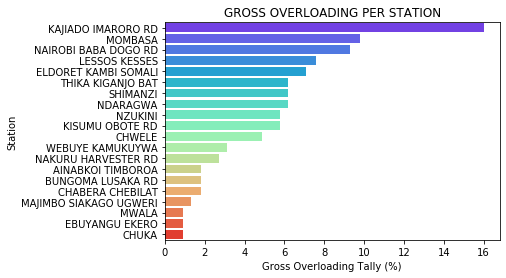

In [18]:
#Gross Overloading/Compliance per Station Table
GO_Stf = Q3_GO.groupby('Station')['GO'].count()
GO_Stf = pd.DataFrame(GO_Stf)

GCOMP_Stf = Q3_GCOMP.groupby('Station')['GO'].count()
GCOMP_Stf = pd.DataFrame(GCOMP_Stf)

GO_Stf.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Stf.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Stp = round((GO_Stf/GO_Stf.sum())*100, 1)
GO_Stp = pd.DataFrame(GO_Stp)

GCOMP_Stp = round((GCOMP_Stf/GCOMP_Stf.sum())*100, 1)
GCOMP_Stp = pd.DataFrame(GCOMP_Stp)

GO_Stp.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Stp.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_St = pd.concat([GCOMP_Stf, GCOMP_Stp, GO_Stf, GO_Stp], axis=1)

GO_St['TOTALf'] = (GO_Stf['GOf'] + GCOMP_Stf['GCOMPf'])

GO_St['TOTALf'].fillna((GCOMP_Stf.GCOMPf), inplace=True)

GO_St['TOTALp'] = round(((GO_St.TOTALf/GO_St.TOTALf.sum())*100), 1)

GO_St.sort_values(['GOf'], ascending=False, inplace=True)

GO_St.fillna(0, inplace=True)

sns.barplot(data = GO_St, x = 'GOp', y = GO_St.index, palette = 'rainbow')
plt.title('GROSS OVERLOADING PER STATION')
plt.ylabel('Station')
plt.xlabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER STATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_St.loc['TOTALS']=round(GO_St.sum(), 0)

GO_St

#TOTALS = [sum(x) for x in zip(*GO_St)] or TOTALS = map(sum, zip(*GO_St))
#GO_St = np.array(GO_St)
#TOTALS = np.sum(GO_St, axis=0)

In [19]:
GO_St.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER STATION.xlsx')

,GCOMPf,GCOMPp,GOf,GOp,TOTALf,TOTALp
2A,534.0,63.2,135.0,60.0,669.0,62.5
3A,147.0,17.4,79.0,35.1,226.0,21.1
6C,96.0,11.4,7.0,3.1,103.0,9.6
6G,47.0,5.6,3.0,1.3,50.0,4.7
5C,2.0,0.2,1.0,0.4,3.0,0.3
4A,13.0,1.5,0.0,0.0,13.0,1.2
5D,2.0,0.2,0.0,0.0,2.0,0.2
7A,4.0,0.5,0.0,0.0,4.0,0.4
TOTALS,845.0,100.0,225.0,100.0,1070.0,100.0


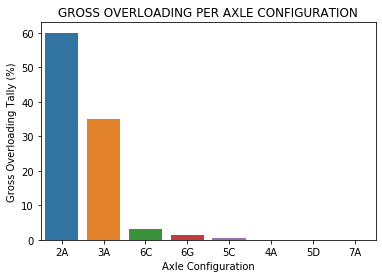

In [20]:
#Gross Overloading per Axle Configuration
GO_Axf = Q3_GO.groupby('Configuration')['GO'].count()
GO_Axf = pd.DataFrame(GO_Axf)

GCOMP_Axf = Q3_GCOMP.groupby('Configuration')['GO'].count()
GCOMP_Axf = pd.DataFrame(GCOMP_Axf)

GO_Axf.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Axf.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Axp = round((GO_Axf/GO_Axf.sum())*100, 1)
GO_Axp = pd.DataFrame(GO_Axp)

GCOMP_Axp = round((GCOMP_Axf/GCOMP_Axf.sum())*100, 1)
GCOMP_Axp = pd.DataFrame(GCOMP_Axp)

GO_Axp.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Axp.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Ax = pd.concat([GCOMP_Axf, GCOMP_Axp, GO_Axf, GO_Axp], axis=1)

GO_Ax['TOTALf'] = (GO_Axf['GOf'] + GCOMP_Axf['GCOMPf'])

GO_Ax['TOTALf'].fillna((GCOMP_Axf.GCOMPf), inplace=True)

GO_Ax['TOTALp'] = round(((GO_Ax.TOTALf/GO_Ax.TOTALf.sum())*100), 1)

GO_Ax.sort_values(['GOf'], ascending=False, inplace=True)

GO_Ax.fillna(0, inplace=True)

sns.barplot(data = GO_Ax, y = 'GOp', x = GO_Ax.index)
plt.title('GROSS OVERLOADING PER AXLE CONFIGURATION')
plt.xlabel('Axle Configuration')
plt.ylabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER AXLE CONFIGURATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Ax.loc['TOTALS']=round(GO_Ax.sum(), 0)

GO_Ax

In [21]:
GO_Ax.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER AXLE CONFIGURATION.xlsx')

,GCOMPf,GCOMPp,GOf,GOp,TOTALf,TOTALp
ISUZU,355.0,42.0,102.0,45.3,457.0,42.8
MITSUBISHI,217.0,25.7,61.0,27.1,278.0,26.0
TATA,38.0,4.5,20.0,8.9,58.0,5.4
FUSO,29.0,3.4,11.0,4.9,40.0,3.7
FAW,13.0,1.5,7.0,3.1,20.0,1.9
ASHOCK LEYLAND,12.0,1.4,6.0,2.7,18.0,1.7
MERCEDES BENZ,85.0,10.1,5.0,2.2,90.0,8.4
SHACMAN,0.0,0.0,2.0,0.9,0.0,0.0
HOWO,3.0,0.4,2.0,0.9,5.0,0.5
EICHER,2.0,0.2,2.0,0.9,4.0,0.4


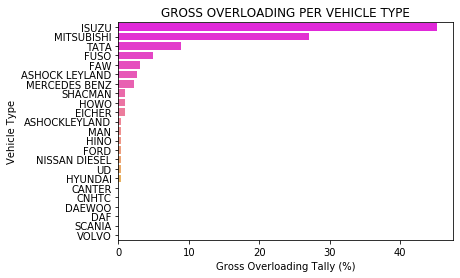

In [22]:
#Gross Overloading per Vehicle Type
GO_Vtf = Q3_GO.groupby('VehicleType')['GO'].count()
GO_Vtf = pd.DataFrame(GO_Vtf)

GCOMP_Vtf = Q3_GCOMP.groupby('VehicleType')['GO'].count()
GCOMP_Vtf = pd.DataFrame(GCOMP_Vtf)

GO_Vtf.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Vtf.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Vtp = round((GO_Vtf/GO_Vtf.sum())*100, 1)
GO_Vtp = pd.DataFrame(GO_Vtp)

GCOMP_Vtp = round((GCOMP_Vtf/GCOMP_Vtf.sum())*100, 1)
GCOMP_Vtp = pd.DataFrame(GCOMP_Vtp)

GO_Vtp.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Vtp.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Vt = pd.concat([GCOMP_Vtf, GCOMP_Vtp, GO_Vtf, GO_Vtp], axis=1)

GO_Vt['TOTALf'] = (GO_Vtf['GOf'] + GCOMP_Vtf['GCOMPf'])

GO_Vt['TOTALf'].fillna((GCOMP_Vtf.GCOMPf), inplace=True)

GO_Vt['TOTALp'] = round(((GO_Vt.TOTALf/GO_Vt.TOTALf.sum())*100), 1)

GO_Vt.sort_values(['GOf'], ascending=False, inplace=True)

GO_Vt.fillna(0, inplace=True)

sns.barplot(data = GO_Vt, x = 'GOp', y = GO_Vt.index, palette = 'spring')
plt.title('GROSS OVERLOADING PER VEHICLE TYPE')
plt.ylabel('Vehicle Type')
plt.xlabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER VEHICLE TYPE.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Vt.loc['TOTALS']=round(GO_Vt.sum(), 0)

GO_Vt

In [23]:
GO_Vt.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER VEHICLE TYPE.xlsx')

,GCOMPf,GCOMPp,GOf,GOp,TOTALf,TOTALp
BUILDING MATERIALS,236.0,27.9,139.0,61.8,375.0,35.1
CEREALS,59.0,7.0,27.0,12.0,86.0,8.1
CONTAINER,32.0,3.8,7.0,3.1,39.0,3.7
FRUITS,13.0,1.5,5.0,2.2,18.0,1.7
HOUSEHOLD ITEMS,3.0,0.4,4.0,1.8,7.0,0.7
...,...,...,...,...,...,...
WATER,14.0,1.7,0.0,0.0,14.0,1.3
WATER,1.0,0.1,0.0,0.0,1.0,0.1
WHEELBARROW,1.0,0.1,0.0,0.0,1.0,0.1
WHITE WASH,1.0,0.1,0.0,0.0,1.0,0.1


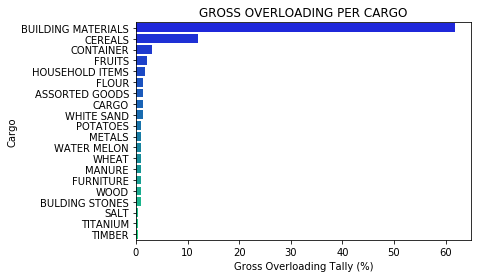

In [24]:
#Gross Overloading per Cargo
GO_Cargof = Q3_GO.groupby('Cargo')['GO'].count()
GO_Cargof = pd.DataFrame(GO_Cargof)

GCOMP_Cargof = Q3_GCOMP.groupby('Cargo')['GO'].count()
GCOMP_Cargof = pd.DataFrame(GCOMP_Cargof)

GO_Cargof.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Cargof.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Cargop = round((GO_Cargof/GO_Cargof.sum())*100, 1)
GO_Cargop = pd.DataFrame(GO_Cargop)

GCOMP_Cargop = round((GCOMP_Cargof/GCOMP_Cargof.sum())*100, 1)
GCOMP_Cargop = pd.DataFrame(GCOMP_Cargop)

GO_Cargop.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Cargop.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Cargo = pd.concat([GCOMP_Cargof, GCOMP_Cargop, GO_Cargof, GO_Cargop], axis=1)

GO_Cargo['TOTALf'] = (GO_Cargof['GOf'] + GCOMP_Cargof['GCOMPf'])

GO_Cargo['TOTALf'].fillna((GCOMP_Cargof.GCOMPf), inplace=True)

GO_Cargo['TOTALp'] = round(((GO_Cargo.TOTALf/GO_Cargo.TOTALf.sum())*100), 1)

GO_Cargo.sort_values(['GOf'], ascending=False, inplace=True)

GO_Cargo.fillna(0, inplace=True)

GO_Cargoplot = GO_Cargo.head(20)
sns.barplot(data = GO_Cargoplot, x = 'GOp', y = GO_Cargoplot.index, palette = 'winter')
plt.title('GROSS OVERLOADING PER CARGO')
plt.ylabel('Cargo')
plt.xlabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER CARGO.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Cargo.loc['TOTALS']=round(GO_Cargo.sum(), 0)

GO_Cargo

In [25]:
GO_Cargo.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER ORIGIN.xlsx')

,GCOMPf,GCOMPp,GOf,GOp,TOTALf,TOTALp
IMARORO,58.0,6.9,29.0,12.9,87.0,8.2
KITALE,28.0,3.3,16.0,7.1,44.0,4.2
CHWELE,5.0,0.6,8.0,3.6,13.0,1.2
MOMBASA,50.0,5.9,8.0,3.6,58.0,5.5
BUSIA,8.0,0.9,7.0,3.1,15.0,1.4
...,...,...,...,...,...,...
UGUERI,2.0,0.2,0.0,0.0,2.0,0.2
VOI,1.0,0.1,0.0,0.0,1.0,0.1
WEBUYE,2.0,0.2,0.0,0.0,2.0,0.2
ZAMBIA,1.0,0.1,0.0,0.0,1.0,0.1


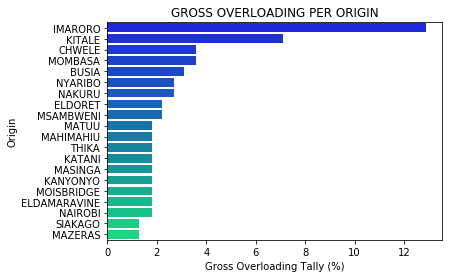

In [26]:
#Gross Overloading per Origin
GO_Orgf = Q3_GO.groupby('Origin')['GO'].count()
GO_Orgf = pd.DataFrame(GO_Orgf)

GCOMP_Orgf = Q3_GCOMP.groupby('Origin')['GO'].count()
GCOMP_Orgf = pd.DataFrame(GCOMP_Orgf)

GO_Orgf.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Orgf.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Orgp = round((GO_Orgf/GO_Orgf.sum())*100, 1)
GO_Orgp = pd.DataFrame(GO_Orgp)

GCOMP_Orgp = round((GCOMP_Orgf/GCOMP_Orgf.sum())*100, 1)
GCOMP_Orgp = pd.DataFrame(GCOMP_Orgp)

GO_Orgp.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Orgp.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Org = pd.concat([GCOMP_Orgf, GCOMP_Orgp, GO_Orgf, GO_Orgp], axis=1)

GO_Org['TOTALf'] = (GO_Orgf['GOf'] + GCOMP_Orgf['GCOMPf'])

GO_Org['TOTALf'].fillna((GCOMP_Orgf.GCOMPf), inplace=True)

GO_Org['TOTALp'] = round(((GO_Org.TOTALf/GO_Org.TOTALf.sum())*100), 1)

GO_Org.sort_values(['GOf'], ascending=False, inplace=True)

GO_Org.fillna(0, inplace=True)

GO_Orgplot = GO_Org.head(20)
sns.barplot(data = GO_Orgplot, x = 'GOp', y = GO_Orgplot.index, palette = 'winter')
plt.title('GROSS OVERLOADING PER ORIGIN')
plt.ylabel('Origin')
plt.xlabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER ORIGIN.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Org.loc['TOTALS']=round(GO_Org.sum(), 0)

GO_Org

In [27]:
GO_Org.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER ORIGIN.xlsx')

,GCOMPf,GCOMPp,GOf,GOp,TOTALf,TOTALp
NAIROBI,116.0,13.7,27.0,12.0,143.0,13.5
BABA DOGO,97.0,11.5,19.0,8.4,116.0,11.0
ELDORET,23.0,2.7,11.0,4.9,34.0,3.2
MOMBASA,56.0,6.6,9.0,4.0,65.0,6.1
NYERI,13.0,1.5,9.0,4.0,22.0,2.1
...,...,...,...,...,...,...
TANZANIA,1.0,0.1,0.0,0.0,1.0,0.1
UMOJA,1.0,0.1,0.0,0.0,1.0,0.1
VIPINGO,1.0,0.1,0.0,0.0,1.0,0.1
VOI,2.0,0.2,0.0,0.0,2.0,0.2


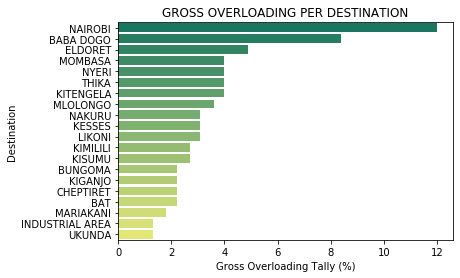

In [28]:
#Gross Overloading per Destination
GO_Desf = Q3_GO.groupby('Destination')['GO'].count()
GO_Desf = pd.DataFrame(GO_Desf)

GCOMP_Desf = Q3_GCOMP.groupby('Destination')['GO'].count()
GCOMP_Desf = pd.DataFrame(GCOMP_Desf)

GO_Desf.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Desf.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Desp = round((GO_Desf/GO_Desf.sum())*100, 1)
GO_Desp = pd.DataFrame(GO_Desp)

GCOMP_Desp = round((GCOMP_Desf/GCOMP_Desf.sum())*100, 1)
GCOMP_Desp = pd.DataFrame(GCOMP_Desp)

GO_Desp.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Desp.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Des = pd.concat([GCOMP_Desf, GCOMP_Desp, GO_Desf, GO_Desp], axis=1)

GO_Des['TOTALf'] = (GO_Desf['GOf'] + GCOMP_Desf['GCOMPf'])

GO_Des['TOTALf'].fillna((GCOMP_Desf.GCOMPf), inplace=True)

GO_Des['TOTALp'] = round(((GO_Des.TOTALf/GO_Des.TOTALf.sum())*100), 1)

GO_Des.sort_values(['GOf'], ascending=False, inplace=True)

GO_Des.fillna(0, inplace=True)

GO_Desplot = GO_Des.head(20)
sns.barplot(data = GO_Desplot, x = 'GOp', y = GO_Desplot.index, palette = 'summer')
plt.title('GROSS OVERLOADING PER DESTINATION')
plt.ylabel('Destination')
plt.xlabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER DESTINATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Des.loc['TOTALS']=round(GO_Des.sum(), 0)

GO_Des

In [29]:
GO_Des.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER DESTINATION.xlsx')

,GCOMPf,GCOMPp,GOf,GOp,TOTALf,TOTALp
JUJA BLOCKS,10.0,1.2,9.0,4.0,19.0,2.1
KINDU STORES,0.0,0.0,3.0,1.3,0.0,0.0
MOMBASA MAIZE MILLERS,12.0,1.4,3.0,1.3,15.0,1.6
MATUGA AGENCIES,0.0,0.0,3.0,1.3,0.0,0.0
P MBADUH,1.0,0.1,2.0,0.9,3.0,0.3
...,...,...,...,...,...,...
YOKABI LOGISTICS,1.0,0.1,0.0,0.0,1.0,0.1
Z K JUMA LTD,1.0,0.1,0.0,0.0,1.0,0.1
Z W GICHURU,1.0,0.1,0.0,0.0,1.0,0.1
ZENKO LTD,1.0,0.1,0.0,0.0,1.0,0.1


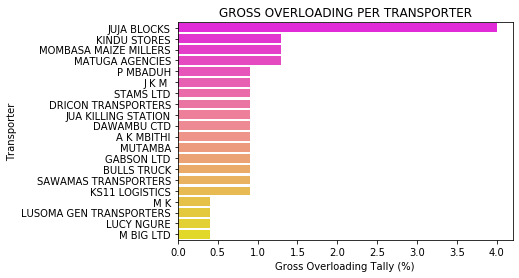

In [30]:
#Gross Overloading per Transporter
GO_Transf = Q3_GO.groupby('Transporter')['GO'].count()
GO_Transf = pd.DataFrame(GO_Transf)

GCOMP_Transf = Q3_GCOMP.groupby('Transporter')['GO'].count()
GCOMP_Transf = pd.DataFrame(GCOMP_Transf)

GO_Transf.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Transf.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Transp = round((GO_Transf/GO_Transf.sum())*100, 1)
GO_Transp = pd.DataFrame(GO_Transp)

GCOMP_Transp = round((GCOMP_Transf/GCOMP_Transf.sum())*100, 1)
GCOMP_Transp = pd.DataFrame(GCOMP_Transp)

GO_Transp.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Transp.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Trans = pd.concat([GCOMP_Transf, GCOMP_Transp, GO_Transf, GO_Transp], axis=1)

GO_Trans['TOTALf'] = (GO_Transf['GOf'] + GCOMP_Transf['GCOMPf'])

GO_Trans['TOTALf'].fillna((GCOMP_Transf.GCOMPf), inplace=True)

GO_Trans['TOTALp'] = round(((GO_Trans.TOTALf/GO_Trans.TOTALf.sum())*100), 1)

GO_Trans.sort_values(['GOf'], ascending=False, inplace=True)

GO_Trans.fillna(0, inplace=True)

GO_Transplot = GO_Trans.head(20)
sns.barplot(data = GO_Transplot, x = 'GOp', y = GO_Transplot.index, palette = 'spring')
plt.title('GROSS OVERLOADING PER TRANSPORTER')
plt.ylabel('Transporter')
plt.xlabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER TRANSPORTER.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Trans.loc['TOTALS']=round(GO_Trans.sum(), 0)

GO_Trans

In [31]:
GO_Trans.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER TRANSPORTER.xlsx')

In [32]:
# AXLE OVERLOADING (AO) IS OVERLOADING BASED ON INDIVIDUAL AXLE TYPE

# CALCULATING OVERLOADING ON A1 (A1O)
Q3['A1O'] = (Q3.A1 - 1.05 * 8000)
A1COMP = Q3['A1O']<=0
Q3.loc[A1COMP, 'A1O']=0 # A1O Is overloading on A1

# CALCULATING OVERLOADING ON A2 (A2O)
Q3['A2O_2A'] = 0
A2O_2A = Q3['Configuration']=="2A"
Q3.loc[A2O_2A, 'A2O_2A'] = (Q3.A2 - 1.05 * 10000)
A2ACOMP = Q3['A2O_2A']<=0
Q3.loc[A2ACOMP, 'A2O_2A']=0

Q3['A2O_3A'] = 0
A2O_3A = Q3['Configuration']=="3A"
Q3.loc[A2O_3A, 'A2O_3A'] = (Q3.A2 - 1.05 * 9000)
A3ACOMP = Q3['A2O_3A']<=0
Q3.loc[A3ACOMP, 'A2O_3A']=0

Q3['A2O_3C'] = 0
A2O_3C = Q3['Configuration']=="3C"
Q3.loc[A2O_3C, 'A2O_3C'] = (Q3.A2 - 1.05 * 10000)
A3CCOMP = Q3['A2O_3C']<=0
Q3.loc[A3CCOMP, 'A2O_3C']=0

Q3['A2O_3D'] = 0
A2O_3D = Q3['Configuration']=="3D"
Q3.loc[A2O_3D, 'A2O_3D'] = (Q3.A2 - 1.05 * 10000)
A3DCOMP = Q3['A2O_3D']<=0
Q3.loc[A3DCOMP, 'A2O_3D']=0

Q3['A2O_4A'] = 0
A2O_4A = Q3['Configuration']=="4A"
Q3.loc[A2O_4A, 'A2O_4A'] = (Q3.A2 - 1.05 * 10000)
A4ACOMP = Q3['A2O_4A']<=0
Q3.loc[A4ACOMP, 'A2O_4A']=0

Q3['A2O_5C'] = 0
A2O_5C = Q3['Configuration']=="5C"
Q3.loc[A2O_5C, 'A2O_5C'] = (Q3.A2 - 1.05 * 8000)
A5CCOMP = Q3['A2O_5C']<=0
Q3.loc[A5CCOMP, 'A2O_5C']=0

Q3['A2O_5D'] = 0
A2O_5D = Q3['Configuration']=="5D"
Q3.loc[A2O_5D, 'A2O_5D'] = (Q3.A2 - 1.05 * 9000)
A5DCOMP = Q3['A2O_5D']<=0
Q3.loc[A5DCOMP, 'A2O_5D']=0

Q3['A2O_6G'] = 0
A2O_6G = Q3['Configuration']=="6G"
Q3.loc[A2O_6G, 'A2O_6G'] = (Q3.A2 - 1.05 * 9000)
A6GCOMP = Q3['A2O_6G']<=0
Q3.loc[A6GCOMP, 'A2O_6G']=0

Q3['A2O_6C'] = 0
A2O_6C = Q3['Configuration']=="6C"
Q3.loc[A2O_6C, 'A2O_6C'] = (Q3.A2 - 1.05 * 9000)
A6CCOMP = Q3['A2O_6C']<=0
Q3.loc[A6CCOMP, 'A2O_6C']=0

Q3['A2O_6A'] = 0
A2O_6A = Q3['Configuration']=="6A"
Q3.loc[A2O_6A, 'A2O_6A'] = (Q3.A2 - 1.05 * 8000)
A6ACOMP = Q3['A2O_6A']<=0
Q3.loc[A6ACOMP, 'A2O_6A']=0

Q3['A2O_7A'] = 0
A2O_7A = Q3['Configuration']=="7A"
Q3.loc[A2O_7A, 'A2O_7A'] = (Q3.A2 - 1.05 * 8000)
A7ACOMP = Q3['A2O_7A']<=0
Q3.loc[A7ACOMP, 'A2O_7A']=0

Q3['A2O'] = (Q3.A2O_2A + Q3.A2O_3A + Q3.A2O_3C + Q3.A2O_3D + Q3.A2O_4A + Q3.A2O_5C + Q3.A2O_5D + Q3.A2O_6G + Q3.A2O_6C + Q3.A2O_6A + Q3.A2O_7A) # A2O Is overloading on A2

# DROPPING DUMMY VARIABLES FOR A2 OVERLOADING

Q3.drop(['A2O_2A', 'A2O_3A', 'A2O_3C', 'A2O_3D', 'A2O_4A', 'A2O_5C', 'A2O_5D', 'A2O_6G', 'A2O_6C', 'A2O_6A', 'A2O_7A'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON A3 (A3O)
Q3['A3O_3A'] = 0
A3O_3A = Q3['Configuration']=="3A"
Q3.loc[A3O_3A, 'A3O_3A'] = (Q3.A3 - 1.05 * 9000)
A3ACOMP = Q3['A3O_3A']<=0
Q3.loc[A3ACOMP, 'A3O_3A']=0

Q3['A3O_3C'] = 0
A3O_3C = Q3['Configuration']=="3C"
Q3.loc[A3O_3C, 'A3O_3C'] = (Q3.A3 - 1.05 * 10000)
A3CCOMP = Q3['A3O_3C']<=0
Q3.loc[A3CCOMP, 'A3O_3C']=0

Q3['A3O_3D'] = 0
A3O_3D = Q3['Configuration']=="3D"
Q3.loc[A3O_3D, 'A3O_3D'] = (Q3.A3 - 1.05 * 10000)
A3DCOMP = Q3['A3O_3D']<=0
Q3.loc[A3DCOMP, 'A3O_3D']=0

Q3['A3O_4A'] = 0
A3O_4A = Q3['Configuration']=="4A"
Q3.loc[A3O_4A, 'A3O_4A'] = (Q3.A3 - 1.05 * 9000)
A4ACOMP = Q3['A3O_4A']<=0
Q3.loc[A4ACOMP, 'A3O_4A']=0

Q3['A3O_5C'] = 0
A3O_5C = Q3['Configuration']=="5C"
Q3.loc[A3O_5C, 'A3O_5C'] = (Q3.A3 - 1.05 * 8000)
A5CCOMP = Q3['A3O_5C']<=0
Q3.loc[A5CCOMP, 'A3O_5C']=0

Q3['A3O_5D'] = 0
A3O_5D = Q3['Configuration']=="5D"
Q3.loc[A3O_5D, 'A3O_5D'] = (Q3.A3 - 1.05 * 9000)
A5DCOMP = Q3['A3O_5D']<=0
Q3.loc[A5DCOMP, 'A3O_5D']=0

Q3['A3O_6G'] = 0
A3O_6G = Q3['Configuration']=="6G"
Q3.loc[A3O_6G, 'A3O_6G'] = (Q3.A3 - 1.05 * 9000)
A6GCOMP = Q3['A3O_6G']<=0
Q3.loc[A6GCOMP, 'A3O_6G']=0

Q3['A3O_6C'] = 0
A3O_6C = Q3['Configuration']=="6C"
Q3.loc[A3O_6C, 'A3O_6C'] = (Q3.A3 - 1.05 * 9000)
A6CCOMP = Q3['A3O_6C']<=0
Q3.loc[A6CCOMP, 'A3O_6C']=0

Q3['A3O_6A'] = 0
A3O_6A = Q3['Configuration']=="6A"
Q3.loc[A3O_6A, 'A3O_6A'] = (Q3.A3 - 1.05 * 8000)
A6ACOMP = Q3['A3O_6A']<=0
Q3.loc[A6ACOMP, 'A3O_6A']=0

Q3['A3O_7A'] = 0
A3O_7A = Q3['Configuration']=="7A"
Q3.loc[A3O_7A, 'A3O_7A'] = (Q3.A3 - 1.05 * 8000)
A7ACOMP = Q3['A3O_7A']<=0
Q3.loc[A7ACOMP, 'A3O_7A']=0

Q3['A3O'] = (Q3.A3O_3A + Q3.A3O_3C + Q3.A3O_3D + Q3.A3O_4A + Q3.A3O_5C + Q3.A3O_5D + Q3.A3O_6G + Q3.A3O_6C + Q3.A3O_6A + Q3.A3O_7A) # A3O Is overloading on A3

# DROPPING DUMMY VARIABLES FOR A3 OVERLOADING

Q3.drop(['A3O_3A', 'A3O_3C', 'A3O_3D', 'A3O_4A', 'A3O_5C', 'A3O_5D', 'A3O_6G', 'A3O_6C', 'A3O_6A', 'A3O_7A'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON A4 (A4O)
Q3['A4O_4A'] = 0
A4O_4A = Q3['Configuration']=="4A"
Q3.loc[A4O_4A, 'A4O_4A'] = (Q3.A4 - 1.05 * 9000)
A4ACOMP = Q3['A4O_4A']<=0
Q3.loc[A4ACOMP, 'A4O_4A']=0

Q3['A4O_5C'] = 0
A4O_5C = Q3['Configuration']=="5C"
Q3.loc[A4O_5C, 'A4O_5C'] = (Q3.A4 - 1.05 * 8000)
A5CCOMP = Q3['A4O_5C']<=0
Q3.loc[A5CCOMP, 'A4O_5C']=0

Q3['A4O_5D'] = 0
A4O_5D = Q3['Configuration']=="5D"
Q3.loc[A4O_5D, 'A4O_5D'] = (Q3.A4 - 1.05 * 9000)
A5DCOMP = Q3['A4O_5D']<=0
Q3.loc[A5DCOMP, 'A4O_5D']=0

Q3['A4O_6G'] = 0
A4O_6G = Q3['Configuration']=="6G"
Q3.loc[A4O_6G, 'A4O_6G'] = (Q3.A4 - 1.05 * 8000)
A6GCOMP = Q3['A4O_6G']<=0
Q3.loc[A6GCOMP, 'A4O_6G']=0

Q3['A4O_6C'] = 0
A4O_6C = Q3['Configuration']=="6C"
Q3.loc[A4O_6C, 'A4O_6C'] = (Q3.A4 - 1.05 * 8000)
A6CCOMP = Q3['A4O_6C']<=0
Q3.loc[A6CCOMP, 'A4O_6C']=0

Q3['A4O_6A'] = 0
A4O_6A = Q3['Configuration']=="6A"
Q3.loc[A4O_6A, 'A4O_6A'] = (Q3.A4 - 1.05 * 8000)
A6ACOMP = Q3['A4O_6A']<=0
Q3.loc[A6ACOMP, 'A4O_6A']=0

Q3['A4O_7A'] = 0
A4O_7A = Q3['Configuration']=="7A"
Q3.loc[A4O_7A, 'A4O_7A'] = (Q3.A4 - 1.05 * 8000)
A7ACOMP = Q3['A4O_7A']<=0
Q3.loc[A7ACOMP, 'A4O_7A']=0

Q3['A4O'] = (Q3.A4O_4A + Q3.A4O_5C + Q3.A4O_5D + Q3.A4O_6G + Q3.A4O_6C + Q3.A4O_6A + Q3.A4O_7A) # A4O Is overloading on A4

# DROPPING DUMMY VARIABLES FOR A4 OVERLOADING

Q3.drop(['A4O_4A', 'A4O_5C', 'A4O_5D', 'A4O_6G', 'A4O_6C', 'A4O_6A', 'A4O_7A'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON A5 (A5O)
Q3['A5O_5C'] = 0
A5O_5C = Q3['Configuration']=="5C"
Q3.loc[A5O_5C, 'A5O_5C'] = (Q3.A5 - 1.05 * 8000)
A5CCOMP = Q3['A5O_5C']<=0
Q3.loc[A5CCOMP, 'A5O_5C']=0

Q3['A5O_5D'] = 0
A5O_5D = Q3['Configuration']=="5D"
Q3.loc[A5O_5D, 'A5O_5D'] = (Q3.A5 - 1.05 * 9000)
A5DCOMP = Q3['A5O_5D']<=0
Q3.loc[A5DCOMP, 'A5O_5D']=0

Q3['A5O_6G'] = 0
A5O_6G = Q3['Configuration']=="6G"
Q3.loc[A5O_6G, 'A5O_6G'] = (Q3.A5 - 1.05 * 8000)
A6GCOMP = Q3['A5O_6G']<=0
Q3.loc[A6GCOMP, 'A5O_6G']=0

Q3['A5O_6C'] = 0
A5O_6C = Q3['Configuration']=="6C"
Q3.loc[A5O_6C, 'A5O_6C'] = (Q3.A5 - 1.05 * 9000)
A6CCOMP = Q3['A5O_6C']<=0
Q3.loc[A6CCOMP, 'A5O_6C']=0

Q3['A5O_6A'] = 0
A5O_6A = Q3['Configuration']=="6A"
Q3.loc[A5O_6A, 'A5O_6A'] = (Q3.A5 - 1.05 * 8000)
A6ACOMP = Q3['A5O_6A']<=0
Q3.loc[A6ACOMP, 'A5O_6A']=0

Q3['A5O_7A'] = 0
A5O_7A = Q3['Configuration']=="7A"
Q3.loc[A5O_7A, 'A5O_7A'] = (Q3.A5 - 1.05 * 8000)
A7ACOMP = Q3['A5O_7A']<=0
Q3.loc[A7ACOMP, 'A5O_7A']=0

Q3['A5O'] = (Q3.A5O_5C + Q3.A5O_5D + Q3.A5O_6G + Q3.A5O_6C + Q3.A5O_6A + Q3.A5O_7A) # A5O Is overloading on A5

# DROPPING DUMMY VARIABLES FOR A5 OVERLOADING

Q3.drop(['A5O_5C', 'A5O_5D', 'A5O_6G', 'A5O_6C', 'A5O_6A', 'A5O_7A'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON A6 (A6O)
Q3['A6O_6G'] = 0
A6O_6G = Q3['Configuration']=="6G"
Q3.loc[A5O_6G, 'A6O_6G'] = (Q3.A6 - 1.05 * 8000)
A6GCOMP = Q3['A6O_6G']<=0
Q3.loc[A6GCOMP, 'A6O_6G']=0

Q3['A6O_6C'] = 0
A6O_6C = Q3['Configuration']=="6C"
Q3.loc[A6O_6C, 'A6O_6C'] = (Q3.A6 - 1.05 * 9000)
A6CCOMP = Q3['A6O_6C']<=0
Q3.loc[A6CCOMP, 'A6O_6C']=0

Q3['A6O_6A'] = 0
A6O_6A = Q3['Configuration']=="6A"
Q3.loc[A6O_6A, 'A6O_6A'] = (Q3.A6 - 1.05 * 8000)
A6ACOMP = Q3['A6O_6A']<=0
Q3.loc[A6ACOMP, 'A6O_6A']=0

Q3['A6O_7A'] = 0
A6O_7A = Q3['Configuration']=="7A"
Q3.loc[A6O_7A, 'A6O_7A'] = (Q3.A6 - 1.05 * 8000)
A7ACOMP = Q3['A6O_7A']<=0
Q3.loc[A7ACOMP, 'A6O_7A']=0

Q3['A6O'] = (Q3.A6O_6G + Q3.A6O_6C + Q3.A6O_6A + Q3.A6O_7A) # A6O Is overloading on A6

# DROPPING DUMMY VARIABLES FOR A6 OVERLOADING

Q3.drop(['A6O_6G', 'A6O_6C', 'A6O_6A', 'A6O_7A'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON A7 (A7O)
Q3['A7O_7A'] = 0
A7O_7A = Q3['Configuration']=="7A"
Q3.loc[A7O_7A, 'A7O_7A'] = (Q3.A7 - 1.05 * 8000)
A7ACOMP = Q3['A7O_7A']<=0
Q3.loc[A7ACOMP, 'A7O_7A']=0

Q3['A7O'] = (Q3.A7O_7A) # A7O Is overloading on A7

# DROPPING DUMMY VARIABLES FOR A7 OVERLOADING

Q3.drop(['A7O_7A'], axis=1, inplace=True)


Q3['AO'] = (Q3.A1O + Q3.A2O + Q3.A3O + Q3.A4O + Q3.A5O + Q3.A6O + Q3.A7) # AO Is Axle overloading

# DROPPING DUMMY VARIABLES FOR AXLES OVERLOADING

Q3.drop(['A1O', 'A2O', 'A3O', 'A4O', 'A5O', 'A6O', 'A7O'], axis=1, inplace=True)

#Axle Overloading/Compliance Analysis
Q3.sort_values(['AO'], ascending=False, inplace=True)

Q3_AO = round(pd.DataFrame(Q3[Q3.AO>0]), 1)
Q3_ACOMP = round(pd.DataFrame(Q3[Q3.AO<=0]), 1)

#Returning Non-Overloading to zeros
ACOMP = Q3['AO']<=0
Q3.loc[ACOMP, 'AO']=0

round(Q3_AO.describe(), 1)

Q3_AO.head()

,Station,PlateNo,Configuration,VehicleType,Cargo,Origin,Destination,Transporter,A1,A2,A3,A4,A5,A6,A7,Speed,GVW,GLIMIT,GO,AO
444,KAJIADO IMARORO RD,KCY079A,3A,HOWO,BUILDING MATERIALS,IMARORO,KITENGELA,SINOTRUCK,7250,15290,14630,0,0,0,0,2.3km/h,37170,27300.0,9870.0,11020.0
385,KAJIADO IMARORO RD,KCH029Z,2A,ISUZU,BUILDING MATERIALS,IMARORO,KITENGELA,A K MBITHI,13390,14080,0,0,0,0,0,2.2km/h,27470,18900.0,8570.0,8570.0
1034,KISUMU OBOTE RD,KBT805R,7A,MERCEDES BENZ,LOGS,SIAYA,NAKURU,TIMSALES,9840,8440,7970,5860,8740,7620,6510,2.2km/h,54980,58800.0,0.0,8330.0
995,KISUMU OBOTE RD,C4632A,7A,MERCEDES BENZ,CONTAINER,CONGO,MOMBASA,UNSPECIFIED,7160,7310,6790,7770,7060,8690,7560,2.1km/h,52340,58800.0,0.0,7850.0
332,NDARAGWA,KCE277T,2A,ISUZU,BUILDING MATERIALS,NYERI,NANYUKI,RAEL ENTERPRISES,5720,17400,0,0,0,0,0,1.1km/h,23120,18900.0,4220.0,6900.0


,ACOMPf,ACOMPp,AOf,AOp,TOTALf,TOTALp
Station,,,,,,
KAJIADO IMARORO RD,49.0,9.6,78.0,14.0,127.0,11.9
MOMBASA,71.0,13.9,61.0,10.9,132.0,12.3
NAIROBI BABA DOGO RD,103.0,20.1,48.0,8.6,151.0,14.1
LESSOS KESSES,25.0,4.9,46.0,8.2,71.0,6.6
KISUMU OBOTE RD,47.0,9.2,41.0,7.3,88.0,8.2
SHIMANZI,28.0,5.5,32.0,5.7,60.0,5.6
NDARAGWA,20.0,3.9,30.0,5.4,50.0,4.7
THIKA KIGANJO BAT,20.0,3.9,30.0,5.4,50.0,4.7
NZUKINI,32.0,6.2,27.0,4.8,59.0,5.5


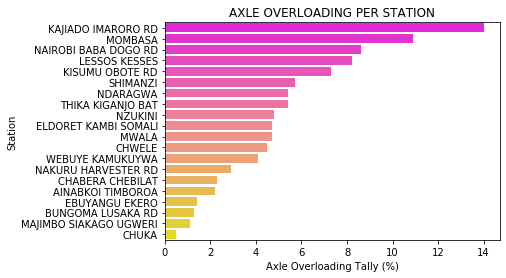

In [33]:
#Axle Overloading/Compliance per Station Table
AO_Stf = Q3_AO.groupby('Station')['AO'].count()
AO_Stf = pd.DataFrame(AO_Stf)

ACOMP_Stf = Q3_ACOMP.groupby('Station')['AO'].count()
ACOMP_Stf = pd.DataFrame(ACOMP_Stf)

AO_Stf.rename(columns={'AO':'AOf'}, inplace=True)
ACOMP_Stf.rename(columns={'AO':'ACOMPf'}, inplace=True)

AO_Stp = round((AO_Stf/AO_Stf.sum())*100, 1)
AO_Stp = pd.DataFrame(AO_Stp)

ACOMP_Stp = round((ACOMP_Stf/ACOMP_Stf.sum())*100, 1)
ACOMP_Stp = pd.DataFrame(ACOMP_Stp)

AO_Stp.rename(columns={'AOf':'AOp'}, inplace=True)
ACOMP_Stp.rename(columns={'ACOMPf':'ACOMPp'}, inplace=True)

AO_St = pd.concat([ACOMP_Stf, ACOMP_Stp, AO_Stf, AO_Stp], axis=1)

AO_St['TOTALf'] = (AO_Stf['AOf'] + ACOMP_Stf['ACOMPf'])

AO_St['TOTALf'].fillna((ACOMP_Stf.ACOMPf), inplace=True)

AO_St['TOTALp'] = round(((AO_St.TOTALf/AO_St.TOTALf.sum())*100), 1)

AO_St.sort_values(['AOf'], ascending=False, inplace=True)

AO_St.fillna(0, inplace=True)

sns.barplot(data = AO_St, x = 'AOp', y = AO_St.index, palette = 'spring')
plt.title('AXLE OVERLOADING PER STATION')
plt.ylabel('Station')
plt.xlabel('Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER STATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

AO_St.loc['TOTALS']=round(AO_St.sum(), 0)

AO_St

In [34]:
AO_St.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER STATION.xlsx')

,ACOMPf,ACOMPp,AOf,AOp,TOTALf,TOTALp
2A,315.0,61.5,354.0,63.4,669.0,62.9
3A,89.0,17.4,137.0,24.6,226.0,21.3
6C,64.0,12.5,39.0,7.0,103.0,9.7
6G,36.0,7.0,14.0,2.5,50.0,4.7
4A,7.0,1.4,6.0,1.1,13.0,1.2
7A,0.0,0.0,4.0,0.7,0.0,0.0
5C,0.0,0.0,3.0,0.5,0.0,0.0
5D,1.0,0.2,1.0,0.2,2.0,0.2
TOTALS,512.0,100.0,558.0,100.0,1063.0,100.0


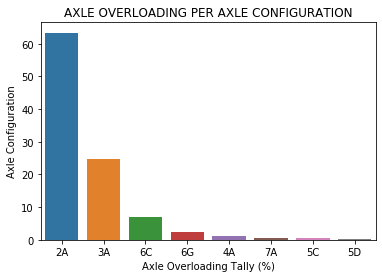

In [35]:
#Axle Overloading per Axle Configuration
AO_Axf = Q3_AO.groupby('Configuration')['AO'].count()
AO_Axf = pd.DataFrame(AO_Axf)

ACOMP_Axf = Q3_ACOMP.groupby('Configuration')['AO'].count()
ACOMP_Axf = pd.DataFrame(ACOMP_Axf)

AO_Axf.rename(columns={'AO':'AOf'}, inplace=True)
ACOMP_Axf.rename(columns={'AO':'ACOMPf'}, inplace=True)

AO_Axp = round((AO_Axf/AO_Axf.sum())*100, 1)
AO_Axp = pd.DataFrame(AO_Axp)

ACOMP_Axp = round((ACOMP_Axf/ACOMP_Axf.sum())*100, 1)
ACOMP_Axp = pd.DataFrame(ACOMP_Axp)

AO_Axp.rename(columns={'AOf':'AOp'}, inplace=True)
ACOMP_Axp.rename(columns={'ACOMPf':'ACOMPp'}, inplace=True)

AO_Ax = pd.concat([ACOMP_Axf, ACOMP_Axp, AO_Axf, AO_Axp], axis=1)

AO_Ax['TOTALf'] = (AO_Axf['AOf'] + ACOMP_Axf['ACOMPf'])

AO_Ax['TOTALf'].fillna((ACOMP_Axf.ACOMPf), inplace=True)

AO_Ax['TOTALp'] = round(((AO_Ax.TOTALf/AO_Ax.TOTALf.sum())*100), 1)

AO_Ax.sort_values(['AOf'], ascending=False, inplace=True)

AO_Ax.fillna(0, inplace=True)

sns.barplot(data = AO_Ax, y = 'AOp', x = AO_Ax.index)
plt.title('AXLE OVERLOADING PER AXLE CONFIGURATION')
plt.ylabel('Axle Configuration')
plt.xlabel('Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER AXLE CONFIGURATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

AO_Ax.loc['TOTALS']=round(AO_Ax.sum(), 0)

AO_Ax

In [36]:
AO_Ax.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER AXLE CONFIGURATION.xlsx')

,ACOMPf,ACOMPp,AOf,AOp,TOTALf,TOTALp
ISUZU,198.0,38.7,259.0,46.4,457.0,43.0
MITSUBISHI,142.0,27.7,136.0,24.4,278.0,26.1
TATA,19.0,3.7,39.0,7.0,58.0,5.5
MERCEDES BENZ,56.0,10.9,34.0,6.1,90.0,8.5
FUSO,15.0,2.9,25.0,4.5,40.0,3.8
FAW,5.0,1.0,15.0,2.7,20.0,1.9
ASHOCK LEYLAND,8.0,1.6,10.0,1.8,18.0,1.7
MAN,14.0,2.7,8.0,1.4,22.0,2.1
SCANIA,25.0,4.9,6.0,1.1,31.0,2.9
UD,3.0,0.6,5.0,0.9,8.0,0.8


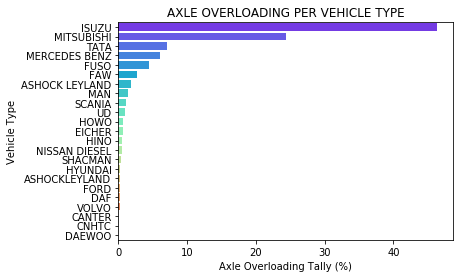

In [37]:
#Axle Overloading per Vehicle Type
AO_Vtf = Q3_AO.groupby('VehicleType')['AO'].count()
AO_Vtf = pd.DataFrame(AO_Vtf)

ACOMP_Vtf = Q3_ACOMP.groupby('VehicleType')['AO'].count()
ACOMP_Vtf = pd.DataFrame(ACOMP_Vtf)

AO_Vtf.rename(columns={'AO':'AOf'}, inplace=True)
ACOMP_Vtf.rename(columns={'AO':'ACOMPf'}, inplace=True)

AO_Vtp = round((AO_Vtf/AO_Vtf.sum())*100, 1)
AO_Vtp = pd.DataFrame(AO_Vtp)

ACOMP_Vtp = round((ACOMP_Vtf/ACOMP_Vtf.sum())*100, 1)
ACOMP_Vtp = pd.DataFrame(ACOMP_Vtp)

AO_Vtp.rename(columns={'AOf':'AOp'}, inplace=True)
ACOMP_Vtp.rename(columns={'ACOMPf':'ACOMPp'}, inplace=True)

AO_Vt = pd.concat([ACOMP_Vtf, ACOMP_Vtp, AO_Vtf, AO_Vtp], axis=1)

AO_Vt['TOTALf'] = (AO_Vtf['AOf'] + ACOMP_Vtf['ACOMPf'])

AO_Vt['TOTALf'].fillna((ACOMP_Vtf.ACOMPf), inplace=True)

AO_Vt['TOTALp'] = round(((AO_Vt.TOTALf/AO_Vt.TOTALf.sum())*100), 1)

AO_Vt.sort_values(['AOf'], ascending=False, inplace=True)

AO_Vt.fillna(0, inplace=True)

sns.barplot(data = AO_Vt, x = 'AOp', y = AO_Vt.index, palette = 'rainbow')
plt.title('AXLE OVERLOADING PER VEHICLE TYPE')
plt.ylabel('Vehicle Type')
plt.xlabel('Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER VEHICLE TYPE.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

AO_Vt.loc['TOTALS']=round(AO_Vt.sum(), 0)

AO_Vt

In [38]:
AO_Vt.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER VEHICLE TYPE.xlsx')

,ACOMPf,ACOMPp,AOf,AOp,TOTALf,TOTALp
BUILDING MATERIALS,111.0,21.7,264.0,47.3,375.0,36.2
CEREALS,31.0,6.1,55.0,9.9,86.0,8.3
CEMENT,30.0,5.9,37.0,6.6,67.0,6.5
CONTAINER,22.0,4.3,17.0,3.0,39.0,3.8
CARGO,10.0,2.0,11.0,2.0,21.0,2.0
...,...,...,...,...,...,...
VEHICLE,1.0,0.2,0.0,0.0,1.0,0.1
WASTE,3.0,0.6,0.0,0.0,3.0,0.3
WASTE PAPERS,1.0,0.2,0.0,0.0,1.0,0.1
WHITE WASH,1.0,0.2,0.0,0.0,1.0,0.1


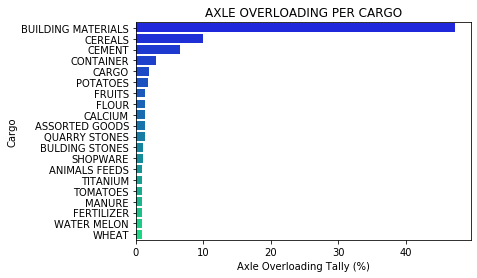

In [39]:
#Gross Overloading per Cargo
AO_Cargof = Q3_AO.groupby('Cargo')['AO'].count()
AO_Cargof = pd.DataFrame(AO_Cargof)

ACOMP_Cargof = Q3_ACOMP.groupby('Cargo')['AO'].count()
ACOMP_Cargof = pd.DataFrame(ACOMP_Cargof)

AO_Cargof.rename(columns={'AO':'AOf'}, inplace=True)
ACOMP_Cargof.rename(columns={'AO':'ACOMPf'}, inplace=True)

AO_Cargop = round((AO_Cargof/AO_Cargof.sum())*100, 1)
AO_Cargop = pd.DataFrame(AO_Cargop)

ACOMP_Cargop = round((ACOMP_Cargof/ACOMP_Cargof.sum())*100, 1)
ACOMP_Cargop = pd.DataFrame(ACOMP_Cargop)

AO_Cargop.rename(columns={'AOf':'AOp'}, inplace=True)
ACOMP_Cargop.rename(columns={'ACOMPf':'ACOMPp'}, inplace=True)

AO_Cargo = pd.concat([ACOMP_Cargof, ACOMP_Cargop, AO_Cargof, AO_Cargop], axis=1)

AO_Cargo['TOTALf'] = (AO_Cargof['AOf'] + ACOMP_Cargof['ACOMPf'])

AO_Cargo['TOTALf'].fillna((ACOMP_Cargof.ACOMPf), inplace=True)

AO_Cargo['TOTALp'] = round(((AO_Cargo.TOTALf/AO_Cargo.TOTALf.sum())*100), 1)

AO_Cargo.sort_values(['AOf'], ascending=False, inplace=True)

AO_Cargo.fillna(0, inplace=True)

AO_Cargoplot = AO_Cargo.head(20)
sns.barplot(data = AO_Cargoplot, x = 'AOp', y = AO_Cargoplot.index, palette = 'winter')
plt.title('AXLE OVERLOADING PER CARGO')
plt.ylabel('Cargo')
plt.xlabel('Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROSS OVERLOADING PER CARGO.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

AO_Cargo.loc['TOTALS']=round(AO_Cargo.sum(), 0)

AO_Cargo

In [40]:
AO_Cargo.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER ORIGIN.xlsx')

,ACOMPf,ACOMPp,AOf,AOp,TOTALf,TOTALp
IMARORO,25.0,4.9,62.0,11.1,87.0,8.5
KITALE,13.0,2.5,31.0,5.6,44.0,4.3
MOMBASA,33.0,6.4,25.0,4.5,58.0,5.7
NAIROBI,53.0,10.4,21.0,3.8,74.0,7.2
THIKA,11.0,2.1,17.0,3.0,28.0,2.7
...,...,...,...,...,...,...
UGUERI,2.0,0.4,0.0,0.0,2.0,0.2
VOI,1.0,0.2,0.0,0.0,1.0,0.1
WEBUYE,2.0,0.4,0.0,0.0,2.0,0.2
ZAMBIA,1.0,0.2,0.0,0.0,1.0,0.1


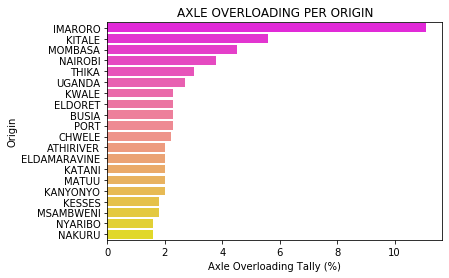

In [41]:
#Axle Overloading per Origin
AO_Orgf = Q3_AO.groupby('Origin')['AO'].count()
AO_Orgf = pd.DataFrame(AO_Orgf)

ACOMP_Orgf = Q3_ACOMP.groupby('Origin')['AO'].count()
ACOMP_Orgf = pd.DataFrame(ACOMP_Orgf)

AO_Orgf.rename(columns={'AO':'AOf'}, inplace=True)
ACOMP_Orgf.rename(columns={'AO':'ACOMPf'}, inplace=True)

AO_Orgp = round((AO_Orgf/AO_Orgf.sum())*100, 1)
AO_Orgp = pd.DataFrame(AO_Orgp)

ACOMP_Orgp = round((ACOMP_Orgf/ACOMP_Orgf.sum())*100, 1)
ACOMP_Orgp = pd.DataFrame(ACOMP_Orgp)

AO_Orgp.rename(columns={'AOf':'AOp'}, inplace=True)
ACOMP_Orgp.rename(columns={'ACOMPf':'ACOMPp'}, inplace=True)

AO_Org = pd.concat([ACOMP_Orgf, ACOMP_Orgp, AO_Orgf, AO_Orgp], axis=1)

AO_Org['TOTALf'] = (AO_Orgf['AOf'] + ACOMP_Orgf['ACOMPf'])

AO_Org['TOTALf'].fillna((ACOMP_Orgf.ACOMPf), inplace=True)

AO_Org['TOTALp'] = round(((AO_Org.TOTALf/AO_Org.TOTALf.sum())*100), 1)

AO_Org.sort_values(['AOf'], ascending=False, inplace=True)

AO_Org.fillna(0, inplace=True)

AO_Orgplot = AO_Org.head(20)
sns.barplot(data = AO_Orgplot, x = 'AOp', y = AO_Orgplot.index, palette = 'spring')
plt.title('AXLE OVERLOADING PER ORIGIN')
plt.ylabel('Origin')
plt.xlabel('Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER ORIGIN.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

AO_Org.loc['TOTALS']=round(AO_Org.sum(), 0)

AO_Org

In [42]:
AO_Org.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER ORIGIN.xlsx')

,ACOMPf,ACOMPp,AOf,AOp,TOTALf,TOTALp
NAIROBI,69.0,13.5,74.0,13.3,143.0,13.9
BABA DOGO,76.0,14.8,40.0,7.2,116.0,11.3
MOMBASA,34.0,6.6,31.0,5.6,65.0,6.3
NAKURU,7.0,1.4,23.0,4.1,30.0,2.9
MLOLONGO,7.0,1.4,22.0,3.9,29.0,2.8
...,...,...,...,...,...,...
TANZANIA,1.0,0.2,0.0,0.0,1.0,0.1
UMOJA,1.0,0.2,0.0,0.0,1.0,0.1
VIPINGO,1.0,0.2,0.0,0.0,1.0,0.1
VOI,2.0,0.4,0.0,0.0,2.0,0.2


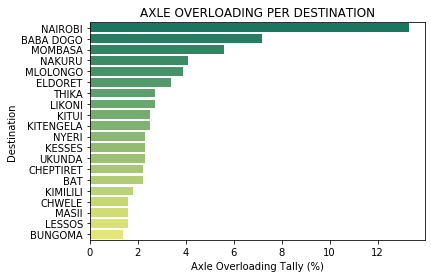

In [43]:
#Axle Overloading per Destination
AO_Desf = Q3_AO.groupby('Destination')['AO'].count()
AO_Desf = pd.DataFrame(AO_Desf)

ACOMP_Desf = Q3_ACOMP.groupby('Destination')['AO'].count()
ACOMP_Desf = pd.DataFrame(ACOMP_Desf)

AO_Desf.rename(columns={'AO':'AOf'}, inplace=True)
ACOMP_Desf.rename(columns={'AO':'ACOMPf'}, inplace=True)

AO_Desp = round((AO_Desf/AO_Desf.sum())*100, 1)
AO_Desp = pd.DataFrame(AO_Desp)

ACOMP_Desp = round((ACOMP_Desf/ACOMP_Desf.sum())*100, 1)
ACOMP_Desp = pd.DataFrame(ACOMP_Desp)

AO_Desp.rename(columns={'AOf':'AOp'}, inplace=True)
ACOMP_Desp.rename(columns={'ACOMPf':'ACOMPp'}, inplace=True)

AO_Des = pd.concat([ACOMP_Desf, ACOMP_Desp, AO_Desf, AO_Desp], axis=1)

AO_Des['TOTALf'] = (AO_Desf['AOf'] + ACOMP_Desf['ACOMPf'])

AO_Des['TOTALf'].fillna((ACOMP_Desf.ACOMPf), inplace=True)

AO_Des['TOTALp'] = round(((AO_Des.TOTALf/AO_Des.TOTALf.sum())*100), 1)

AO_Des.sort_values(['AOf'], ascending=False, inplace=True)

AO_Des.fillna(0, inplace=True)

AO_Desplot = AO_Des.head(20)
sns.barplot(data = AO_Desplot, x = 'AOp', y = AO_Desplot.index, palette = 'summer')
plt.title('AXLE OVERLOADING PER DESTINATION')
plt.ylabel('Destination')
plt.xlabel('Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER DESTINATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

AO_Des.loc['TOTALS']=round(AO_Des.sum(), 0)

AO_Des

In [44]:
AO_Des.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER DESTINATION.xlsx')

,ACOMPf,ACOMPp,AOf,AOp,TOTALf,TOTALp
JUJA BLOCKS,0.0,0.0,19.0,3.4,0.0,0.0
A K MBITHI,0.0,0.0,9.0,1.6,0.0,0.0
MOMBASA MAIZE MILLERS,10.0,2.0,5.0,0.9,15.0,2.6
MULTIPLE HAULIERS,11.0,2.1,4.0,0.7,15.0,2.6
KINDU STORES,0.0,0.0,3.0,0.5,0.0,0.0
...,...,...,...,...,...,...
YASIR,1.0,0.2,0.0,0.0,1.0,0.2
YOKABI LOGISTICS,1.0,0.2,0.0,0.0,1.0,0.2
Z K JUMA LTD,1.0,0.2,0.0,0.0,1.0,0.2
ZENKO LTD,1.0,0.2,0.0,0.0,1.0,0.2


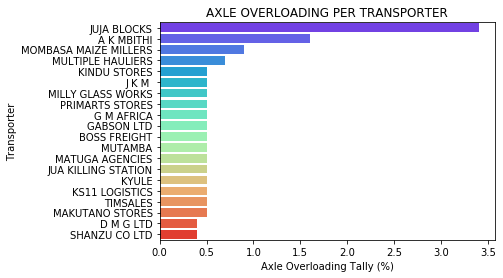

In [45]:
#Axle Overloading per Transporter
AO_Transf = Q3_AO.groupby('Transporter')['AO'].count()
AO_Transf = pd.DataFrame(AO_Transf)

ACOMP_Transf = Q3_ACOMP.groupby('Transporter')['AO'].count()
ACOMP_Transf = pd.DataFrame(ACOMP_Transf)

AO_Transf.rename(columns={'AO':'AOf'}, inplace=True)
ACOMP_Transf.rename(columns={'AO':'ACOMPf'}, inplace=True)

AO_Transp = round((AO_Transf/AO_Transf.sum())*100, 1)
AO_Transp = pd.DataFrame(AO_Transp)

ACOMP_Transp = round((ACOMP_Transf/ACOMP_Transf.sum())*100, 1)
ACOMP_Transp = pd.DataFrame(ACOMP_Transp)

AO_Transp.rename(columns={'AOf':'AOp'}, inplace=True)
ACOMP_Transp.rename(columns={'ACOMPf':'ACOMPp'}, inplace=True)

AO_Trans = pd.concat([ACOMP_Transf, ACOMP_Transp, AO_Transf, AO_Transp], axis=1)

AO_Trans['TOTALf'] = (AO_Transf['AOf'] + ACOMP_Transf['ACOMPf'])

AO_Trans['TOTALf'].fillna((ACOMP_Transf.ACOMPf), inplace=True)

AO_Trans['TOTALp'] = round(((AO_Trans.TOTALf/AO_Trans.TOTALf.sum())*100), 1)

AO_Trans.sort_values(['AOf'], ascending=False, inplace=True)

AO_Trans.fillna(0, inplace=True)

AO_Transplot = AO_Trans.head(20)
sns.barplot(data = AO_Transplot, x = 'AOp', y = AO_Transplot.index, palette = 'rainbow')
plt.title('AXLE OVERLOADING PER TRANSPORTER')
plt.ylabel('Transporter')
plt.xlabel('Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER TRANSPORTER.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

AO_Trans.loc['TOTALS']=round(AO_Trans.sum(), 0)

AO_Trans

In [46]:
AO_Trans.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/AXLE OVERLOADING PER TRANSPORTER.xlsx')

In [47]:
# GROUPING (GA1)
Q3['GA1'] = Q3.A1 # GA1

# GROUPING (GA2)
Q3['GA2_2A'] = 0
GA2_2A = Q3['Configuration']=="2A"
Q3.loc[GA2_2A, 'GA2_2A'] = (Q3.A2)

Q3['GA2_3A'] = 0
GA2_3A = Q3['Configuration']=="3A"
Q3.loc[GA2_3A, 'GA2_3A'] = (Q3.A2 + Q3.A3)

Q3['GA2_3C'] = 0
GA2_3C = Q3['Configuration']=="3C"
Q3.loc[GA2_3C, 'GA2_3C'] = (Q3.A2 + Q3.A3)

Q3['GA2_3D'] = 0
GA2_3D = Q3['Configuration']=="3D"
Q3.loc[GA2_3D, 'GA2_3D'] = (Q3.A2 + Q3.A3)

Q3['GA2_4A'] = 0
GA2_4A = Q3['Configuration']=="4A"
Q3.loc[GA2_4A, 'GA2_4A'] = (Q3.A2)

Q3['GA2_5C'] = 0
GA2_5C = Q3['Configuration']=="5C"
Q3.loc[GA2_5C, 'GA2_5C'] = (Q3.A2)

Q3['GA2_5D'] = 0
GA2_5D = Q3['Configuration']=="5D"
Q3.loc[GA2_5D, 'GA2_5D'] = (Q3.A2)

Q3['GA2_6G'] = 0
GA2_6G = Q3['Configuration']=="6G"
Q3.loc[GA2_6G, 'GA2_6G'] = (Q3.A2 + Q3.A3)

Q3['GA2_6C'] = 0
GA2_6C = Q3['Configuration']=="6C"
Q3.loc[GA2_6C, 'GA2_6C'] = (Q3.A2 + Q3.A3)

Q3['GA2_6A'] = 0
GA2_6A = Q3['Configuration']=="6A"
Q3.loc[GA2_6A, 'GA2_6A'] = (Q3.A2 + Q3.A3)

Q3['GA2_7A'] = 0
GA2_7A = Q3['Configuration']=="7A"
Q3.loc[GA2_7A, 'GA2_7A'] = (Q3.A2 + Q3.A3)

Q3['GA2'] = (Q3.GA2_2A + Q3.GA2_3A + Q3.GA2_3C + Q3.GA2_3D + Q3.GA2_4A + Q3.GA2_5C + Q3.GA2_5D + Q3.GA2_6G + Q3.GA2_6C + Q3.GA2_6A + Q3.GA2_7A) # GA2

# DROPPING DUMMY VARIABLES FOR GA2
Q3.drop(['GA2_2A', 'GA2_3A', 'GA2_3C', 'GA2_3D', 'GA2_4A', 'GA2_5C', 'GA2_5D', 'GA2_6G', 'GA2_6C', 'GA2_6A', 'GA2_7A'], axis=1, inplace=True)

# GROUPING (GA3)
Q3['GA3_4A'] = 0
GA3_4A = Q3['Configuration']=="4A"
Q3.loc[GA3_4A, 'GA3_4A'] = (Q3.A3 + Q3.A4)

Q3['GA3_5C'] = 0
GA3_5C = Q3['Configuration']=="5C"
Q3.loc[GA3_5C, 'GA3_5C'] = (Q3.A3 + Q3.A4 + Q3.A5)

Q3['GA3_5D'] = 0
GA3_5D = Q3['Configuration']=="5D"
Q3.loc[GA3_5D, 'GA3_5D'] = (Q3.A3)

Q3['GA3_6G'] = 0
GA3_6G = Q3['Configuration']=="6G"
Q3.loc[GA3_6G, 'GA3_6G'] = (Q3.A4 + Q3.A5 + Q3.A6)

Q3['GA3_6C'] = 0
GA3_6C = Q3['Configuration']=="6C"
Q3.loc[GA3_6C, 'GA3_6C'] = (Q3.A4 + Q3.A5 + Q3.A6)

Q3['GA3_6A'] = 0
GA3_6A = Q3['Configuration']=="6A"
Q3.loc[GA3_6A, 'GA3_6A'] = (Q3.A4)

Q3['GA3_7A'] = 0
GA3_7A = Q3['Configuration']=="7A"
Q3.loc[GA3_7A, 'GA3_7A'] = (Q3.A4 + Q3.A5)

Q3['GA3'] = (Q3.GA3_4A + Q3.GA3_5C + Q3.GA3_5D + Q3.GA3_6G + Q3.GA3_6C + Q3.GA3_6A + Q3.GA3_7A) # GA3

# DROPPING DUMMY VARIABLES FOR GA3
Q3.drop(['GA3_4A', 'GA3_5C', 'GA3_5D', 'GA3_6G', 'GA3_6C', 'GA3_6A', 'GA3_7A'], axis=1, inplace=True)

# GROUPING (GA4)
Q3['GA4_5D'] = 0
GA4_5D = Q3['Configuration']=="5D"
Q3.loc[GA4_5D, 'GA4_5D'] = (Q3.A4 + Q3.A5)

Q3['GA4_6A'] = 0
GA4_6A = Q3['Configuration']=="6A"
Q3.loc[GA4_6A, 'GA4_6A'] = (Q3.A5 + Q3.A6)

Q3['GA4_7A'] = 0
GA4_7A = Q3['Configuration']=="7A"
Q3.loc[GA4_7A, 'GA4_7A'] = (Q3.A6 + Q3.A7)

Q3['GA4'] = (Q3.GA4_5D + Q3.GA4_6A + Q3.GA4_7A) # GA4

# DROPPING DUMMY VARIABLES FOR GA4
Q3.drop(['GA4_5D', 'GA4_6A', 'GA4_7A'], axis=1, inplace=True)

# GROUP AXLE OVERLOADING (GAO) IS OVERLOADING BASED ON GROUPED AXLES
# CALCULATING OVERLOADING ON GA1 (GA1O)
Q3['GA1Oa'] = 0
GA1Oa = Q3['Configuration']!="3C"
Q3['GA1Oa'] = (Q3.GA1 - 1.05 * 8000)

Q3['GA1Ob'] = 0
GA1Ob = Q3['Configuration']=="3C"
Q3['GA1Oa'] = (Q3.GA1 - 1.05 * 10000)

Q3['GA1O'] = (Q3.GA1Oa + Q3.GA1Ob)

GA1COMP = Q3['GA1O']<=0
Q3.loc[GA1COMP, 'GA1O']=0 # GA1O Is overloading on GA1

# DROPPING DUMMY VARIABLES FOR GA1O
Q3.drop(['GA1Oa', 'GA1Ob'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON GA2 (GA2O)
Q3['GA2O_2A'] = 0
GA2O_2A = Q3['Configuration']=="2A"
Q3.loc[GA2O_2A, 'GA2O_2A'] = (Q3.GA2 - 1.05 * 10000)
GA2ACOMP = Q3['GA2O_2A']<=0
Q3.loc[GA2ACOMP, 'GA2O_2A']=0

Q3['GA2O_3A'] = 0
GA2O_3A = Q3['Configuration']=="3A"
Q3.loc[GA2O_3A, 'GA2O_3A'] = (Q3.GA2 - 1.05 * 18000)
GA3ACOMP = Q3['GA2O_3A']<=0
Q3.loc[GA3ACOMP, 'GA2O_3A']=0

Q3['GA2O_3C'] = 0
GA2O_3C = Q3['Configuration']=="3C"
Q3.loc[GA2O_3C, 'GA2O_3C'] = (Q3.GA2 - 1.05 * 18000)
GA3CCOMP = Q3['GA2O_3C']<=0
Q3.loc[GA3CCOMP, 'GA2O_3C']=0

Q3['GA2O_3D'] = 0
GA2O_3D = Q3['Configuration']=="3D"
Q3.loc[GA2O_3D, 'GA2O_3D'] = (Q3.GA2 - 1.05 * 18000)
GA3DCOMP = Q3['GA2O_3D']<=0
Q3.loc[GA3DCOMP, 'GA2O_3D']=0

Q3['GA2O_4A'] = 0
GA2O_4A = Q3['Configuration']=="4A"
Q3.loc[GA2O_4A, 'GA2O_4A'] = (Q3.GA2 - 1.05 * 10000)
GA4ACOMP = Q3['GA2O_4A']<=0
Q3.loc[GA4ACOMP, 'GA2O_4A']=0

Q3['GA2O_5C'] = 0
GA2O_5C = Q3['Configuration']=="5C"
Q3.loc[GA2O_5C, 'GA2O_5C'] = (Q3.GA2 - 1.05 * 10000)
GA5CCOMP = Q3['GA2O_5C']<=0
Q3.loc[GA5CCOMP, 'GA2O_5C']=0

Q3['GA2O_5D'] = 0
GA2O_5D = Q3['Configuration']=="5D"
Q3.loc[GA2O_5D, 'GA2O_5D'] = (Q3.GA2 - 1.05 * 9000)
GA5DCOMP = Q3['GA2O_5D']<=0
Q3.loc[GA5DCOMP, 'GA2O_5D']=0

Q3['GA2O_6G'] = 0
GA2O_6G = Q3['Configuration']=="6G"
Q3.loc[GA2O_6G, 'GA2O_6G'] = (Q3.GA2 - 1.05 * 16000)
GA6GCOMP = Q3['GA2O_6G']<=0
Q3.loc[GA6GCOMP, 'GA2O_6G']=0

Q3['GA2O_6C'] = 0
GA2O_6C = Q3['Configuration']=="6C"
Q3.loc[GA2O_6C, 'GA2O_6C'] = (Q3.GA2 - 1.05 * 18000)
GA6CCOMP = Q3['GA2O_6C']<=0
Q3.loc[GA6CCOMP, 'GA2O_6C']=0

Q3['GA2O_6A'] = 0
GA2O_6A = Q3['Configuration']=="6A"
Q3.loc[GA2O_6A, 'GA2O_6A'] = (Q3.GA2 - 1.05 * 18000)
GA6ACOMP = Q3['GA2O_6A']<=0
Q3.loc[GA6ACOMP, 'GA2O_6A']=0

Q3['GA2O_7A'] = 0
GA2O_7A = Q3['Configuration']=="7A"
Q3.loc[GA2O_7A, 'GA2O_7A'] = (Q3.GA2 - 1.05 * 16000)
GA7ACOMP = Q3['GA2O_7A']<=0
Q3.loc[GA7ACOMP, 'GA2O_7A']=0

Q3['GA2O'] = (Q3.GA2O_2A + Q3.GA2O_3A + Q3.GA2O_3C + Q3.GA2O_3D + Q3.GA2O_4A + Q3.GA2O_5C + Q3.GA2O_5D + Q3.GA2O_6G + Q3.GA2O_6C + Q3.GA2O_6A + Q3.GA2O_7A) # GA2O Is overloading on GA2

# DROPPING DUMMY VARIABLES FOR GA2 OVERLOADING

Q3.drop(['GA2O_2A', 'GA2O_3A', 'GA2O_3C', 'GA2O_3D', 'GA2O_4A', 'GA2O_5C', 'GA2O_5D', 'GA2O_6G', 'GA2O_6C', 'GA2O_6A', 'GA2O_7A'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON GA3 (GA3O)
Q3['GA3O_4A'] = 0
GA3O_4A = Q3['Configuration']=="4A"
Q3.loc[GA3O_4A, 'GA3O_4A'] = (Q3.GA3 - 1.05 * 18000)
GA4ACOMP = Q3['GA3O_4A']<=0
Q3.loc[GA4ACOMP, 'GA3O_4A']=0

Q3['GA3O_5C'] = 0
GA3O_5C = Q3['Configuration']=="5C"
Q3.loc[GA3O_5C, 'GA3O_5C'] = (Q3.GA3 - 1.05 * 22000)
GA5CCOMP = Q3['GA3O_5C']<=0
Q3.loc[GA5CCOMP, 'GA3O_5C']=0

Q3['GA3O_5D'] = 0
GA3O_5D = Q3['Configuration']=="5D"
Q3.loc[GA3O_5D, 'GA3O_5D'] = (Q3.GA3 - 1.05 * 9000)
GA5DCOMP = Q3['GA3O_5D']<=0
Q3.loc[GA5DCOMP, 'GA3O_5D']=0

Q3['GA3O_6G'] = 0
GA3O_6G = Q3['Configuration']=="6G"
Q3.loc[GA3O_6G, 'GA3O_6G'] = (Q3.GA3 - 1.05 * 24000)
GA6GCOMP = Q3['GA3O_6G']<=0
Q3.loc[GA6GCOMP, 'GA3O_6G']=0

Q3['GA3O_6C'] = 0
GA3O_6C = Q3['Configuration']=="6C"
Q3.loc[GA3O_6C, 'GA3O_6C'] = (Q3.GA3 - 1.05 * 24000)
GA6CCOMP = Q3['GA3O_6C']<=0
Q3.loc[GA6CCOMP, 'GA3O_6C']=0

Q3['GA3O_6A'] = 0
GA3O_6A = Q3['Configuration']=="6A"
Q3.loc[GA3O_6A, 'GA3O_6A'] = (Q3.GA3 - 1.05 * 8000)
GA6ACOMP = Q3['GA3O_6A']<=0
Q3.loc[GA6ACOMP, 'GA3O_6A']=0

Q3['GA3O_7A'] = 0
GA3O_7A = Q3['Configuration']=="7A"
Q3.loc[GA3O_7A, 'GA3O_7A'] = (Q3.GA3 - 1.05 * 16000)
GA7ACOMP = Q3['GA3O_7A']<=0
Q3.loc[GA7ACOMP, 'GA3O_7A']=0

Q3['GA3O'] = (Q3.GA3O_4A + Q3.GA3O_5C + Q3.GA3O_5D + Q3.GA3O_6G + Q3.GA3O_6C + Q3.GA3O_6A + Q3.GA3O_7A) # GA3O Is overloading on GA3

# DROPPING DUMMY VARIABLES FOR GA3O OVERLOADING

Q3.drop(['GA3O_4A', 'GA3O_5C', 'GA3O_5D', 'GA3O_6G', 'GA3O_6C', 'GA3O_6A', 'GA3O_7A'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON GA4 (GA4O)
Q3['GA4O_5D'] = 0
GA4O_5D = Q3['Configuration']=="5D"
Q3.loc[GA4O_5D, 'GA4O_5D'] = (Q3.GA4 - 1.05 * 18000)
GA5DCOMP = Q3['GA4O_5D']<=0
Q3.loc[GA5DCOMP, 'GA4O_5D']=0

Q3['GA4O_6A'] = 0
GA4O_6A = Q3['Configuration']=="6A"
Q3.loc[GA4O_6A, 'GA4O_6A'] = (Q3.GA4 - 1.05 * 18000)
GA6ACOMP = Q3['GA4O_6A']<=0
Q3.loc[GA6ACOMP, 'GA4O_6A']=0

Q3['GA4O_7A'] = 0
GA4O_7A = Q3['Configuration']=="7A"
Q3.loc[GA4O_7A, 'GA4O_7A'] = (Q3.GA4 - 1.05 * 16000)
GA7ACOMP = Q3['GA4O_7A']<=0
Q3.loc[GA7ACOMP, 'GA4O_7A']=0

Q3['GA4O'] = (Q3.GA4O_5D + Q3.GA4O_6A + Q3.GA4O_7A) # GA4O Is overloading on GA4

# DROPPING DUMMY VARIABLES FOR GA4 OVERLOADING
Q3.drop(['GA4O_5D', 'GA4O_6A', 'GA4O_7A'], axis=1, inplace=True)

# CALCULATED GROUP AXLE OVERLOADING (GAO)
Q3['GAO'] = (Q3.GA1O + Q3.GA2O + Q3.GA3O + Q3.GA4O) # GAO

# DROPPING DUMMY VARIABLES FOR GROUPED AXLE OVERLOADING (GAO)
Q3.drop(['GA1O', 'GA2O', 'GA3O', 'GA4O'], axis=1, inplace=True)

#Grouped Axle Overloading/Compliance Analysis
Q3.sort_values(['GAO'], ascending=False, inplace=True)

Q3_GAO = round(pd.DataFrame(Q3[Q3.GAO>0]), 1)
Q3_GACOMP = round(pd.DataFrame(Q3[Q3.GAO<=0]), 1)

#Returning Non-Overloading to zeros
GACOMP = Q3['GAO']<=0
Q3.loc[GACOMP, 'GAO']=0

round(Q3_GAO.describe(), 1)

Q3_GAO.head()

,Station,PlateNo,Configuration,VehicleType,Cargo,Origin,Destination,Transporter,A1,A2,...,Speed,GVW,GLIMIT,GO,AO,GA1,GA2,GA3,GA4,GAO
444,KAJIADO IMARORO RD,KCY079A,3A,HOWO,BUILDING MATERIALS,IMARORO,KITENGELA,SINOTRUCK,7250,15290,...,2.3km/h,37170,27300.0,9870.0,11020.0,7250,29920,0,0,11020.0
873,AINABKOI TIMBOROA,KCD078M,6C,SHACMAN,BUILDING MATERIALS,KAPENGURIA,TIMBOROA,LANGING CO LTD,7320,11190,...,2.2km/h,59000,52500.0,6500.0,6420.0,7320,22200,29480,0,7580.0
332,NDARAGWA,KCE277T,2A,ISUZU,BUILDING MATERIALS,NYERI,NANYUKI,RAEL ENTERPRISES,5720,17400,...,1.1km/h,23120,18900.0,4220.0,6900.0,5720,17400,0,0,6900.0
318,MAJIMBO SIAKAGO UGWERI,KCV871V,2A,ISUZU,BUILDING MATERIALS,SIAKAGO,RUNYENJES,F B C,5630,17050,...,2.2km/h,22680,18900.0,3780.0,6550.0,5630,17050,0,0,6550.0
420,KAJIADO IMARORO RD,KBX908H,2A,ISUZU,BUILDING MATERIALS,IMARORO,NAIROBI,JABO HUL CONSTRUCTION,7080,17000,...,2.1km/h,24080,18900.0,5180.0,6500.0,7080,17000,0,0,6500.0


,GACOMPf,GACOMPp,GAOf,GAOp,TOTALf,TOTALp
Station,,,,,,
KAJIADO IMARORO RD,52.0,9.2,75.0,14.8,127.0,11.9
MOMBASA,75.0,13.3,57.0,11.3,132.0,12.3
LESSOS KESSES,27.0,4.8,44.0,8.7,71.0,6.6
NAIROBI BABA DOGO RD,110.0,19.5,41.0,8.1,151.0,14.1
KISUMU OBOTE RD,58.0,10.3,30.0,5.9,88.0,8.2
NDARAGWA,21.0,3.7,29.0,5.7,50.0,4.7
THIKA KIGANJO BAT,21.0,3.7,29.0,5.7,50.0,4.7
SHIMANZI,34.0,6.0,26.0,5.1,60.0,5.6
MWALA,27.0,4.8,26.0,5.1,53.0,5.0


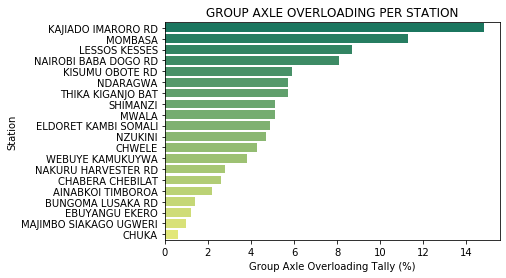

In [48]:

#Grouped Axle Overloading/Compliance per Station Table
GAO_Stf = Q3_GAO.groupby('Station')['GAO'].count()
GAO_Stf = pd.DataFrame(GAO_Stf)

GACOMP_Stf = Q3_GACOMP.groupby('Station')['GAO'].count()
GACOMP_Stf = pd.DataFrame(GACOMP_Stf)

GAO_Stf.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Stf.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Stp = round((GAO_Stf/GAO_Stf.sum())*100, 1)
GAO_Stp = pd.DataFrame(GAO_Stp)

GACOMP_Stp = round((GACOMP_Stf/GACOMP_Stf.sum())*100, 1)
GACOMP_Stp = pd.DataFrame(GACOMP_Stp)

GAO_Stp.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Stp.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_St = pd.concat([GACOMP_Stf, GACOMP_Stp, GAO_Stf, GAO_Stp], axis=1)

GAO_St['TOTALf'] = (GAO_Stf['GAOf'] + GACOMP_Stf['GACOMPf'])

GAO_St['TOTALf'].fillna((GACOMP_Stf.GACOMPf), inplace=True)

GAO_St['TOTALp'] = round(((GAO_St.TOTALf/GAO_St.TOTALf.sum())*100), 1)

GAO_St.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_St.fillna(0, inplace=True)

sns.barplot(data = GAO_St, x = 'GAOp', y = GAO_St.index, palette = 'summer')
plt.title('GROUP AXLE OVERLOADING PER STATION')
plt.ylabel('Station')
plt.xlabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER STATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_St.loc['TOTALS']=round(GAO_St.sum(), 0)

GAO_St

In [49]:
GAO_St.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER STATION.xlsx')

,GACOMPf,GACOMPp,GAOf,GAOp,TOTALf,TOTALp
2A,321.0,56.9,348.0,68.8,669.0,62.7
3A,110.0,19.5,116.0,22.9,226.0,21.2
6C,73.0,12.9,30.0,5.9,103.0,9.7
6G,46.0,8.2,4.0,0.8,50.0,4.7
4A,10.0,1.8,3.0,0.6,13.0,1.2
5C,0.0,0.0,3.0,0.6,0.0,0.0
5D,1.0,0.2,1.0,0.2,2.0,0.2
7A,3.0,0.5,1.0,0.2,4.0,0.4
TOTALS,564.0,100.0,506.0,100.0,1067.0,100.0


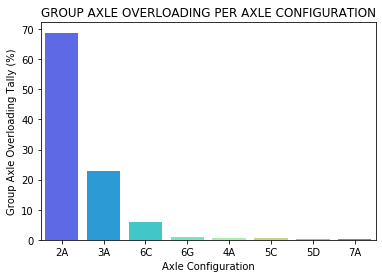

In [50]:
#Grouped Axle Overloading per Axle Configuration
GAO_Axf = Q3_GAO.groupby('Configuration')['GAO'].count()
GAO_Axf = pd.DataFrame(GAO_Axf)

GACOMP_Axf = Q3_GACOMP.groupby('Configuration')['GAO'].count()
GACOMP_Axf = pd.DataFrame(GACOMP_Axf)

GAO_Axf.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Axf.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Axp = round((GAO_Axf/GAO_Axf.sum())*100, 1)
GAO_Axp = pd.DataFrame(GAO_Axp)

GACOMP_Axp = round((GACOMP_Axf/GACOMP_Axf.sum())*100, 1)
GACOMP_Axp = pd.DataFrame(GACOMP_Axp)

GAO_Axp.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Axp.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Ax = pd.concat([GACOMP_Axf, GACOMP_Axp, GAO_Axf, GAO_Axp], axis=1)

GAO_Ax['TOTALf'] = (GAO_Axf['GAOf'] + GACOMP_Axf['GACOMPf'])

GAO_Ax['TOTALf'].fillna((GACOMP_Axf.GACOMPf), inplace=True)

GAO_Ax['TOTALp'] = round(((GAO_Ax.TOTALf/GAO_Ax.TOTALf.sum())*100), 1)

GAO_Ax.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Ax.fillna(0, inplace=True)

sns.barplot(data = GAO_Ax, y = 'GAOp', x = GAO_Ax.index, palette = 'rainbow')
plt.title('GROUP AXLE OVERLOADING PER AXLE CONFIGURATION')
plt.xlabel('Axle Configuration')
plt.ylabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER AXLE CONFIGURATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Ax.loc['TOTALS']=round(GAO_Ax.sum(), 0)

GAO_Ax

In [51]:
GAO_Ax.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER AXLE CONFIGURATION.xlsx')

,GACOMPf,GACOMPp,GAOf,GAOp,TOTALf,TOTALp
ISUZU,204.0,36.2,253.0,50.0,457.0,42.8
MITSUBISHI,152.0,27.0,126.0,24.9,278.0,26.0
TATA,25.0,4.4,33.0,6.5,58.0,5.4
FUSO,16.0,2.8,24.0,4.7,40.0,3.7
MERCEDES BENZ,73.0,12.9,17.0,3.4,90.0,8.4
FAW,6.0,1.1,14.0,2.8,20.0,1.9
ASHOCK LEYLAND,9.0,1.6,9.0,1.8,18.0,1.7
UD,3.0,0.5,5.0,1.0,8.0,0.7
MAN,18.0,3.2,4.0,0.8,22.0,2.1
HINO,9.0,1.6,3.0,0.6,12.0,1.1


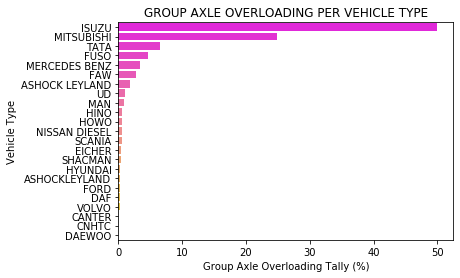

In [52]:
#Grouped Axle Overloading per Vehicle Type
GAO_Vtf = Q3_GAO.groupby('VehicleType')['GAO'].count()
GAO_Vtf = pd.DataFrame(GAO_Vtf)

GACOMP_Vtf = Q3_GACOMP.groupby('VehicleType')['GAO'].count()
GACOMP_Vtf = pd.DataFrame(GACOMP_Vtf)

GAO_Vtf.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Vtf.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Vtp = round((GAO_Vtf/GAO_Vtf.sum())*100, 1)
GAO_Vtp = pd.DataFrame(GAO_Vtp)

GACOMP_Vtp = round((GACOMP_Vtf/GACOMP_Vtf.sum())*100, 1)
GACOMP_Vtp = pd.DataFrame(GACOMP_Vtp)

GAO_Vtp.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Vtp.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Vt = pd.concat([GACOMP_Vtf, GACOMP_Vtp, GAO_Vtf, GAO_Vtp], axis=1)

GAO_Vt['TOTALf'] = (GAO_Vtf['GAOf'] + GACOMP_Vtf['GACOMPf'])

GAO_Vt['TOTALf'].fillna((GACOMP_Vtf.GACOMPf), inplace=True)

GAO_Vt['TOTALp'] = round(((GAO_Vt.TOTALf/GAO_Vt.TOTALf.sum())*100), 1)

GAO_Vt.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Vt.fillna(0, inplace=True)

sns.barplot(data = GAO_Vt, x = 'GAOp', y = GAO_Vt.index, palette = 'spring')
plt.title('GROUP AXLE OVERLOADING PER VEHICLE TYPE')
plt.ylabel('Vehicle Type')
plt.xlabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER VEHICLE TYPE.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Vt.loc['TOTALS']=round(GAO_Vt.sum(), 0)

GAO_Vt

In [53]:
GAO_Vt.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER VEHICLE TYPE.xlsx')

,GACOMPf,GACOMPp,GAOf,GAOp,TOTALf,TOTALp
BUILDING MATERIALS,128.0,22.7,247.0,48.8,375.0,36.0
CEREALS,32.0,5.7,54.0,10.7,86.0,8.3
CEMENT,32.0,5.7,35.0,6.9,67.0,6.4
CONTAINER,27.0,4.8,12.0,2.4,39.0,3.7
POTATOES,5.0,0.9,10.0,2.0,15.0,1.4
...,...,...,...,...,...,...
WASTE,3.0,0.5,0.0,0.0,3.0,0.3
WASTE PAPERS,1.0,0.2,0.0,0.0,1.0,0.1
WATER,14.0,2.5,0.0,0.0,14.0,1.3
WHITE WASH,1.0,0.2,0.0,0.0,1.0,0.1


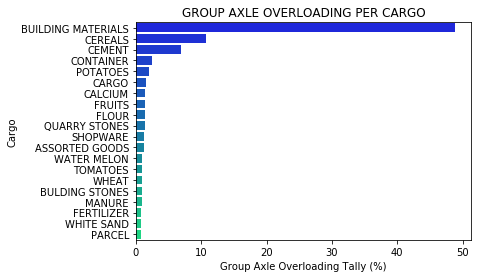

In [54]:
#Group Axle Overloading per Cargo
GAO_Cargof = Q3_GAO.groupby('Cargo')['GAO'].count()
GAO_Cargof = pd.DataFrame(GAO_Cargof)

GACOMP_Cargof = Q3_GACOMP.groupby('Cargo')['GAO'].count()
GACOMP_Cargof = pd.DataFrame(GACOMP_Cargof)

GAO_Cargof.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Cargof.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Cargop = round((GAO_Cargof/GAO_Cargof.sum())*100, 1)
GAO_Cargop = pd.DataFrame(GAO_Cargop)

GACOMP_Cargop = round((GACOMP_Cargof/GACOMP_Cargof.sum())*100, 1)
GACOMP_Cargop = pd.DataFrame(GACOMP_Cargop)

GAO_Cargop.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Cargop.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Cargo = pd.concat([GACOMP_Cargof, GACOMP_Cargop, GAO_Cargof, GAO_Cargop], axis=1)

GAO_Cargo['TOTALf'] = (GAO_Cargof['GAOf'] + GACOMP_Cargof['GACOMPf'])

GAO_Cargo['TOTALf'].fillna((GACOMP_Cargof.GACOMPf), inplace=True)

GAO_Cargo['TOTALp'] = round(((GAO_Cargo.TOTALf/GAO_Cargo.TOTALf.sum())*100), 1)

GAO_Cargo.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Cargo.fillna(0, inplace=True)

GAO_Cargoplot = GAO_Cargo.head(20)
sns.barplot(data = GAO_Cargoplot, x = 'GAOp', y = GAO_Cargoplot.index, palette = 'winter')
plt.title('GROUP AXLE OVERLOADING PER CARGO')
plt.ylabel('Cargo')
plt.xlabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER CARGO.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Cargo.loc['TOTALS']=round(GAO_Cargo.sum(), 0)

GAO_Cargo

In [55]:
GAO_Cargo.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER ORIGIN.xlsx')

,GACOMPf,GACOMPp,GAOf,GAOp,TOTALf,TOTALp
IMARORO,27.0,4.8,60.0,11.9,87.0,8.5
KITALE,14.0,2.5,30.0,5.9,44.0,4.3
MOMBASA,38.0,6.7,20.0,4.0,58.0,5.6
NAIROBI,57.0,10.1,17.0,3.4,74.0,7.2
THIKA,13.0,2.3,15.0,3.0,28.0,2.7
...,...,...,...,...,...,...
UGUERI,2.0,0.4,0.0,0.0,2.0,0.2
VOI,1.0,0.2,0.0,0.0,1.0,0.1
WEBUYE,2.0,0.4,0.0,0.0,2.0,0.2
ZAMBIA,1.0,0.2,0.0,0.0,1.0,0.1


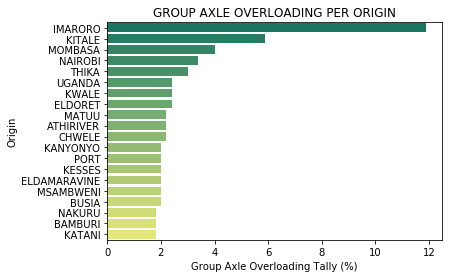

In [56]:
#Grouped Axle Overloading per Origin
GAO_Orgf = Q3_GAO.groupby('Origin')['GAO'].count()
GAO_Orgf = pd.DataFrame(GAO_Orgf)

GACOMP_Orgf = Q3_GACOMP.groupby('Origin')['GAO'].count()
GACOMP_Orgf = pd.DataFrame(GACOMP_Orgf)

GAO_Orgf.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Orgf.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Orgp = round((GAO_Orgf/GAO_Orgf.sum())*100, 1)
GAO_Orgp = pd.DataFrame(GAO_Orgp)

GACOMP_Orgp = round((GACOMP_Orgf/GACOMP_Orgf.sum())*100, 1)
GACOMP_Orgp = pd.DataFrame(GACOMP_Orgp)

GAO_Orgp.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Orgp.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Org = pd.concat([GACOMP_Orgf, GACOMP_Orgp, GAO_Orgf, GAO_Orgp], axis=1)

GAO_Org['TOTALf'] = (GAO_Orgf['GAOf'] + GACOMP_Orgf['GACOMPf'])

GAO_Org['TOTALf'].fillna((GACOMP_Orgf.GACOMPf), inplace=True)

GAO_Org['TOTALp'] = round(((GAO_Org.TOTALf/GAO_Org.TOTALf.sum())*100), 1)

GAO_Org.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Org.fillna(0, inplace=True)

GAO_Orgplot = GAO_Org.head(20)
sns.barplot(data = GAO_Orgplot, x = 'GAOp', y = GAO_Orgplot.index, palette = 'summer')
plt.title('GROUP AXLE OVERLOADING PER ORIGIN')
plt.ylabel('Origin')
plt.xlabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER ORIGIN.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Org.loc['TOTALS']=round(GAO_Org.sum(), 0)

GAO_Org

In [57]:
GAO_Org.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER ORIGIN.xlsx')

,GACOMPf,GACOMPp,GAOf,GAOp,TOTALf,TOTALp
NAIROBI,75.0,13.3,68.0,13.4,143.0,13.9
BABA DOGO,83.0,14.7,33.0,6.5,116.0,11.3
MOMBASA,42.0,7.4,23.0,4.5,65.0,6.3
MLOLONGO,8.0,1.4,21.0,4.2,29.0,2.8
NAKURU,10.0,1.8,20.0,4.0,30.0,2.9
...,...,...,...,...,...,...
TANZANIA,1.0,0.2,0.0,0.0,1.0,0.1
UMOJA,1.0,0.2,0.0,0.0,1.0,0.1
VIPINGO,1.0,0.2,0.0,0.0,1.0,0.1
VOI,2.0,0.4,0.0,0.0,2.0,0.2


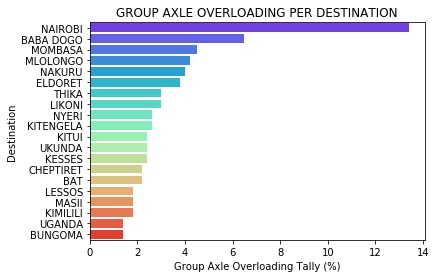

In [58]:
#Grouped Axle Overloading per Destination
GAO_Desf = Q3_GAO.groupby('Destination')['GAO'].count()
GAO_Desf = pd.DataFrame(GAO_Desf)

GACOMP_Desf = Q3_GACOMP.groupby('Destination')['GAO'].count()
GACOMP_Desf = pd.DataFrame(GACOMP_Desf)

GAO_Desf.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Desf.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Desp = round((GAO_Desf/GAO_Desf.sum())*100, 1)
GAO_Desp = pd.DataFrame(GAO_Desp)

GACOMP_Desp = round((GACOMP_Desf/GACOMP_Desf.sum())*100, 1)
GACOMP_Desp = pd.DataFrame(GACOMP_Desp)

GAO_Desp.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Desp.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Des = pd.concat([GACOMP_Desf, GACOMP_Desp, GAO_Desf, GAO_Desp], axis=1)

GAO_Des['TOTALf'] = (GAO_Desf['GAOf'] + GACOMP_Desf['GACOMPf'])

GAO_Des['TOTALf'].fillna((GACOMP_Desf.GACOMPf), inplace=True)

GAO_Des['TOTALp'] = round(((GAO_Des.TOTALf/GAO_Des.TOTALf.sum())*100), 1)

GAO_Des.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Des.fillna(0, inplace=True)

GAO_Desplot = GAO_Des.head(20)
sns.barplot(data = GAO_Desplot, x = 'GAOp', y = GAO_Desplot.index, palette = 'rainbow')
plt.title('GROUP AXLE OVERLOADING PER DESTINATION')
plt.ylabel('Destination')
plt.xlabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER DESTINATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Des.loc['TOTALS']=round(GAO_Des.sum(), 0)

GAO_Des

In [59]:
GAO_Des.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER DESTINATION.xlsx')

,GACOMPf,GACOMPp,GAOf,GAOp,TOTALf,TOTALp
JUJA BLOCKS,5.0,0.9,14.0,2.8,19.0,2.9
A K MBITHI,1.0,0.2,8.0,1.6,9.0,1.4
MOMBASA MAIZE MILLERS,11.0,2.0,4.0,0.8,15.0,2.3
PRIMARTS STORES,0.0,0.0,3.0,0.6,0.0,0.0
BOSS FREIGHT,0.0,0.0,3.0,0.6,0.0,0.0
...,...,...,...,...,...,...
YASIR,1.0,0.2,0.0,0.0,1.0,0.2
YOKABI LOGISTICS,1.0,0.2,0.0,0.0,1.0,0.2
Z K JUMA LTD,1.0,0.2,0.0,0.0,1.0,0.2
ZENKO LTD,1.0,0.2,0.0,0.0,1.0,0.2


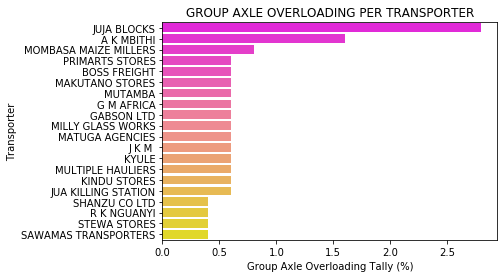

In [60]:
#Grouped Axle Overloading per Transporter
GAO_Transf = Q3_GAO.groupby('Transporter')['GAO'].count()
GAO_Transf = pd.DataFrame(GAO_Transf)

GACOMP_Transf = Q3_GACOMP.groupby('Transporter')['GAO'].count()
GACOMP_Transf = pd.DataFrame(GACOMP_Transf)

GAO_Transf.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Transf.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Transp = round((GAO_Transf/GAO_Transf.sum())*100, 1)
GAO_Transp = pd.DataFrame(GAO_Transp)

GACOMP_Transp = round((GACOMP_Transf/GACOMP_Transf.sum())*100, 1)
GACOMP_Transp = pd.DataFrame(GACOMP_Transp)

GAO_Transp.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Transp.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Trans = pd.concat([GACOMP_Transf, GACOMP_Transp, GAO_Transf, GAO_Transp], axis=1)

GAO_Trans['TOTALf'] = (GAO_Transf['GAOf'] + GACOMP_Transf['GACOMPf'])

GAO_Trans['TOTALf'].fillna((GACOMP_Transf.GACOMPf), inplace=True)

GAO_Trans['TOTALp'] = round(((GAO_Trans.TOTALf/GAO_Trans.TOTALf.sum())*100), 1)

GAO_Trans.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Trans.fillna(0, inplace=True)

GAO_Transplot = GAO_Trans.head(20)
sns.barplot(data = GAO_Transplot, x = 'GAOp', y = GAO_Transplot.index, palette = 'spring')
plt.title('GROUP AXLE OVERLOADING PER TRANSPORTER')
plt.ylabel('Transporter')
plt.xlabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER TRANSPORTER.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Trans.loc['TOTALS']=round(GAO_Trans.sum(), 0)

GAO_Trans

In [61]:
GAO_Trans.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/GROUP AXLE OVERLOADING PER TRANSPORTER.xlsx')

In [62]:
#Top 20 Gross Overloading HGV
Q3.sort_values(['GO'], ascending=False, inplace=True)
GO20 = Q3.head(20)
GO20

,Station,PlateNo,Configuration,VehicleType,Cargo,Origin,Destination,Transporter,A1,A2,...,Speed,GVW,GLIMIT,GO,AO,GA1,GA2,GA3,GA4,GAO
444,KAJIADO IMARORO RD,KCY079A,3A,HOWO,BUILDING MATERIALS,IMARORO,KITENGELA,SINOTRUCK,7250,15290,...,2.3km/h,37170,27300.0,9870.0,11020.0,7250,29920,0,0,11020.0
172,SHIMANZI,KAN618R,5C,NISSAN DIESEL,CARGO,PORT,MOMBASA,BOSS FREIGHT,5610,11200,...,2.4km/h,51710,42000.0,9710.0,3580.0,5610,11200,25440,0,3040.0
385,KAJIADO IMARORO RD,KCH029Z,2A,ISUZU,BUILDING MATERIALS,IMARORO,KITENGELA,A K MBITHI,13390,14080,...,2.2km/h,27470,18900.0,8570.0,8570.0,13390,14080,0,0,6470.0
872,AINABKOI TIMBOROA,KAX133P,2A,MITSUBISHI,CEREALS,AINABKOI,ELDORET,C M N INVESTMENT,6510,10470,...,1.4km/h,26520,18900.0,7620.0,0.0,6510,10470,0,0,0.0
873,AINABKOI TIMBOROA,KCD078M,6C,SHACMAN,BUILDING MATERIALS,KAPENGURIA,TIMBOROA,LANGING CO LTD,7320,11190,...,2.2km/h,59000,52500.0,6500.0,6420.0,7320,22200,29480,0,7580.0
736,ELDORET KAMBI SOMALI,KCA611Y,2A,ISUZU,BUILDING MATERIALS,SOY,PIPELINE,J K TRANSPORTERS,12640,11480,...,2.7km/h,24120,18900.0,5220.0,5220.0,12640,11480,0,0,3120.0
420,KAJIADO IMARORO RD,KBX908H,2A,ISUZU,BUILDING MATERIALS,IMARORO,NAIROBI,JABO HUL CONSTRUCTION,7080,17000,...,2.1km/h,24080,18900.0,5180.0,6500.0,7080,17000,0,0,6500.0
450,KAJIADO IMARORO RD,KCQ455N,3A,FORD,BUILDING MATERIALS,IMARORO,ISINYA,SINOHYDRO,8790,12350,...,1.2km/h,32370,27300.0,5070.0,5070.0,8790,23580,0,0,4680.0
954,CHWELE,KAE425M,3A,FAW,BUILDING MATERIALS,CHWELE,KIMILILI,CASSIM TRANSPORTERS,12280,9560,...,2.4km/h,31800,27300.0,4500.0,4500.0,12280,19520,0,0,2400.0
332,NDARAGWA,KCE277T,2A,ISUZU,BUILDING MATERIALS,NYERI,NANYUKI,RAEL ENTERPRISES,5720,17400,...,1.1km/h,23120,18900.0,4220.0,6900.0,5720,17400,0,0,6900.0


In [63]:
GO20.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/TOP 20 GROSS OVERLOADING HGV.xlsx')

In [64]:
#Top 20 Axle Overloading HGV
Q3.sort_values(['AO'], ascending=False, inplace=True)
AO20 = Q3.head(20)
AO20

,Station,PlateNo,Configuration,VehicleType,Cargo,Origin,Destination,Transporter,A1,A2,...,Speed,GVW,GLIMIT,GO,AO,GA1,GA2,GA3,GA4,GAO
444,KAJIADO IMARORO RD,KCY079A,3A,HOWO,BUILDING MATERIALS,IMARORO,KITENGELA,SINOTRUCK,7250,15290,...,2.3km/h,37170,27300.0,9870.0,11020.0,7250,29920,0,0,11020.0
385,KAJIADO IMARORO RD,KCH029Z,2A,ISUZU,BUILDING MATERIALS,IMARORO,KITENGELA,A K MBITHI,13390,14080,...,2.2km/h,27470,18900.0,8570.0,8570.0,13390,14080,0,0,6470.0
1034,KISUMU OBOTE RD,KBT805R,7A,MERCEDES BENZ,LOGS,SIAYA,NAKURU,TIMSALES,9840,8440,...,2.2km/h,54980,58800.0,0.0,8330.0,9840,16410,14600,14130,0.0
995,KISUMU OBOTE RD,C4632A,7A,MERCEDES BENZ,CONTAINER,CONGO,MOMBASA,UNSPECIFIED,7160,7310,...,2.1km/h,52340,58800.0,0.0,7850.0,7160,14100,14830,16250,0.0
332,NDARAGWA,KCE277T,2A,ISUZU,BUILDING MATERIALS,NYERI,NANYUKI,RAEL ENTERPRISES,5720,17400,...,1.1km/h,23120,18900.0,4220.0,6900.0,5720,17400,0,0,6900.0
318,MAJIMBO SIAKAGO UGWERI,KCV871V,2A,ISUZU,BUILDING MATERIALS,SIAKAGO,RUNYENJES,F B C,5630,17050,...,2.2km/h,22680,18900.0,3780.0,6550.0,5630,17050,0,0,6550.0
420,KAJIADO IMARORO RD,KBX908H,2A,ISUZU,BUILDING MATERIALS,IMARORO,NAIROBI,JABO HUL CONSTRUCTION,7080,17000,...,2.1km/h,24080,18900.0,5180.0,6500.0,7080,17000,0,0,6500.0
1053,KISUMU OBOTE RD,KCP383M,7A,MAN,LOGS,SIAYA,NAKURU,TIMSALES,7240,9400,...,3.5km/h,45140,58800.0,0.0,6450.0,7240,18580,9930,9390,1780.0
873,AINABKOI TIMBOROA,KCD078M,6C,SHACMAN,BUILDING MATERIALS,KAPENGURIA,TIMBOROA,LANGING CO LTD,7320,11190,...,2.2km/h,59000,52500.0,6500.0,6420.0,7320,22200,29480,0,7580.0
1035,KISUMU OBOTE RD,KBT806R,7A,MERCEDES BENZ,LOGS,SIAYA,NAKURU,TIMSALES,8870,7860,...,3.3km/h,48260,58800.0,0.0,6150.0,8870,15560,11390,12440,0.0


In [65]:
AO20.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/TOP 20 AXLE OVERLOADING HGV.xlsx')

In [66]:
#Top 20 Group Axle Overloading HGV
Q3.sort_values(['GAO'], ascending=False, inplace=True)
GAO20 = Q3.head(20)
GAO20

,Station,PlateNo,Configuration,VehicleType,Cargo,Origin,Destination,Transporter,A1,A2,...,Speed,GVW,GLIMIT,GO,AO,GA1,GA2,GA3,GA4,GAO
444,KAJIADO IMARORO RD,KCY079A,3A,HOWO,BUILDING MATERIALS,IMARORO,KITENGELA,SINOTRUCK,7250,15290,...,2.3km/h,37170,27300.0,9870.0,11020.0,7250,29920,0,0,11020.0
873,AINABKOI TIMBOROA,KCD078M,6C,SHACMAN,BUILDING MATERIALS,KAPENGURIA,TIMBOROA,LANGING CO LTD,7320,11190,...,2.2km/h,59000,52500.0,6500.0,6420.0,7320,22200,29480,0,7580.0
332,NDARAGWA,KCE277T,2A,ISUZU,BUILDING MATERIALS,NYERI,NANYUKI,RAEL ENTERPRISES,5720,17400,...,1.1km/h,23120,18900.0,4220.0,6900.0,5720,17400,0,0,6900.0
318,MAJIMBO SIAKAGO UGWERI,KCV871V,2A,ISUZU,BUILDING MATERIALS,SIAKAGO,RUNYENJES,F B C,5630,17050,...,2.2km/h,22680,18900.0,3780.0,6550.0,5630,17050,0,0,6550.0
420,KAJIADO IMARORO RD,KBX908H,2A,ISUZU,BUILDING MATERIALS,IMARORO,NAIROBI,JABO HUL CONSTRUCTION,7080,17000,...,2.1km/h,24080,18900.0,5180.0,6500.0,7080,17000,0,0,6500.0
385,KAJIADO IMARORO RD,KCH029Z,2A,ISUZU,BUILDING MATERIALS,IMARORO,KITENGELA,A K MBITHI,13390,14080,...,2.2km/h,27470,18900.0,8570.0,8570.0,13390,14080,0,0,6470.0
334,NDARAGWA,KCC881S,2A,ISUZU,BUILDING MATERIALS,EDUDU,NYERI,HILLBROW ENTERPRISES,5630,15960,...,1.6km/h,21590,18900.0,2690.0,5460.0,5630,15960,0,0,5460.0
328,NDARAGWA,KBS453Y,2A,ISUZU,BUILDING MATERIALS,TIMAU,NYAHURURU,WAMAE,6900,15840,...,0.7km/h,22740,18900.0,3840.0,5340.0,6900,15840,0,0,5340.0
325,MAJIMBO SIAKAGO UGWERI,KBK985K,2A,ISUZU,FRUITS,SIAKAGO,NAIROBI,CARGONET LOGISTICS,5020,15690,...,1.6km/h,20710,18900.0,1810.0,5190.0,5020,15690,0,0,5190.0
245,NZUKINI,KCH150N,6C,ISUZU,BUILDING MATERIALS,MASINGA,THIKA,SAWAMAS TRANSPORTERS,7120,8210,...,2.2km/h,53470,52500.0,970.0,2750.0,7120,16300,30050,0,4850.0


In [67]:
GAO20.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/TOP 20 GROUP AXLE OVERLOADING HGV.xlsx')

In [68]:
#ANALYSED HGV CLEAN DATA
Q3.sort_values(['GO'], ascending=False, inplace=True)
Q3.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Independent/CleanData.xlsx')

**PART TWO: STATIC AXLE LOAD MONITORING DATA ANALYSIS FOR KENYA ROADS BOARD**
**DESIGNED BY: DIR. PETER KIPROTICH NGETICH,**
**ACAPE IMPACT CONSULTANT LIMITED**
**P.O. Box 2149-20200,Kabianga Road, Kericho ¦Tel: +254 725 946 923**
**Web : http://m.facebook.com/acapeimpact ¦E-Mail:acapeimpact@gmail.com**
**(Up and Running with Python)**
**DATA IMPORTATION PROCESSES:- (Use Jupyter Notebook and make sure your data imported as Q3 (excel)**

In [69]:
#IMPORT REQUIRED MODULES/LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For data visualization

WeighbridgeName = pd.read_csv('C:/Users/ACAPE CONSULTANT/Desktop/Rbased/Static/WeighbridgeName.csv')
print(WeighbridgeName)

  WeighbrigeName
0         MTWAPA


In [70]:
# READ YOUR STATIC RAW EXCEL DATA NAMED Q3 ON COMPUTER DESKTOP UNDER Rbased FOLDER IN Static FOLDER.

Q3 = pd.ExcelFile('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/Q3.xlsx')

Q3 = Q3.parse(0)

#REMOVING SPECIAL CHARATERS IN DATAFRAME

for Configuration in Q3.columns:
    Q3['Configuration'] = Q3['Configuration'].str.replace(r'\W', " ")
  
for Transporter in Q3.columns:
    Q3['Transporter'] = Q3['Transporter'].str.replace(r'\W', " ")
    
for Cargo in Q3.columns:
    Q3['Cargo'] = Q3['Cargo'].str.replace(r'\W', " ")

Q3['PlateNo'].fillna(0, inplace=True)
Q3['Configuration'].fillna(0, inplace=True)
Q3['Transporter'].fillna(0, inplace=True)
Q3['Cargo'].fillna(0, inplace=True)

Q3.head()

,No,TicketNo,Bound,PlateNo,Origin,Destination,TimeIn,Transporter,TimeOut,Cargo,Configuration,A1,A2,A3,A4,A5,A6,A7
0,1,MTWAPA20190800003784_2,MTWAPA MOMBASA BOUND,KCF157W,KLF,MS,2020-08-23 00:26:49,B OMOORIA,2020-08-23 00:26:50,CEMENT 50 KGS BAGS,2A,5260,7660,0,0,0,0,0
1,2,KNMTMBA20200800013663,MTWAPA MOMBASA BOUND,KBM386Z,KLF,MSA,2020-08-23 00:34:54,ASTRON,2020-08-23 00:34:55,SAND,2A,5180,11280,0,0,0,0,0
2,3,KNMTMBA20200800013664,MTWAPA MOMBASA BOUND,KCU224Y,KLF,NaN,2020-08-23 00:44:06,ANDAYI,2020-08-23 00:44:06,0,2A,6400,11360,0,0,0,0,0
3,4,KNMTMBA20200800013665,MTWAPA MOMBASA BOUND,KCP561K,MSA,NaN,2020-08-23 00:49:57,NEw kcc,2020-08-23 00:49:57,MILK,2A,2400,4200,0,0,0,0,0
4,5,KNMTMBA20200800013666,MTWAPA MOMBASA BOUND,KCP735L,KLF,NaN,2020-08-23 00:54:38,S A M,2020-08-23 00:54:38,SAND,2A,4580,10880,0,0,0,0,0


In [72]:
# DATA CLEANING PROCESSES:-
# Ensure all Variables headings merge: Station, PlateNo, Configuration, VehicleType, Origin, Destination, Transporter, Speed, GA1, GA2, GA3 and GA4
DATADEL1 = Q3[Q3.GA1 <=0] # Omitted data for GA1<=0
DATADEL2 = Q3[Q3.GA2 <=0] # Omitted data for GA2<=0
DATADEL3 = Q3[Q3.PlateNo ==0] # Omitted data missing vehicle plate number

DATADEL = pd.concat([DATADEL1, DATADEL2, DATADEL3], axis=1) # DATASET OF DISCARDED/ OMITTED/ DELETED DATA

DATADEL = pd.DataFrame(DATADEL) # ENSURING STRUCTURE IS DATASET

DATADEL

AttributeError: 'DataFrame' object has no attribute 'GA1'

In [ ]:
DATADEL.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/OMITTED DATA.xlsx')

In [ ]:
# FINE TUNING AND DATA CLEANING

# CONVERTING LOWER CASE OBSERVATION STRING VARIABLES INTO UPPER CASE FOR UNIFORMITY
Q3.PlateNo = Q3['PlateNo'].str.upper()
Q3.Configuration = Q3['Configuration'].str.upper()
Q3.Cargo = Q3['Cargo'].str.upper()
Q3.Transporter = Q3['Transporter'].str.upper()

# DATA CLEANING ON AXLE CONFIGURATION
Q3.Configuration.replace("2a","2A", inplace=True)
Q3.Configuration.replace("3a","3A", inplace=True)
Q3.Configuration.replace("3*SDW","3A", inplace=True)
Q3.Configuration.replace("3d","3D", inplace=True)
Q3.Configuration.replace("3d","3D", inplace=True)
Q3.Configuration.replace("4a","4A", inplace=True)
Q3.Configuration.replace("5c","5C", inplace=True)
Q3.Configuration.replace("5d","5D", inplace=True)
Q3.Configuration.replace("5A","5D", inplace=True)
Q3.Configuration.replace("5*SDWWW","5C", inplace=True)
Q3.Configuration.replace("6g","6G", inplace=True)
Q3.Configuration.replace("6*SSDWWW","6G", inplace=True)
Q3.Configuration.replace("6*SSDDDD","6G", inplace=True)
Q3.Configuration.replace("6*SSDDDD","6G", inplace=True)
Q3.Configuration.replace("6*SDSDDD","6G", inplace=True)
Q3.Configuration.replace("6c","6C", inplace=True)
Q3.Configuration.replace("6*SWDDDD","6C", inplace=True)
Q3.Configuration.replace("6*SDDWWW","6C", inplace=True)
Q3.Configuration.replace("6*SWDWWW","6C", inplace=True)
Q3.Configuration.replace("7a","7A", inplace=True)
Q3.Configuration.replace("7A*","7A", inplace=True)
Q3.Configuration.replace("7c*","7A", inplace=True)
Q3.Configuration.replace("7C*","7A", inplace=True)
Q3.Configuration.replace("X7c*","7A", inplace=True)
Q3.Configuration.replace("X7C*","7A", inplace=True)

# DATA CLEANING ON CARGO
Q3.Cargo.replace("stones", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Stones", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("STONES", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("stone", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Stone", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("STONE", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BALLAST", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("ballast", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Ballast", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("sand", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("SAND", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Sand", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("QUARRY STONE", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("QUARRY STORES", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Hardcore", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("hardcore", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("HARDCORE", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Hardcore", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Blocks", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BLOCKS", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BUILDING STONES", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Building Stones", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("building stones", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BUILDING BLOCKS", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Building Blocks", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("building blocks", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("murram", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("MURRAM", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Murram", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("QUARRY", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("quarry", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Quarry", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("QUARRY DUST", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Quarry Dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("quarry dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("DUST", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("RIVER SAND", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("river sand", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("River Sand", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BULDING MAT", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BULDINGS MAT", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Bulding Mat", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BULDING MATS", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BULDINGS MATS", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("bulding mats", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Bulding Mats", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BRICKS", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("bricks", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BRICK", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("brick", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Bricks", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Brick", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("BUILDING MATERIAL", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("building material", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Building Material", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("SOIL", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("soil", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Soil", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("CLAY SOIL", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("clay soil", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Clay Soil", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("stone dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("STONE DUST", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Stone Dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Q.DUST", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("q.dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Q.Dust", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("H/CORE", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("H/ CORE", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("H/Core", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("H.CORE", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("H.Core", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("SHOP", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("Shop", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("shop", "BUILDING MATERIALS", inplace=True)
Q3.Cargo.replace("SHOP ITEMS", "SHOPWARE", inplace=True)
Q3.Cargo.replace("shop items", "SHOPWARE", inplace=True)
Q3.Cargo.replace("Shop Items", "SHOPWARE", inplace=True)
Q3.Cargo.replace("SHOP GOODS", "SHOPWARE", inplace=True)
Q3.Cargo.replace("Shop Goods", "SHOPWARE", inplace=True)
Q3.Cargo.replace("shop goods", "SHOPWARE", inplace=True)
Q3.Cargo.replace("SHOP ITEM", "SHOPWARE", inplace=True)
Q3.Cargo.replace("shop item", "SHOPWARE", inplace=True)
Q3.Cargo.replace("Shop Gds", "SHOPWARE", inplace=True)
Q3.Cargo.replace("shop gds", "SHOPWARE", inplace=True)
Q3.Cargo.replace("SHOP GDS", "SHOPWARE", inplace=True)
Q3.Cargo.replace("Shop Item", "SHOPWARE", inplace=True)
Q3.Cargo.replace("H/W GOODS", "HARDWARE", inplace=True)
Q3.Cargo.replace("h/w goods", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/W Goods", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/W", "HARDWARE", inplace=True)
Q3.Cargo.replace("h/w", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/W", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/W Items", "HARDWARE", inplace=True)
Q3.Cargo.replace("h/w items", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/W ITEMS", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/WARE", "HARDWARE", inplace=True)
Q3.Cargo.replace("H/h Items", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("H/N GOODS", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("H/N Goods", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("h/n goods", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("H/HOLDINGS", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("HOUSEHOLD", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("HOUSEHOLDS", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("HOUSE HOLDS", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("HOUSE HOLDINGS", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("HOUSEHOLDINGS", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("HOUSEHOLDING", "HOUSEHOLD ITEMS", inplace=True)
Q3.Cargo.replace("IRON SHEET", "IRON SHEETS", inplace=True)
Q3.Cargo.replace("IRONSHEET ", "IRON SHEETS", inplace=True)
Q3.Cargo.replace("BATA", "BATA ITEMS", inplace=True)
Q3.Cargo.replace("bata", "BATA ITEMS", inplace=True)
Q3.Cargo.replace("Bata", "BATA ITEMS", inplace=True)
Q3.Cargo.replace("BATA SHOES", "BATA ITEMS", inplace=True)
Q3.Cargo.replace("bata Shoes", "BATA ITEMS", inplace=True)
Q3.Cargo.replace("Bata shoes", "BATA ITEMS", inplace=True)
Q3.Cargo.replace("ASSORTED", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("assorted", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("Assorted", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("ASSORTED GD", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("assorted gd", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("Assorted Gd", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("ASSORTED GDS", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("assorted gds", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("Assorted Gds", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("ASS", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("ass", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("Ass", "ASSORTED GOODS", inplace=True)
Q3.Cargo.replace("FRUIT", "FRUITS", inplace=True)
Q3.Cargo.replace("fruit", "FRUITS", inplace=True)
Q3.Cargo.replace("AVOCADO", "FRUITS", inplace=True)
Q3.Cargo.replace("avocado", "FRUITS", inplace=True)
Q3.Cargo.replace("Avocado", "FRUITS", inplace=True)
Q3.Cargo.replace("AVOCADOS", "FRUITS", inplace=True)
Q3.Cargo.replace("avocados", "FRUITS", inplace=True)
Q3.Cargo.replace("Avocados", "FRUITS", inplace=True)
Q3.Cargo.replace("BANANA", "FRUITS", inplace=True)
Q3.Cargo.replace("banana", "FRUITS", inplace=True)
Q3.Cargo.replace("Banana", "FRUITS", inplace=True)
Q3.Cargo.replace("BANANAS", "FRUITS", inplace=True)
Q3.Cargo.replace("bananas", "FRUITS", inplace=True)
Q3.Cargo.replace("Bananas", "FRUITS", inplace=True)
Q3.Cargo.replace("MANGO", "FRUITS", inplace=True)
Q3.Cargo.replace("mango", "FRUITS", inplace=True)
Q3.Cargo.replace("Mango", "FRUITS", inplace=True)
Q3.Cargo.replace("MANGOES", "FRUITS", inplace=True)
Q3.Cargo.replace("Mangoes", "FRUITS", inplace=True)
Q3.Cargo.replace("mangoes", "FRUITS", inplace=True)
Q3.Cargo.replace("GOATS", "ANIMALS", inplace=True)
Q3.Cargo.replace("goats", "ANIMALS", inplace=True)
Q3.Cargo.replace("Goats", "ANIMALS", inplace=True)
Q3.Cargo.replace("GOAT", "ANIMALS", inplace=True)
Q3.Cargo.replace("goat", "ANIMALS", inplace=True)
Q3.Cargo.replace("Goat", "ANIMALS", inplace=True)
Q3.Cargo.replace("CATTLE", "ANIMALS", inplace=True)
Q3.Cargo.replace("cattle", "ANIMALS", inplace=True)
Q3.Cargo.replace("Cattle", "ANIMALS", inplace=True)
Q3.Cargo.replace("PIGS", "ANIMALS", inplace=True)
Q3.Cargo.replace("pigs", "ANIMALS", inplace=True)
Q3.Cargo.replace("Pigs", "ANIMALS", inplace=True)
Q3.Cargo.replace("PIG", "ANIMALS", inplace=True)
Q3.Cargo.replace("pig", "ANIMALS", inplace=True)
Q3.Cargo.replace("Animal", "ANIMALS", inplace=True)
Q3.Cargo.replace("ANIMAL", "ANIMALS", inplace=True)
Q3.Cargo.replace("animal", "ANIMALS", inplace=True)
Q3.Cargo.replace("DAIRY MEAL", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("dairy meal", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Dairy Meal", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("DAIRY", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("dairy", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Dairy", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("MEAL", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("meal", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Meal", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("FEEDS", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("feeds", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Feeds", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("FEED", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("feed", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Feed", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("ANIMAL FEEDS", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("COW FEEDS", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("cow feeds", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Cow Feeds", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("CHICKEN FEED", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("chicken feed", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chicken Feed", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("CHICKEN FEEDS", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("chicken feeds", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chicken Feeds", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chicken FEED", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("chicken feed", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chicken Feed", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chicken MARSH", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("chicken marsh", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chicken Marsh", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chick MARSH", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("chick marsh", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("Chick Marsh", "ANIMALS FEEDS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("SODAS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("sodas", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Sodas", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("SODA", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("soda", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Soda", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("BEVERAGES", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Beverages", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("BEVERAGE", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("beverage", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Beverage", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("soft drink", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Soft Drink", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("SOFT DRK", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("soft drk", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("SOFT DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("soft drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Soft Drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("SOFT DRKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("soft drks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Soft Drks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("ALVARO", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("alvaro", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Alvaro", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("ENERGY DRINKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("energy drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Energy Drinks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("ENERGY DRINK", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("energy drink", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Energy Drink", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("ENERGY DRKS", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("energy drks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Energy Drks", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("ENERGY DRK", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("energy drk", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("Energy Drk", "BEVERAGES/SOFT DRINKS", inplace=True)
Q3.Cargo.replace("STATIONARIES", "STATIONARY", inplace=True)
Q3.Cargo.replace("stationaries", "STATIONARY", inplace=True)
Q3.Cargo.replace("Stationaries", "STATIONARY", inplace=True)
Q3.Cargo.replace("ALCOHOL", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Alcohol", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("alcohol", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("BEER", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Beer", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("beer", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("BEERS", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Beers", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("beers", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("ALCOHOL DRINKS", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Alcohol Drinks", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("alcohol drinks", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("ALCOHOL DRINK", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Alcohol Drink", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("alcohol drink", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("ALCOHOL DRKS", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Alcohol Drks", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("alcohol drks", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("ALCOHOL DRK", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Alcohol Drk", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("alcohol drk", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("GUNNIES", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("gunnies", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Gunnies", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("GENNIES", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("gennies", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Gennies", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("GENIES", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("genies", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("Genies", "ALCOHOL/BEER", inplace=True)
Q3.Cargo.replace("CARROT", "CARROTS", inplace=True)
Q3.Cargo.replace("carrot", "CARROTS", inplace=True)
Q3.Cargo.replace("Carrot", "CARROTS", inplace=True)
Q3.Cargo.replace("PIPE", "PIPES", inplace=True)
Q3.Cargo.replace("pipe", "PIPES", inplace=True)
Q3.Cargo.replace("Pipe", "PIPES", inplace=True)
Q3.Cargo.replace("ONION", "ONIONS", inplace=True)
Q3.Cargo.replace("onion", "ONIONS", inplace=True)
Q3.Cargo.replace("Onion", "ONIONS", inplace=True)
Q3.Cargo.replace("CABBAGE", "CABBAGES", inplace=True)
Q3.Cargo.replace("cabbage", "CABBAGES", inplace=True)
Q3.Cargo.replace("Cabbage", "CABBAGES", inplace=True)
Q3.Cargo.replace("CABAGGE", "CABBAGES", inplace=True)
Q3.Cargo.replace("CABAGGES", "CABBAGES", inplace=True)
Q3.Cargo.replace("PASSENGER", "PASSENGERS", inplace=True)
Q3.Cargo.replace("passenger", "PASSENGERS", inplace=True)
Q3.Cargo.replace("Passenger", "PASSENGERS", inplace=True)
Q3.Cargo.replace("PARCELS", "PARCEL", inplace=True)
Q3.Cargo.replace("parcels", "PARCEL", inplace=True)
Q3.Cargo.replace("Parcels", "PARCEL", inplace=True)
Q3.Cargo.replace("percels", "PARCEL", inplace=True)
Q3.Cargo.replace("Percels", "PARCEL", inplace=True)
Q3.Cargo.replace("PERCEL", "PARCEL", inplace=True)
Q3.Cargo.replace("percel", "PARCEL", inplace=True)
Q3.Cargo.replace("Percel", "PARCEL", inplace=True)
Q3.Cargo.replace("PINEAPPLE", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("pineapple", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("Pineapple", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("pinapple", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("Pinapple", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("PINEABLE", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("pineable", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("Pineable", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("pineabble", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("Pineabble", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("PINAPLES", "PINEAPPLES", inplace=True)
Q3.Cargo.replace("PLASTIC GDS", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("plastic gds", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("Plastic Gds", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("PLASTIC", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("plastic", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("Plastic", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("PLASTICS", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("plastics", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("Plastics", "PLASTIC GOODS", inplace=True)
Q3.Cargo.replace("PLY WOOD", "PLYWOOD", inplace=True)
Q3.Cargo.replace("Ply Wood", "PLYWOOD", inplace=True)
Q3.Cargo.replace("Ply Wood", "PLYWOOD", inplace=True)
Q3.Cargo.replace("PLY WOODS", "PLYWOOD", inplace=True)
Q3.Cargo.replace("Ply Woods", "PLYWOOD", inplace=True)
Q3.Cargo.replace("PlyWoods", "PLYWOOD", inplace=True)
Q3.Cargo.replace("PLYWOODS", "PLYWOOD", inplace=True)
Q3.Cargo.replace("PlyWoods", "PLYWOOD", inplace=True)
Q3.Cargo.replace("PlyWoods", "PLYWOOD", inplace=True)
Q3.Cargo.replace("FIRE WOODS", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("fire woods", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("Fire Woods", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("F.WOODS", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("f.woods", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("F.Woods", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("F.WOOD", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("f.wood", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("F.Wood", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("firewoods", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("FireWoods", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("FIREWOOD", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("firewood", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("FireWood", "FIRE WOOD", inplace=True)
Q3.Cargo.replace("PAINTS", "PAINT", inplace=True)
Q3.Cargo.replace("paints", "PAINT", inplace=True)
Q3.Cargo.replace("Paints", "PAINT", inplace=True)
Q3.Cargo.replace("Bottled Water", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("bottled water", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("DASANI", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("dasani", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("Dasani", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("B.WATER", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("B. Water", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("B. Water", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("b.wate", "MINERAL WATER", inplace=True)
Q3.Cargo.replace("CPO", "C.P.O", inplace=True)
Q3.Cargo.replace("Cpo", "C.P.O", inplace=True)
Q3.Cargo.replace("cpo", "C.P.O", inplace=True)
Q3.Cargo.replace("C p o", "C.P.O", inplace=True)
Q3.Cargo.replace("c p o", "C.P.O", inplace=True)
Q3.Cargo.replace("CRUDE OIL", "C.P.O", inplace=True)
Q3.Cargo.replace("crude oil", "C.P.O", inplace=True)
Q3.Cargo.replace("Crude Oil", "C.P.O", inplace=True)
Q3.Cargo.replace("CRUDE", "C.P.O", inplace=True)
Q3.Cargo.replace("crude", "C.P.O", inplace=True)
Q3.Cargo.replace("Crude", "C.P.O", inplace=True)
Q3.Cargo.replace("C.FAT", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("c.fat", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("C.Fat", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("FAT", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("fat", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("Fat", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("FATS", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("fats", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("Fats", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("COOKING FATS", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("COOKING FAT", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("cooking fat", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("Cooking Fat", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("COOKING OIL", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("cooking oil", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("Cooking Oil", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("OI", "COOKING FAT/OIL", inplace=True)
Q3.Cargo.replace("RICE", "CEREALS", inplace=True)
Q3.Cargo.replace("rice", "CEREALS", inplace=True)
Q3.Cargo.replace("Rice", "CEREALS", inplace=True)
Q3.Cargo.replace("MAIZE", "CEREALS", inplace=True)
Q3.Cargo.replace("maize", "CEREALS", inplace=True)
Q3.Cargo.replace("Maize", "CEREALS", inplace=True)
Q3.Cargo.replace("BEANS", "CEREALS", inplace=True)
Q3.Cargo.replace("beans", "CEREALS", inplace=True)
Q3.Cargo.replace("Beans", "CEREALS", inplace=True)
Q3.Cargo.replace("SORGARM", "CEREALS", inplace=True)
Q3.Cargo.replace("Sorgarm", "CEREALS", inplace=True)
Q3.Cargo.replace("sorgarm", "CEREALS", inplace=True)
Q3.Cargo.replace("MILLET", "CEREALS", inplace=True)
Q3.Cargo.replace("FINGURE MILLET", "CEREALS", inplace=True)
Q3.Cargo.replace("fingure millet", "CEREALS", inplace=True)
Q3.Cargo.replace("Fingure Millet", "CEREALS", inplace=True)
Q3.Cargo.replace("fingure millet", "CEREALS", inplace=True)
Q3.Cargo.replace("MILLET", "CEREALS", inplace=True)
Q3.Cargo.replace("F.MILLET", "CEREALS", inplace=True)
Q3.Cargo.replace("f.millet", "CEREALS", inplace=True)
Q3.Cargo.replace("F.Millet", "CEREALS", inplace=True)
Q3.Cargo.replace("F. MILLET", "CEREALS", inplace=True)
Q3.Cargo.replace("f. millet", "CEREALS", inplace=True)
Q3.Cargo.replace("F. Millet", "CEREALS", inplace=True)
Q3.Cargo.replace("container", "CONTAINER", inplace=True)
Q3.Cargo.replace("Container", "CONTAINER", inplace=True)
Q3.Cargo.replace("cont", "CONTAINER", inplace=True)
Q3.Cargo.replace("Cont", "CONTAINER", inplace=True)
Q3.Cargo.replace("CONT", "CONTAINER", inplace=True)
Q3.Cargo.replace("Cnt", "CONTAINER", inplace=True)
Q3.Cargo.replace("CNT", "CONTAINER", inplace=True)
Q3.Cargo.replace("Cont", "CONTAINER", inplace=True)
Q3.Cargo.replace("clinker", "CLINKER", inplace=True)
Q3.Cargo.replace("Clinker", "CLINKER", inplace=True)
Q3.Cargo.replace("Cement", "CEMENT", inplace=True)
Q3.Cargo.replace("cement", "CEMENT", inplace=True)
Q3.Cargo.replace("Cmt", "CEMENT", inplace=True)
Q3.Cargo.replace("CMT", "CEMENT", inplace=True)
Q3.Cargo.replace("cmt", "CEMENT", inplace=True)
Q3.Cargo.replace("Bamburi", "CEMENT", inplace=True)
Q3.Cargo.replace("Rhino", "CEMENT", inplace=True)
Q3.Cargo.replace("cement", "CEMENT", inplace=True)
Q3.Cargo.replace("BAMBURI", "CEMENT", inplace=True)
Q3.Cargo.replace("RHINO", "CEMENT", inplace=True)
Q3.Cargo.replace("bamburi", "CEMENT", inplace=True)
Q3.Cargo.replace("rhino", "CEMENT", inplace=True)
Q3.Cargo.replace("Spares", "SPARE PARTS", inplace=True)
Q3.Cargo.replace("SPARES", "SPARE PARTS", inplace=True)
Q3.Cargo.replace("spares", "SPARE PARTS", inplace=True)
Q3.Cargo.replace("S/POTATOES", "SWEET POTATOES", inplace=True)
Q3.Cargo.replace("S/POTATOES", "SWEET POTATOES", inplace=True)
Q3.Cargo.replace("s/potatoes", "SWEET POTATOES", inplace=True)
Q3.Cargo.replace("S/Potatoes", "SWEET POTATOES", inplace=True)
Q3.Cargo.replace("S.Potatoes", "SWEET POTATOES", inplace=True)
Q3.Cargo.replace("GAS", "LPG", inplace=True)
Q3.Cargo.replace("GAS CYLINDER", "LPG", inplace=True)
Q3.Cargo.replace("gas", "LPG", inplace=True)
Q3.Cargo.replace("GLASS", "LPG", inplace=True)
Q3.Cargo.replace("MACHINE", "MACHINES", inplace=True)
Q3.Cargo.replace("CYLINDER", "LPG", inplace=True)
Q3.Cargo.replace("GAS LPG", "LPG", inplace=True)
Q3.Cargo.replace("SEED", "SEEDS", inplace=True)
Q3.Cargo.replace("SEEED", "SEEDS", inplace=True)
Q3.Cargo.replace("SEEEDS", "SEEDS", inplace=True)
Q3.Cargo.replace("S/CANE", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("S/CANE", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("S/CANES", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("SUGARCANE", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("SUGAR CANES", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("SUGARCANE", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("CANE", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("CANES", "SUGAR CANE", inplace=True)
Q3.Cargo.replace("WOODS", "WOOD", inplace=True)
Q3['Cargo'].fillna(0, inplace=True)
Q3.Cargo.replace(0, "UNSPECIFIED", inplace=True)

# DATA CLEANING ON TANSPORTER
Q3.Transporter.replace("001 INVEST", "001 INVESTMENTS", inplace=True)
Q3.Transporter.replace("001 INV", "001 INVESTMENTS", inplace=True)
Q3.Transporter.replace("001", "001 INVESTMENTS", inplace=True)
Q3.Transporter.replace("A.M ENT", "A.M ENTERPRISES", inplace=True)
Q3.Transporter.replace("A.M TRANSP", "A.M ENTERPRISES", inplace=True)
Q3.Transporter.replace("A.M TRANS", "A.M ENTERPRISES", inplace=True)
Q3.Transporter.replace("A.N TRANSP", "A.N TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AHAD TRANSPORTER", "AHADI TRANSPORTER", inplace=True)
Q3.Transporter.replace("AHADI TRANS", "AHADI TRANSPORTER", inplace=True)
Q3.Transporter.replace("AHADI TRANSP", "AHADI TRANSPORTER", inplace=True)
Q3.Transporter.replace("ALUCATA SUPP", "ALUCATA SUPPLIERS", inplace=True)
Q3.Transporter.replace("ANWARALI & BROTHERS", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWAR ALI & BROTHERS", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWARALI AND BROS", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWARALI AND BROS LTD", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWARALIS", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWARALI", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWAR ALI", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ATM TRANSPORTERS", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ATM TRANS", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ATM TRANSP", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ATM TRAN", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("A.T.M TRANS", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("A.T.M", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ATM", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AWALE", "AWALE TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AWALE TRANS", "AWALE TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AWALE TRANSP", "AWALE TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AYOTI DISTRIBUTORS", "AYOTI DISTRIBUTORS LIMITED", inplace=True)
Q3.Transporter.replace("BABS INVEST", "AYOTI DISTRIBUTORS LIMITED", inplace=True)
Q3.Transporter.replace("AYOTI DISTRIBUTORS", "BABS INVESTMENT", inplace=True)
Q3.Transporter.replace("BABS", "BABS INVESTMENT", inplace=True)
Q3.Transporter.replace("BADAR H/W", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BADAR HARDWARE", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BADAR", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BADAR H/W LIMITED", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BADAR H/W LTD", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BASH", "BASH HAULIERS", inplace=True)
Q3.Transporter.replace("BEST INV", "BEST INVESTMENTS", inplace=True)
Q3.Transporter.replace("BEST INVEST", "BEST INVESTMENTS", inplace=True)
Q3.Transporter.replace("BLOOMIGHTON", "BLOOMITON LTD", inplace=True)
Q3.Transporter.replace("BLOOMITON", "BLOOMITON LTD", inplace=True)
Q3.Transporter.replace("BOOKER", "BOOKER ENT", inplace=True)
Q3.Transporter.replace("BRUCETRUCK", "BRUCE TRUCK", inplace=True)
Q3.Transporter.replace("CFX LTD", "C.F.X LTD", inplace=True)
Q3.Transporter.replace("CFX", "C.F.X LTD", inplace=True)
Q3.Transporter.replace("C.F.X", "C.F.X LTD", inplace=True)
Q3.Transporter.replace("COCACOLA", "COCA COLA LTD", inplace=True)
Q3.Transporter.replace("COCA COLA", "COCA COLA LTD", inplace=True)
Q3.Transporter.replace("COCACOLA", "COCA COLA LTD", inplace=True)
Q3.Transporter.replace("D.M TRANS", "D.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("D.M TRAN", "D.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("D.M", "D.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("DOTCOM", "DOT COM INV", inplace=True)
Q3.Transporter.replace("DOT COM", "DOT COM INV", inplace=True)
Q3.Transporter.replace("DULYAH INVEST", "DULYAH INV", inplace=True)
Q3.Transporter.replace("EEDI LTD", "EEDI(K)LTD", inplace=True)
Q3.Transporter.replace("ENA INVT", "ENA INV", inplace=True)
Q3.Transporter.replace("FEWA TRANS", "FEWAS TRANS", inplace=True)
Q3.Transporter.replace("FEWA TRAN", "FEWAS TRANS", inplace=True)
Q3.Transporter.replace("FEWA TRAN", "FIXED INV", inplace=True)
Q3.Transporter.replace("FIXED", "FIXED INV", inplace=True)
Q3.Transporter.replace("G4S", "G4S KENYA", inplace=True)
Q3.Transporter.replace("GILANI'S SUPERMARKET", "GILANIS SUPERMARKET", inplace=True)
Q3.Transporter.replace("GILENI SUPERMARKETS", "GILANIS SUPERMARKET", inplace=True)
Q3.Transporter.replace("GILANI", "GILANIS SUPERMARKET", inplace=True)
Q3.Transporter.replace("GILANI SUP", "GILANIS SUPERMARKET", inplace=True)
Q3.Transporter.replace("K.P LTD", "K.P. LTD", inplace=True)
Q3.Transporter.replace("KITALE INDUSTRIES", "KITALE INDUSTRIES LTD", inplace=True)
Q3.Transporter.replace("KITALE IND", "KITALE INDUSTRIES LTD", inplace=True)
Q3.Transporter.replace("LEADERS TRANS", "LEADERS TRANSPORTERS", inplace=True)
Q3.Transporter.replace("LEADERS TRAN", "LEADERS TRANSPORTERS", inplace=True)
Q3.Transporter.replace("LEADERS", "LEADERS TRANSPORTERS", inplace=True)
Q3.Transporter.replace("LEYMA  CARGO", "LEYMA CARGO", inplace=True)
Q3.Transporter.replace("LEYMA", "LEYMA CARGO", inplace=True)
Q3.Transporter.replace("LI.E CO LTD", "LI.E COMPANY LTD", inplace=True)
Q3.Transporter.replace("M INVESTMENTS", "M. INVESTMENTSD", inplace=True)
Q3.Transporter.replace("M INV", "M. INVESTMENTSD", inplace=True)
Q3.Transporter.replace("M INVEST", "M. INVESTMENTSD", inplace=True)
Q3.Transporter.replace("M", "M. INVESTMENTSD", inplace=True)
Q3.Transporter.replace("ZAWADI TRANS", "ZAWADI TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ZAWADI TRANPORTES", "ZAWADI TRANSPORTERS", inplace=True)
Q3.Transporter.replace("YASMIN  VENTURES", "YASMIN VENTURES", inplace=True)
Q3.Transporter.replace("WARENG INVEST", "WARENG INVESTMENTS", inplace=True)
Q3.Transporter.replace("WARENG", "WARENG INVESTMENTS", inplace=True)
Q3.Transporter.replace("WARENG INVES", "WARENG INVESTMENTS", inplace=True)
Q3.Transporter.replace("WANDE INVEST", "WANDE INVESTMENTS", inplace=True)
Q3.Transporter.replace("WANDE INV", "WANDE INVESTMENTS", inplace=True)
Q3.Transporter.replace("WANDE", "WANDE INVESTMENTS", inplace=True)
Q3.Transporter.replace("VISION TRANSPORTER", "VISION TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VISION TRANS", "VISION TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VISION", "VISION TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VISION TRAN", "VISION TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VICTORY TRANS", "VICTORY TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VICTORY TRAN", "VICTORY TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VICTORY", "VICTORY TRANSPORTERS", inplace=True)
Q3.Transporter.replace("SINOTRUK", "SINOTRUCK", inplace=True)
Q3.Transporter.replace("Sinotruck", "SINOTRUCK", inplace=True)
Q3.Transporter.replace("sinotruck", "SINOTRUCK", inplace=True)
Q3.Transporter.replace("SIGINON LOGISTICS", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SIGINON", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SIGINON LOGISTIC", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SIGINON LOGISTIS", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SIGNON LOGISTICS", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SHREEJI LTD", "SHREEJI LIMITED", inplace=True)
Q3.Transporter.replace("SHREEJI", "SHREEJI LIMITED", inplace=True)
Q3.Transporter.replace("SHAJANAD HOLDINGS", "SHAJANAD HOLDINGS LTD", inplace=True)
Q3.Transporter.replace("SHAJANAD HOLDING", "SHAJANAD HOLDINGS LTD", inplace=True)
Q3.Transporter.replace("SHAJANAD", "SHAJANAD HOLDINGS LTD", inplace=True)
Q3.Transporter.replace("S.S.F", "S.S.F LIMITED", inplace=True)
Q3.Transporter.replace("SSF", "S.S.F LIMITED", inplace=True)
Q3.Transporter.replace("S.SF", "S.S.F LIMITED", inplace=True)
Q3.Transporter.replace("SS.F", "S.S.F LIMITED", inplace=True)
Q3.Transporter.replace("PEMBE FLOUR LIMITED", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE FLOUR", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE LIMITED", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE LTD", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMPE FLOUR LIMITED", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE FLOUR", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE FLOOR", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PACIFIC", "PACIFIC MILLERS", inplace=True)
Q3.Transporter.replace("NAIVAS", "NAIVAS LTD", inplace=True)
Q3.Transporter.replace("NAIVAS LIMITED", "NAIVAS LTD", inplace=True)
Q3.Transporter.replace("MULTIPLE HAULIER", "MULTIPLE HAULIERS", inplace=True)
Q3.Transporter.replace("MULTIPLE", "MULTIPLE HAULIERS", inplace=True)
Q3.Transporter.replace("MULTIPLE LOGISTICS", "MULTIPLE HAULIERS", inplace=True)
Q3.Transporter.replace("MULTIPLE LOGISTIC", "MULTIPLE HAULIERS", inplace=True)
Q3.Transporter.replace("MT. CO. LTD", "MT CO. LTD", inplace=True)
Q3.Transporter.replace("MT CO LTD", "MT CO. LTD", inplace=True)
Q3.Transporter.replace("MOTREX LIMITED", "MOTREX LTD", inplace=True)
Q3.Transporter.replace("MOTREX", "MOTREX LTD", inplace=True)
Q3.Transporter.replace("MOMBASA MILLERS", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MOMBASA MILLER", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MOMBASA M", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MMM", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("mmm", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("M.M.M", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("M.M MILLERS", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MSA MILLERS", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MSA M. MILLERS", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MSA", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MOMBASA", "MOMBASA CEMENT", inplace=True)
Q3.Transporter.replace("MODOH TRANSPORTERS", "MODOH TRANSPORTER", inplace=True)
Q3.Transporter.replace("MODOH TRANSP", "MODOH TRANSPORTER", inplace=True)
Q3.Transporter.replace("MODERN", "MODERN COACH", inplace=True)
Q3.Transporter.replace("MASAI K LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MAASAI", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI(k) LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI K LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI k LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("ZAWADI TRANSPORT", "ZAWADI TRANSPORTERS", inplace=True)
Q3['Transporter'].fillna(0, inplace=True)
Q3.Transporter.replace(0, "UNSPECIFIED", inplace=True)

# GVW CALCULATION: GVW represents Gross Vehicle Weight which is total weight
Q3['GVW'] = (Q3.GA1 + Q3.GA2 + Q3.GA3 + Q3.GA4 )

# GLIMIT CALCULATION: GLIMIT implies to Gross allowable weight with 5% tolerance factored

Q3['GLIMIT'] = Q3.Configuration
Q3['GLIMIT'].replace('2A',1.05*18000, inplace=True)
Q3['GLIMIT'].replace('3A',1.05 * 26000, inplace=True)
Q3['GLIMIT'].replace('3C',1.05 * 28000, inplace=True)
Q3['GLIMIT'].replace('3D',1.05 * 26000, inplace=True)
Q3['GLIMIT'].replace('4A',1.05 * 36000, inplace=True)
Q3['GLIMIT'].replace('5C',1.05 * 40000, inplace=True)
Q3['GLIMIT'].replace('5D',1.05 * 44000, inplace=True)
Q3['GLIMIT'].replace('6G',1.05 * 48000, inplace=True)
Q3['GLIMIT'].replace('6C',1.05 * 50000, inplace=True)
Q3['GLIMIT'].replace('6A',1.05 * 52000, inplace=True)
Q3['GLIMIT'].replace('7A',1.05 * 56000, inplace=True)

#Gross Overloading/Compliance Analysis
Q3['GO'] = round((Q3.GVW-Q3.GLIMIT), 1)

Q3.sort_values(['GO'], ascending=False, inplace=True)

Q3_GO = round(pd.DataFrame(Q3[Q3.GO>0]), 1)
Q3_GCOMP = round(pd.DataFrame(Q3[Q3.GO<=0]), 1)

#Returning Non-Overloading to zeros
GCOMP = Q3['GO']<=0
Q3.loc[GCOMP, 'GO']=0

round(Q3_GO.describe(), 1)

Q3_GO.head()

In [ ]:
#Gross Overloading per Axle Configuration
GO_Axf = Q3_GO.groupby('Configuration')['GO'].count()
GO_Axf = pd.DataFrame(GO_Axf)

GCOMP_Axf = Q3_GCOMP.groupby('Configuration')['GO'].count()
GCOMP_Axf = pd.DataFrame(GCOMP_Axf)

GO_Axf.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Axf.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Axp = round((GO_Axf/GO_Axf.sum())*100, 1)
GO_Axp = pd.DataFrame(GO_Axp)

GCOMP_Axp = round((GCOMP_Axf/GCOMP_Axf.sum())*100, 1)
GCOMP_Axp = pd.DataFrame(GCOMP_Axp)

GO_Axp.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Axp.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Ax = pd.concat([GCOMP_Axf, GCOMP_Axp, GO_Axf, GO_Axp], axis=1)

GO_Ax['TOTALf'] = (GO_Axf['GOf'] + GCOMP_Axf['GCOMPf'])

GO_Ax['TOTALf'].fillna((GCOMP_Axf.GCOMPf), inplace=True)

GO_Ax['TOTALp'] = round(((GO_Ax.TOTALf/GO_Ax.TOTALf.sum())*100), 1)

GO_Ax.sort_values(['GOf'], ascending=False, inplace=True)

GO_Ax.fillna(0, inplace=True)

sns.barplot(data = GO_Ax, y = 'GOp', x = GO_Ax.index)
plt.title('GROSS OVERLOADING PER AXLE CONFIGURATION')
plt.xlabel('Axle Configuration')
plt.ylabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/GROSS OVERLOADING PER AXLE CONFIGURATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Ax.loc['TOTALS']=round(GO_Ax.sum(), 0)

GO_Ax

In [ ]:
GO_Ax.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/GROSS OVERLOADING PER AXLE CONFIGURATION.xlsx')

In [ ]:
#Gross Overloading per Cargo
GO_Cargof = Q3_GO.groupby('Cargo')['GO'].count()
GO_Cargof = pd.DataFrame(GO_Cargof)

GCOMP_Cargof = Q3_GCOMP.groupby('Cargo')['GO'].count()
GCOMP_Cargof = pd.DataFrame(GCOMP_Cargof)

GO_Cargof.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Cargof.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Cargop = round((GO_Cargof/GO_Cargof.sum())*100, 1)
GO_Cargop = pd.DataFrame(GO_Cargop)

GCOMP_Cargop = round((GCOMP_Cargof/GCOMP_Cargof.sum())*100, 1)
GCOMP_Cargop = pd.DataFrame(GCOMP_Cargop)

GO_Cargop.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Cargop.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Cargo = pd.concat([GCOMP_Cargof, GCOMP_Cargop, GO_Cargof, GO_Cargop], axis=1)

GO_Cargo['TOTALf'] = (GO_Cargof['GOf'] + GCOMP_Cargof['GCOMPf'])

GO_Cargo['TOTALf'].fillna((GCOMP_Cargof.GCOMPf), inplace=True)

GO_Cargo['TOTALp'] = round(((GO_Cargo.TOTALf/GO_Cargo.TOTALf.sum())*100), 1)

GO_Cargo.sort_values(['GOf'], ascending=False, inplace=True)

GO_Cargo.fillna(0, inplace=True)

GO_Cargoplot = GO_Cargo.head(20)
sns.barplot(data = GO_Cargoplot, x = 'GOp', y = GO_Cargoplot.index, palette = 'winter')
plt.title('GROSS OVERLOADING PER CARGO')
plt.ylabel('Cargo')
plt.xlabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/GROSS OVERLOADING PER CARGO.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Cargo.loc['TOTALS']=round(GO_Cargo.sum(), 0)

GO_Cargo

In [ ]:
GO_Cargo.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/GROSS OVERLOADING PER ORIGIN.xlsx')

In [ ]:
#Gross Overloading per Transporter
GO_Transf = Q3_GO.groupby('Transporter')['GO'].count()
GO_Transf = pd.DataFrame(GO_Transf)

GCOMP_Transf = Q3_GCOMP.groupby('Transporter')['GO'].count()
GCOMP_Transf = pd.DataFrame(GCOMP_Transf)

GO_Transf.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Transf.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Transp = round((GO_Transf/GO_Transf.sum())*100, 1)
GO_Transp = pd.DataFrame(GO_Transp)

GCOMP_Transp = round((GCOMP_Transf/GCOMP_Transf.sum())*100, 1)
GCOMP_Transp = pd.DataFrame(GCOMP_Transp)

GO_Transp.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Transp.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Trans = pd.concat([GCOMP_Transf, GCOMP_Transp, GO_Transf, GO_Transp], axis=1)

GO_Trans['TOTALf'] = (GO_Transf['GOf'] + GCOMP_Transf['GCOMPf'])

GO_Trans['TOTALf'].fillna((GCOMP_Transf.GCOMPf), inplace=True)

GO_Trans['TOTALp'] = round(((GO_Trans.TOTALf/GO_Trans.TOTALf.sum())*100), 1)

GO_Trans.sort_values(['GOf'], ascending=False, inplace=True)

GO_Trans.fillna(0, inplace=True)

GO_Transplot = GO_Trans.head(20)
sns.barplot(data = GO_Transplot, x = 'GOp', y = GO_Transplot.index, palette = 'spring')
plt.title('GROSS OVERLOADING PER TRANSPORTER')
plt.ylabel('Transporter')
plt.xlabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/GROSS OVERLOADING PER TRANSPORTER.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Trans.loc['TOTALS']=round(GO_Trans.sum(), 0)

GO_Trans

In [ ]:
GO_Trans.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/GROSS OVERLOADING PER TRANSPORTER.xlsx')

In [ ]:
# GROUP AXLE OVERLOADING (GAO) IS OVERLOADING BASED ON GROUPED AXLES
# CALCULATING OVERLOADING ON GA1 (GA1O)
Q3['GA1Oa'] = 0
GA1Oa = Q3['Configuration']!="3C"
Q3['GA1Oa'] = (Q3.GA1 - 1.05 * 8000)

Q3['GA1Ob'] = 0
GA1Ob = Q3['Configuration']=="3C"
Q3['GA1Oa'] = (Q3.GA1 - 1.05 * 10000)

Q3['GA1O'] = (Q3.GA1Oa + Q3.GA1Ob)

GA1COMP = Q3['GA1O']<=0
Q3.loc[GA1COMP, 'GA1O']=0 # GA1O Is overloading on GA1

# DROPPING DUMMY VARIABLES FOR GA1O
Q3.drop(['GA1Oa', 'GA1Ob'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON GA2 (GA2O)
Q3['GA2O_2A'] = 0
GA2O_2A = Q3['Configuration']=="2A"
Q3.loc[GA2O_2A, 'GA2O_2A'] = (Q3.GA2 - 1.05 * 10000)
GA2ACOMP = Q3['GA2O_2A']<=0
Q3.loc[GA2ACOMP, 'GA2O_2A']=0

Q3['GA2O_3A'] = 0
GA2O_3A = Q3['Configuration']=="3A"
Q3.loc[GA2O_3A, 'GA2O_3A'] = (Q3.GA2 - 1.05 * 18000)
GA3ACOMP = Q3['GA2O_3A']<=0
Q3.loc[GA3ACOMP, 'GA2O_3A']=0

Q3['GA2O_3C'] = 0
GA2O_3C = Q3['Configuration']=="3C"
Q3.loc[GA2O_3C, 'GA2O_3C'] = (Q3.GA2 - 1.05 * 18000)
GA3CCOMP = Q3['GA2O_3C']<=0
Q3.loc[GA3CCOMP, 'GA2O_3C']=0

Q3['GA2O_3D'] = 0
GA2O_3D = Q3['Configuration']=="3D"
Q3.loc[GA2O_3D, 'GA2O_3D'] = (Q3.GA2 - 1.05 * 18000)
GA3DCOMP = Q3['GA2O_3D']<=0
Q3.loc[GA3DCOMP, 'GA2O_3D']=0

Q3['GA2O_4A'] = 0
GA2O_4A = Q3['Configuration']=="4A"
Q3.loc[GA2O_4A, 'GA2O_4A'] = (Q3.GA2 - 1.05 * 10000)
GA4ACOMP = Q3['GA2O_4A']<=0
Q3.loc[GA4ACOMP, 'GA2O_4A']=0

Q3['GA2O_5C'] = 0
GA2O_5C = Q3['Configuration']=="5C"
Q3.loc[GA2O_5C, 'GA2O_5C'] = (Q3.GA2 - 1.05 * 10000)
GA5CCOMP = Q3['GA2O_5C']<=0
Q3.loc[GA5CCOMP, 'GA2O_5C']=0

Q3['GA2O_5D'] = 0
GA2O_5D = Q3['Configuration']=="5D"
Q3.loc[GA2O_5D, 'GA2O_5D'] = (Q3.GA2 - 1.05 * 9000)
GA5DCOMP = Q3['GA2O_5D']<=0
Q3.loc[GA5DCOMP, 'GA2O_5D']=0

Q3['GA2O_6G'] = 0
GA2O_6G = Q3['Configuration']=="6G"
Q3.loc[GA2O_6G, 'GA2O_6G'] = (Q3.GA2 - 1.05 * 16000)
GA6GCOMP = Q3['GA2O_6G']<=0
Q3.loc[GA6GCOMP, 'GA2O_6G']=0

Q3['GA2O_6C'] = 0
GA2O_6C = Q3['Configuration']=="6C"
Q3.loc[GA2O_6C, 'GA2O_6C'] = (Q3.GA2 - 1.05 * 18000)
GA6CCOMP = Q3['GA2O_6C']<=0
Q3.loc[GA6CCOMP, 'GA2O_6C']=0

Q3['GA2O_6A'] = 0
GA2O_6A = Q3['Configuration']=="6A"
Q3.loc[GA2O_6A, 'GA2O_6A'] = (Q3.GA2 - 1.05 * 18000)
GA6ACOMP = Q3['GA2O_6A']<=0
Q3.loc[GA6ACOMP, 'GA2O_6A']=0

Q3['GA2O_7A'] = 0
GA2O_7A = Q3['Configuration']=="7A"
Q3.loc[GA2O_7A, 'GA2O_7A'] = (Q3.GA2 - 1.05 * 16000)
GA7ACOMP = Q3['GA2O_7A']<=0
Q3.loc[GA7ACOMP, 'GA2O_7A']=0

Q3['GA2O'] = (Q3.GA2O_2A + Q3.GA2O_3A + Q3.GA2O_3C + Q3.GA2O_3D + Q3.GA2O_4A + Q3.GA2O_5C + Q3.GA2O_5D + Q3.GA2O_6G + Q3.GA2O_6C + Q3.GA2O_6A + Q3.GA2O_7A) # GA2O Is overloading on GA2

# DROPPING DUMMY VARIABLES FOR GA2 OVERLOADING

Q3.drop(['GA2O_2A', 'GA2O_3A', 'GA2O_3C', 'GA2O_3D', 'GA2O_4A', 'GA2O_5C', 'GA2O_5D', 'GA2O_6G', 'GA2O_6C', 'GA2O_6A', 'GA2O_7A'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON GA3 (GA3O)
Q3['GA3O_4A'] = 0
GA3O_4A = Q3['Configuration']=="4A"
Q3.loc[GA3O_4A, 'GA3O_4A'] = (Q3.GA3 - 1.05 * 18000)
GA4ACOMP = Q3['GA3O_4A']<=0
Q3.loc[GA4ACOMP, 'GA3O_4A']=0

Q3['GA3O_5C'] = 0
GA3O_5C = Q3['Configuration']=="5C"
Q3.loc[GA3O_5C, 'GA3O_5C'] = (Q3.GA3 - 1.05 * 22000)
GA5CCOMP = Q3['GA3O_5C']<=0
Q3.loc[GA5CCOMP, 'GA3O_5C']=0

Q3['GA3O_5D'] = 0
GA3O_5D = Q3['Configuration']=="5D"
Q3.loc[GA3O_5D, 'GA3O_5D'] = (Q3.GA3 - 1.05 * 9000)
GA5DCOMP = Q3['GA3O_5D']<=0
Q3.loc[GA5DCOMP, 'GA3O_5D']=0

Q3['GA3O_6G'] = 0
GA3O_6G = Q3['Configuration']=="6G"
Q3.loc[GA3O_6G, 'GA3O_6G'] = (Q3.GA3 - 1.05 * 24000)
GA6GCOMP = Q3['GA3O_6G']<=0
Q3.loc[GA6GCOMP, 'GA3O_6G']=0

Q3['GA3O_6C'] = 0
GA3O_6C = Q3['Configuration']=="6C"
Q3.loc[GA3O_6C, 'GA3O_6C'] = (Q3.GA3 - 1.05 * 24000)
GA6CCOMP = Q3['GA3O_6C']<=0
Q3.loc[GA6CCOMP, 'GA3O_6C']=0

Q3['GA3O_6A'] = 0
GA3O_6A = Q3['Configuration']=="6A"
Q3.loc[GA3O_6A, 'GA3O_6A'] = (Q3.GA3 - 1.05 * 8000)
GA6ACOMP = Q3['GA3O_6A']<=0
Q3.loc[GA6ACOMP, 'GA3O_6A']=0

Q3['GA3O_7A'] = 0
GA3O_7A = Q3['Configuration']=="7A"
Q3.loc[GA3O_7A, 'GA3O_7A'] = (Q3.GA3 - 1.05 * 16000)
GA7ACOMP = Q3['GA3O_7A']<=0
Q3.loc[GA7ACOMP, 'GA3O_7A']=0

Q3['GA3O'] = (Q3.GA3O_4A + Q3.GA3O_5C + Q3.GA3O_5D + Q3.GA3O_6G + Q3.GA3O_6C + Q3.GA3O_6A + Q3.GA3O_7A) # GA3O Is overloading on GA3

# DROPPING DUMMY VARIABLES FOR GA3O OVERLOADING

Q3.drop(['GA3O_4A', 'GA3O_5C', 'GA3O_5D', 'GA3O_6G', 'GA3O_6C', 'GA3O_6A', 'GA3O_7A'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON GA4 (GA4O)
Q3['GA4O_5D'] = 0
GA4O_5D = Q3['Configuration']=="5D"
Q3.loc[GA4O_5D, 'GA4O_5D'] = (Q3.GA4 - 1.05 * 18000)
GA5DCOMP = Q3['GA4O_5D']<=0
Q3.loc[GA5DCOMP, 'GA4O_5D']=0

Q3['GA4O_6A'] = 0
GA4O_6A = Q3['Configuration']=="6A"
Q3.loc[GA4O_6A, 'GA4O_6A'] = (Q3.GA4 - 1.05 * 18000)
GA6ACOMP = Q3['GA4O_6A']<=0
Q3.loc[GA6ACOMP, 'GA4O_6A']=0

Q3['GA4O_7A'] = 0
GA4O_7A = Q3['Configuration']=="7A"
Q3.loc[GA4O_7A, 'GA4O_7A'] = (Q3.GA4 - 1.05 * 16000)
GA7ACOMP = Q3['GA4O_7A']<=0
Q3.loc[GA7ACOMP, 'GA4O_7A']=0

Q3['GA4O'] = (Q3.GA4O_5D + Q3.GA4O_6A + Q3.GA4O_7A) # GA4O Is overloading on GA4

# DROPPING DUMMY VARIABLES FOR GA4 OVERLOADING
Q3.drop(['GA4O_5D', 'GA4O_6A', 'GA4O_7A'], axis=1, inplace=True)

# CALCULATED GROUP AXLE OVERLOADING (GAO)
Q3['GAO'] = (Q3.GA1O + Q3.GA2O + Q3.GA3O + Q3.GA4O) # GAO

# DROPPING DUMMY VARIABLES FOR GROUPED AXLE OVERLOADING (GAO)
Q3.drop(['GA1O', 'GA2O', 'GA3O', 'GA4O'], axis=1, inplace=True)

#Grouped Axle Overloading/Compliance Analysis
Q3.sort_values(['GAO'], ascending=False, inplace=True)

Q3_GAO = round(pd.DataFrame(Q3[Q3.GAO>0]), 1)
Q3_GACOMP = round(pd.DataFrame(Q3[Q3.GAO<=0]), 1)

#Returning Non-Overloading to zeros
GACOMP = Q3['GAO']<=0
Q3.loc[GACOMP, 'GAO']=0

round(Q3_GAO.describe(), 1)

Q3_GAO.head()

In [ ]:
#Grouped Axle Overloading per Axle Configuration
GAO_Axf = Q3_GAO.groupby('Configuration')['GAO'].count()
GAO_Axf = pd.DataFrame(GAO_Axf)

GACOMP_Axf = Q3_GACOMP.groupby('Configuration')['GAO'].count()
GACOMP_Axf = pd.DataFrame(GACOMP_Axf)

GAO_Axf.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Axf.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Axp = round((GAO_Axf/GAO_Axf.sum())*100, 1)
GAO_Axp = pd.DataFrame(GAO_Axp)

GACOMP_Axp = round((GACOMP_Axf/GACOMP_Axf.sum())*100, 1)
GACOMP_Axp = pd.DataFrame(GACOMP_Axp)

GAO_Axp.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Axp.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Ax = pd.concat([GACOMP_Axf, GACOMP_Axp, GAO_Axf, GAO_Axp], axis=1)

GAO_Ax['TOTALf'] = (GAO_Axf['GAOf'] + GACOMP_Axf['GACOMPf'])

GAO_Ax['TOTALf'].fillna((GACOMP_Axf.GACOMPf), inplace=True)

GAO_Ax['TOTALp'] = round(((GAO_Ax.TOTALf/GAO_Ax.TOTALf.sum())*100), 1)

GAO_Ax.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Ax.fillna(0, inplace=True)

sns.barplot(data = GAO_Ax, y = 'GAOp', x = GAO_Ax.index, palette = 'rainbow')
plt.title('GROUP AXLE OVERLOADING PER AXLE CONFIGURATION')
plt.xlabel('Axle Configuration')
plt.ylabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/GROUP AXLE OVERLOADING PER AXLE CONFIGURATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Ax.loc['TOTALS']=round(GAO_Ax.sum(), 0)

GAO_Ax

In [ ]:
GAO_Ax.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/GROUP AXLE OVERLOADING PER AXLE CONFIGURATION.xlsx')

In [ ]:
#Group Axle Overloading per Cargo
GAO_Cargof = Q3_GAO.groupby('Cargo')['GAO'].count()
GAO_Cargof = pd.DataFrame(GAO_Cargof)

GACOMP_Cargof = Q3_GACOMP.groupby('Cargo')['GAO'].count()
GACOMP_Cargof = pd.DataFrame(GACOMP_Cargof)

GAO_Cargof.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Cargof.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Cargop = round((GAO_Cargof/GAO_Cargof.sum())*100, 1)
GAO_Cargop = pd.DataFrame(GAO_Cargop)

GACOMP_Cargop = round((GACOMP_Cargof/GACOMP_Cargof.sum())*100, 1)
GACOMP_Cargop = pd.DataFrame(GACOMP_Cargop)

GAO_Cargop.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Cargop.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Cargo = pd.concat([GACOMP_Cargof, GACOMP_Cargop, GAO_Cargof, GAO_Cargop], axis=1)

GAO_Cargo['TOTALf'] = (GAO_Cargof['GAOf'] + GACOMP_Cargof['GACOMPf'])

GAO_Cargo['TOTALf'].fillna((GACOMP_Cargof.GACOMPf), inplace=True)

GAO_Cargo['TOTALp'] = round(((GAO_Cargo.TOTALf/GAO_Cargo.TOTALf.sum())*100), 1)

GAO_Cargo.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Cargo.fillna(0, inplace=True)

GAO_Cargoplot = GAO_Cargo.head(20)
sns.barplot(data = GAO_Cargoplot, x = 'GAOp', y = GAO_Cargoplot.index, palette = 'winter')
plt.title('GROUP AXLE OVERLOADING PER CARGO')
plt.ylabel('Cargo')
plt.xlabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/GROUP AXLE OVERLOADING PER CARGO.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Cargo.loc['TOTALS']=round(GAO_Cargo.sum(), 0)

GAO_Cargo

In [ ]:
GAO_Cargo.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/GROUP AXLE OVERLOADING PER ORIGIN.xlsx')

In [ ]:
#Grouped Axle Overloading per Transporter
GAO_Transf = Q3_GAO.groupby('Transporter')['GAO'].count()
GAO_Transf = pd.DataFrame(GAO_Transf)

GACOMP_Transf = Q3_GACOMP.groupby('Transporter')['GAO'].count()
GACOMP_Transf = pd.DataFrame(GACOMP_Transf)

GAO_Transf.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Transf.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Transp = round((GAO_Transf/GAO_Transf.sum())*100, 1)
GAO_Transp = pd.DataFrame(GAO_Transp)

GACOMP_Transp = round((GACOMP_Transf/GACOMP_Transf.sum())*100, 1)
GACOMP_Transp = pd.DataFrame(GACOMP_Transp)

GAO_Transp.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Transp.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Trans = pd.concat([GACOMP_Transf, GACOMP_Transp, GAO_Transf, GAO_Transp], axis=1)

GAO_Trans['TOTALf'] = (GAO_Transf['GAOf'] + GACOMP_Transf['GACOMPf'])

GAO_Trans['TOTALf'].fillna((GACOMP_Transf.GACOMPf), inplace=True)

GAO_Trans['TOTALp'] = round(((GAO_Trans.TOTALf/GAO_Trans.TOTALf.sum())*100), 1)

GAO_Trans.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Trans.fillna(0, inplace=True)

GAO_Transplot = GAO_Trans.head(20)
sns.barplot(data = GAO_Transplot, x = 'GAOp', y = GAO_Transplot.index, palette = 'spring')
plt.title('GROUP AXLE OVERLOADING PER TRANSPORTER')
plt.ylabel('Transporter')
plt.xlabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/GROUP AXLE OVERLOADING PER TRANSPORTER.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Trans.loc['TOTALS']=round(GAO_Trans.sum(), 0)

GAO_Trans

In [ ]:
GAO_Trans.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/GROUP AXLE OVERLOADING PER TRANSPORTER.xlsx')

In [ ]:
#Top 20 Gross Overloading HGV
Q3.sort_values(['GO'], ascending=False, inplace=True)
GO20 = Q3.head(20)
GO20

In [ ]:
GO20.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/TOP 20 GROSS OVERLOADING HGV.xlsx')

In [ ]:
#Top 20 Group Axle Overloading HGV
Q3.sort_values(['GAO'], ascending=False, inplace=True)
GAO20 = Q3.head(20)
GAO20

In [ ]:
GAO20.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/TOP 20 GROUP AXLE OVERLOADING HGV.xlsx')

In [ ]:
#ANALYSED HGV CLEAN DATA
Q3.sort_values(['GO'], ascending=False, inplace=True)
Q3.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static/CleanData.xlsx')

**PART THREE: STATIC1 AXLE LOAD MONITORING DATA ANALYSIS FOR KENYA ROADS BOARD**
**DESIGNED BY: DIR. PETER KIPROTICH NGETICH,**
**ACAPE IMPACT CONSULTANT LIMITED**
**P.O. Box 2149-20200,Kabianga Road, Kericho ¦Tel: +254 725 946 923**
**Web : http://m.facebook.com/acapeimpact ¦E-Mail:acapeimpact@gmail.com**
**(Up and Running with Python)**
**DATA IMPORTATION PROCESSES:- (Use Jupyter Notebook and make sure your data imported as Q3 (excel)**

In [ ]:
#IMPORT REQUIRED MODULES/LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For data visualization

WeighbridgeName = pd.read_csv('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/WeighbridgeName.csv')
print(WeighbridgeName)

In [ ]:
# READ YOUR STATIC RAW EXCEL DATA NAMED Q3 ON COMPUTER DESKTOP UNDER Rbased FOLDER IN Static FOLDER.

Q3 = pd.ExcelFile('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/Q3.xlsx')

Q3 = Q3.parse(0)

#REMOVING SPECIAL CHARATERS IN DATAFRAME

for Configuration in Q3.columns:
    Q3['Configuration'] = Q3['Configuration'].str.replace(r'\W', " ")
    
for Origin in Q3.columns:
    Q3['Origin'] = Q3['Origin'].str.replace(r'\W', " ")

for Destination in Q3.columns:
    Q3['Destination'] = Q3['Destination'].str.replace(r'\W', " ")

for Transporter in Q3.columns:
    Q3['Transporter'] = Q3['Transporter'].str.replace(r'\W', " ")

Q3['PlateNo'].fillna(0, inplace=True)
Q3['Configuration'].fillna(0, inplace=True)
Q3['Origin'].fillna(0, inplace=True)
Q3['Destination'].fillna(0, inplace=True)
Q3['Transporter'].fillna(0, inplace=True)

Q3.head()

In [ ]:
# DATA CLEANING PROCESSES:-
# Ensure all Variables headings merge: Station, PlateNo, Configuration, VehicleType, Origin, Destination, Transporter, Speed, GA1, GA2 and GA4
DATADEL1 = Q3[Q3.GA1 <=0] # Omitted data for GA1<=0
DATADEL2 = Q3[Q3.GA2 <=0] # Omitted data for GA2<=0
DATADEL3 = Q3[Q3.PlateNo ==0] # Omitted data missing vehicle plate number

DATADEL = pd.concat([DATADEL1, DATADEL2, DATADEL3], axis=1) # DATASET OF DISCARDED/ OMITTED/ DELETED DATA

DATADEL = pd.DataFrame(DATADEL) # ENSURING STRUCTURE IS DATASET

DATADEL

In [ ]:
DATADEL.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/OMITTED DATA.xlsx')

In [ ]:
# FINE TUNING AND DATA CLEANING

# CONVERTING LOWER CASE OBSERVATION STRING VARIABLES INTO UPPER CASE FOR UNIFORMITY
Q3.PlateNo = Q3['PlateNo'].str.upper()
Q3.Configuration = Q3['Configuration'].str.upper()
Q3.Origin = Q3['Origin'].str.upper()
Q3.Destination = Q3['Destination'].str.upper()
Q3.Transporter = Q3['Transporter'].str.upper()

# DATA CLEANING ON AXLE CONFIGURATION
Q3.Configuration.replace("2a","2A", inplace=True)
Q3.Configuration.replace("3a","3A", inplace=True)
Q3.Configuration.replace("3*SDW","3A", inplace=True)
Q3.Configuration.replace("3d","3D", inplace=True)
Q3.Configuration.replace("3d","3D", inplace=True)
Q3.Configuration.replace("4a","4A", inplace=True)
Q3.Configuration.replace("4D","4A", inplace=True)
Q3.Configuration.replace("5c","5C", inplace=True)
Q3.Configuration.replace("5d","5D", inplace=True)
Q3.Configuration.replace("5A","5D", inplace=True)
Q3.Configuration.replace("5*SDWWW","5C", inplace=True)
Q3.Configuration.replace("6g","6G", inplace=True)
Q3.Configuration.replace("6*SSDWWW","6G", inplace=True)
Q3.Configuration.replace("6*SSDDDD","6G", inplace=True)
Q3.Configuration.replace("6*SSDDDD","6G", inplace=True)
Q3.Configuration.replace("6*SDSDDD","6G", inplace=True)
Q3.Configuration.replace("6c","6C", inplace=True)
Q3.Configuration.replace("6*SWDDDD","6C", inplace=True)
Q3.Configuration.replace("6*SDDWWW","6C", inplace=True)
Q3.Configuration.replace("6*SWDWWW","6C", inplace=True)
Q3.Configuration.replace("7a","7A", inplace=True)
Q3.Configuration.replace("7A*","7A", inplace=True)
Q3.Configuration.replace("7c*","7A", inplace=True)
Q3.Configuration.replace("7C*","7A", inplace=True)
Q3.Configuration.replace("X7c*","7A", inplace=True)
Q3.Configuration.replace("X7C*","7A", inplace=True)

# DATA CLEANING ON ORIGIN
Q3.Origin.replace("nairobi", "NAIROBI", inplace=True)
Q3.Origin.replace("Nairobi", "NAIROBI", inplace=True)
Q3.Origin.replace("WESTPOKOT", "WEST POKOT", inplace=True)
Q3.Origin.replace("nai", "NAIROBI", inplace=True)
Q3.Origin.replace("Nai", "NAIROBI", inplace=True)
Q3.Origin.replace("nrb", "NAIROBI", inplace=True)
Q3.Origin.replace("Nrb", "NAIROBI", inplace=True)
Q3.Origin.replace("NRB", "NAIROBI", inplace=True)
Q3.Origin.replace("Nrbi", "NAIROBI", inplace=True)
Q3.Origin.replace("naks", "NAKURU", inplace=True)
Q3.Origin.replace("Naks", "NAKURU", inplace=True)
Q3.Origin.replace("nks", "NAKURU", inplace=True)
Q3.Origin.replace("Nks", "NAKURU", inplace=True)
Q3.Origin.replace("NKS", "NAKURU", inplace=True)
Q3.Origin.replace("Mombasa", "MOMBASA", inplace=True)
Q3.Origin.replace("mombasa", "MOMBASA", inplace=True)
Q3.Origin.replace("msa", "MOMBASA", inplace=True)
Q3.Origin.replace("Msa", "MOMBASA", inplace=True)
Q3.Origin.replace("MSA", "MOMBASA", inplace=True)
Q3.Origin.replace("KSM", "KISUMU", inplace=True)
Q3.Origin.replace("ksm", "KISUMU", inplace=True)
Q3.Origin.replace("Ksm", "KISUMU", inplace=True)
Q3.Origin.replace("eld", "ELDORET", inplace=True)
Q3.Origin.replace("ELD", "ELDORET", inplace=True)
Q3.Origin.replace("Eld", "ELDORET", inplace=True)
Q3.Origin.replace("eldy", "ELDORET", inplace=True)
Q3.Origin.replace("ELDy", "ELDORET", inplace=True)
Q3.Origin.replace("Eldy", "ELDORET", inplace=True)
Q3.Origin.replace("kco", "KERICHO", inplace=True)
Q3.Origin.replace("Kco", "KERICHO", inplace=True)
Q3.Origin.replace("KCO", "KERICHO", inplace=True)
Q3.Origin.replace("BSA", "BUSIA", inplace=True)
Q3.Origin.replace("Bsa", "BUSIA", inplace=True)
Q3.Origin.replace("bsa", "BUSIA", inplace=True)
Q3.Origin.replace("KK", "KAKAMEGA", inplace=True)
Q3.Origin.replace("kk", "KAKAMEGA", inplace=True)
Q3.Origin.replace("Kk", "KAKAMEGA", inplace=True)
Q3.Origin.replace("Athi", "ATHI RIVER", inplace=True)
Q3.Origin.replace("ATHI", "ATHI RIVER", inplace=True)
Q3.Origin.replace("athi", "ATHI RIVER", inplace=True)
Q3.Origin.replace("A.River", "ATHI RIVER", inplace=True)
Q3.Origin.replace("A.RIVER", "ATHI RIVER", inplace=True)
Q3.Origin.replace("A/River", "ATHI RIVER", inplace=True)
Q3.Origin.replace("A/RIVER", "ATHI RIVER", inplace=True)
Q3.Origin.replace("A.River", "ATHI RIVER", inplace=True)
Q3.Origin.replace("Mlolongo", "ATHI RIVER", inplace=True)
Q3.Origin.replace("mlolongo", "ATHI RIVER", inplace=True)
Q3.Origin.replace("ug", "UGANDA", inplace=True)
Q3.Origin.replace("Ug", "UGANDA", inplace=True)
Q3.Origin.replace("UG", "UGANDA", inplace=True)
Q3.Origin.replace("Kampala", "UGANDA", inplace=True)
Q3.Origin.replace("kampala", "UGANDA", inplace=True)
Q3.Origin.replace("KAMPALA", "UGANDA", inplace=True)
Q3.Origin.replace("JINJA", "UGANDA", inplace=True)
Q3.Origin.replace("Jinja", "UGANDA", inplace=True)
Q3.Origin.replace("Jinja", "UGANDA", inplace=True)
Q3.Origin.replace("TORORO", "UGANDA", inplace=True)
Q3.Origin.replace("Tororo", "UGANDA", inplace=True)
Q3.Origin.replace("tororo", "UGANDA", inplace=True)
Q3.Origin.replace("MWANZA", "TANZANIA", inplace=True)
Q3.Origin.replace("mwanza", "TANZANIA", inplace=True)
Q3.Origin.replace("Mwanza", "TANZANIA", inplace=True)
Q3.Origin.replace("DODOMA", "TANZANIA", inplace=True)
Q3.Origin.replace("Dodoma", "TANZANIA", inplace=True)
Q3.Origin.replace("dodoma", "TANZANIA", inplace=True)
Q3.Origin.replace("DARSALAM", "TANZANIA", inplace=True)
Q3.Origin.replace("darsalam", "TANZANIA", inplace=True)
Q3.Origin.replace("Darsalam", "TANZANIA", inplace=True)
Q3.Origin.replace("DAR SALAM", "TANZANIA", inplace=True)
Q3.Origin.replace("dar salam", "TANZANIA", inplace=True)
Q3.Origin.replace("Dar salam", "TANZANIA", inplace=True)
Q3.Origin.replace("DAR SALAM", "TANZANIA", inplace=True)
Q3.Origin.replace("dar Salam", "TANZANIA", inplace=True)
Q3.Origin.replace("ARUSHA salam", "TANZANIA", inplace=True)
Q3.Origin.replace("arusha", "TANZANIA", inplace=True)
Q3.Origin.replace("Arusha", "TANZANIA", inplace=True)
Q3.Origin.replace("TZ", "TANZANIA", inplace=True)
Q3.Origin.replace("tz", "TANZANIA", inplace=True)
Q3.Origin.replace("Tz", "TANZANIA", inplace=True)
Q3.Origin.replace("JUBA", "SUDAN", inplace=True)
Q3.Origin.replace("Juba", "SUDAN", inplace=True)
Q3.Origin.replace("juba", "SUDAN", inplace=True)
Q3.Origin.replace("Sudan", "SUDAN", inplace=True)
Q3.Origin.replace("sudan", "SUDAN", inplace=True)
Q3.Origin.replace("KIGALI", "RWANDA", inplace=True)
Q3.Origin.replace("kigali", "RWANDA", inplace=True)
Q3.Origin.replace("Kigali", "RWANDA", inplace=True)
Q3.Origin.replace("RWA", "RWANDA", inplace=True)
Q3.Origin.replace("rwa", "RWANDA", inplace=True)
Q3.Origin.replace("Rwa", "RWANDA", inplace=True)
Q3.Origin.replace("Congo", "CONGO", inplace=True)
Q3.Origin.replace("congo", "CONGO", inplace=True)
Q3.Origin.replace("BRD", "BURUNDI", inplace=True)
Q3.Origin.replace("brd", "BURUNDI", inplace=True)
Q3.Origin.replace("Brd", "BURUNDI", inplace=True)
Q3.Origin.replace("Burundi", "BURUNDI", inplace=True)
Q3.Origin.replace("burundi", "BURUNDI", inplace=True)
Q3.Origin.replace("SOI", "SOY", inplace=True)
Q3.Origin.replace("soi", "SOY", inplace=True)
Q3.Origin.replace("Soi", "SOY", inplace=True)
Q3.Origin.replace("SUMEKA", "SUNEKA", inplace=True)
Q3.Origin.replace("Suneka", "SUNEKA", inplace=True)
Q3.Origin.replace("Sunek", "SUNEKA", inplace=True)
Q3.Origin.replace("AIRPORT", "AIR PORT", inplace=True)
Q3.Origin.replace("Airport", "AIR PORT", inplace=True)
Q3.Origin.replace("airport", "AIR PORT", inplace=True)
Q3.Origin.replace("M/MAHIU", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("MAIMAHIU", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("M MAHIU", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("MAI MAHIU", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("m/Mahiu", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("M/Mahiu", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("M/mahiu", "MAAI MAHIU", inplace=True)
Q3.Origin.replace("MLBA", "MALABA", inplace=True)
Q3.Origin.replace("NRBI", "NAIROBI", inplace=True)
Q3.Origin.replace("BGMA", "BUNGOMA", inplace=True)
Q3.Origin.replace("BNGMA", "BUNGOMA", inplace=True)
Q3.Origin.replace("NKURU", "NAKURU", inplace=True)
Q3.Origin.replace("MBSA", "MOMBASA", inplace=True)
Q3.Origin.replace("MONBSA", "MOMBASA", inplace=True)
Q3.Origin.replace("MOMBASAS", "MOMBASA", inplace=True)
Q3.Origin.replace("MO,MBASA", "MOMBASA", inplace=True)
Q3.Origin.replace("MOAMBASA", "MOMBASA", inplace=True)
Q3.Origin.replace("MBSA", "MOMBASA", inplace=True)
Q3.Origin.replace("KMPLA", "UGANDA", inplace=True)
Q3.Origin.replace("KPLM", "UGANDA", inplace=True)
Q3.Origin.replace("KAPALA", "UGANDA", inplace=True)
Q3.Origin.replace("KAMPAL;A", "UGANDA", inplace=True)
Q3.Origin.replace("TORORO'", "UGANDA", inplace=True)
Q3['Origin'].fillna(0, inplace=True)
Q3.Origin.replace(0, "UNSPECIFIED", inplace=True)

# DATA CLEANING ON Destination
Q3.Destination.replace("nairobi", "NAIROBI", inplace=True)
Q3.Destination.replace("Nairobi", "NAIROBI", inplace=True)
Q3.Destination.replace("WESTPOKOT", "WEST POKOT", inplace=True)
Q3.Destination.replace("nai", "NAIROBI", inplace=True)
Q3.Destination.replace("Nai", "NAIROBI", inplace=True)
Q3.Destination.replace("nrb", "NAIROBI", inplace=True)
Q3.Destination.replace("Nrb", "NAIROBI", inplace=True)
Q3.Destination.replace("NRB", "NAIROBI", inplace=True)
Q3.Destination.replace("Nrbi", "NAIROBI", inplace=True)
Q3.Destination.replace("naks", "NAKURU", inplace=True)
Q3.Destination.replace("Naks", "NAKURU", inplace=True)
Q3.Destination.replace("nks", "NAKURU", inplace=True)
Q3.Destination.replace("Nks", "NAKURU", inplace=True)
Q3.Destination.replace("NKS", "NAKURU", inplace=True)
Q3.Destination.replace("Mombasa", "MOMBASA", inplace=True)
Q3.Destination.replace("mombasa", "MOMBASA", inplace=True)
Q3.Destination.replace("msa", "MOMBASA", inplace=True)
Q3.Destination.replace("Msa", "MOMBASA", inplace=True)
Q3.Destination.replace("MSA", "MOMBASA", inplace=True)
Q3.Destination.replace("KSM", "KISUMU", inplace=True)
Q3.Destination.replace("ksm", "KISUMU", inplace=True)
Q3.Destination.replace("Ksm", "KISUMU", inplace=True)
Q3.Destination.replace("eld", "ELDORET", inplace=True)
Q3.Destination.replace("ELD", "ELDORET", inplace=True)
Q3.Destination.replace("Eld", "ELDORET", inplace=True)
Q3.Destination.replace("eldy", "ELDORET", inplace=True)
Q3.Destination.replace("ELDy", "ELDORET", inplace=True)
Q3.Destination.replace("Eldy", "ELDORET", inplace=True)
Q3.Destination.replace("kco", "KERICHO", inplace=True)
Q3.Destination.replace("Kco", "KERICHO", inplace=True)
Q3.Destination.replace("KCO", "KERICHO", inplace=True)
Q3.Destination.replace("BSA", "BUSIA", inplace=True)
Q3.Destination.replace("Bsa", "BUSIA", inplace=True)
Q3.Destination.replace("bsa", "BUSIA", inplace=True)
Q3.Destination.replace("KK", "KAKAMEGA", inplace=True)
Q3.Destination.replace("kk", "KAKAMEGA", inplace=True)
Q3.Destination.replace("Kk", "KAKAMEGA", inplace=True)
Q3.Destination.replace("Athi", "ATHI RIVER", inplace=True)
Q3.Destination.replace("ATHI", "ATHI RIVER", inplace=True)
Q3.Destination.replace("athi", "ATHI RIVER", inplace=True)
Q3.Destination.replace("A.River", "ATHI RIVER", inplace=True)
Q3.Destination.replace("A.RIVER", "ATHI RIVER", inplace=True)
Q3.Destination.replace("A/River", "ATHI RIVER", inplace=True)
Q3.Destination.replace("A/RIVER", "ATHI RIVER", inplace=True)
Q3.Destination.replace("A.River", "ATHI RIVER", inplace=True)
Q3.Destination.replace("Mlolongo", "ATHI RIVER", inplace=True)
Q3.Destination.replace("mlolongo", "ATHI RIVER", inplace=True)
Q3.Destination.replace("ug", "UGANDA", inplace=True)
Q3.Destination.replace("Ug", "UGANDA", inplace=True)
Q3.Destination.replace("UG", "UGANDA", inplace=True)
Q3.Destination.replace("Kampala", "UGANDA", inplace=True)
Q3.Destination.replace("kampala", "UGANDA", inplace=True)
Q3.Destination.replace("KAMPALA", "UGANDA", inplace=True)
Q3.Destination.replace("JINJA", "UGANDA", inplace=True)
Q3.Destination.replace("Jinja", "UGANDA", inplace=True)
Q3.Destination.replace("Jinja", "UGANDA", inplace=True)
Q3.Destination.replace("TORORO", "UGANDA", inplace=True)
Q3.Destination.replace("Tororo", "UGANDA", inplace=True)
Q3.Destination.replace("tororo", "UGANDA", inplace=True)
Q3.Destination.replace("MWANZA", "TANZANIA", inplace=True)
Q3.Destination.replace("mwanza", "TANZANIA", inplace=True)
Q3.Destination.replace("Mwanza", "TANZANIA", inplace=True)
Q3.Destination.replace("DODOMA", "TANZANIA", inplace=True)
Q3.Destination.replace("Dodoma", "TANZANIA", inplace=True)
Q3.Destination.replace("dodoma", "TANZANIA", inplace=True)
Q3.Destination.replace("DARSALAM", "TANZANIA", inplace=True)
Q3.Destination.replace("darsalam", "TANZANIA", inplace=True)
Q3.Destination.replace("Darsalam", "TANZANIA", inplace=True)
Q3.Destination.replace("DAR SALAM", "TANZANIA", inplace=True)
Q3.Destination.replace("dar salam", "TANZANIA", inplace=True)
Q3.Destination.replace("Dar salam", "TANZANIA", inplace=True)
Q3.Destination.replace("DAR SALAM", "TANZANIA", inplace=True)
Q3.Destination.replace("dar Salam", "TANZANIA", inplace=True)
Q3.Destination.replace("ARUSHA salam", "TANZANIA", inplace=True)
Q3.Destination.replace("arusha", "TANZANIA", inplace=True)
Q3.Destination.replace("Arusha", "TANZANIA", inplace=True)
Q3.Destination.replace("TZ", "TANZANIA", inplace=True)
Q3.Destination.replace("tz", "TANZANIA", inplace=True)
Q3.Destination.replace("Tz", "TANZANIA", inplace=True)
Q3.Destination.replace("JUBA", "SUDAN", inplace=True)
Q3.Destination.replace("Juba", "SUDAN", inplace=True)
Q3.Destination.replace("juba", "SUDAN", inplace=True)
Q3.Destination.replace("Sudan", "SUDAN", inplace=True)
Q3.Destination.replace("sudan", "SUDAN", inplace=True)
Q3.Destination.replace("KIGALI", "RWANDA", inplace=True)
Q3.Destination.replace("kigali", "RWANDA", inplace=True)
Q3.Destination.replace("Kigali", "RWANDA", inplace=True)
Q3.Destination.replace("RWA", "RWANDA", inplace=True)
Q3.Destination.replace("rwa", "RWANDA", inplace=True)
Q3.Destination.replace("Rwa", "RWANDA", inplace=True)
Q3.Destination.replace("Congo", "CONGO", inplace=True)
Q3.Destination.replace("congo", "CONGO", inplace=True)
Q3.Destination.replace("BRD", "BURUNDI", inplace=True)
Q3.Destination.replace("brd", "BURUNDI", inplace=True)
Q3.Destination.replace("Brd", "BURUNDI", inplace=True)
Q3.Destination.replace("Burundi", "BURUNDI", inplace=True)
Q3.Destination.replace("burundi", "BURUNDI", inplace=True)
Q3.Destination.replace("SOI", "SOY", inplace=True)
Q3.Destination.replace("soi", "SOY", inplace=True)
Q3.Destination.replace("Soi", "SOY", inplace=True)
Q3.Destination.replace("SUMEKA", "SUNEKA", inplace=True)
Q3.Destination.replace("Suneka", "SUNEKA", inplace=True)
Q3.Destination.replace("Sunek", "SUNEKA", inplace=True)
Q3.Destination.replace("AIRPORT", "AIR PORT", inplace=True)
Q3.Destination.replace("Airport", "AIR PORT", inplace=True)
Q3.Destination.replace("airport", "AIR PORT", inplace=True)
Q3.Destination.replace("M/MAHIU", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("MAIMAHIU", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("M MAHIU", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("MAI MAHIU", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("m/Mahiu", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("M/Mahiu", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("M/mahiu", "MAAI MAHIU", inplace=True)
Q3.Destination.replace("MLBA", "MALABA", inplace=True)
Q3.Destination.replace("NRBI", "NAIROBI", inplace=True)
Q3.Destination.replace("BGMA", "BUNGOMA", inplace=True)
Q3.Destination.replace("BNGMA", "BUNGOMA", inplace=True)
Q3.Destination.replace("NKURU", "NAKURU", inplace=True)
Q3.Destination.replace("MBSA", "MOMBASA", inplace=True)
Q3.Destination.replace("MONBSA", "MOMBASA", inplace=True)
Q3.Destination.replace("MOMBASAS", "MOMBASA", inplace=True)
Q3.Destination.replace("MO,MBASA", "MOMBASA", inplace=True)
Q3.Destination.replace("MOAMBASA", "MOMBASA", inplace=True)
Q3.Destination.replace("MBSA", "MOMBASA", inplace=True)
Q3.Destination.replace("KMPLA", "UGANDA", inplace=True)
Q3.Destination.replace("KPLM", "UGANDA", inplace=True)
Q3.Destination.replace("KAPALA", "UGANDA", inplace=True)
Q3.Destination.replace("KAMPAL;A", "UGANDA", inplace=True)
Q3.Destination.replace("TORORO'", "UGANDA", inplace=True)
Q3['Destination'].fillna(0, inplace=True)
Q3.Destination.replace(0, "UNSPECIFIED", inplace=True)

# DATA CLEANING ON TANSPORTER
Q3.Transporter.replace("001 INVEST", "001 INVESTMENTS", inplace=True)
Q3.Transporter.replace("001 INV", "001 INVESTMENTS", inplace=True)
Q3.Transporter.replace("001", "001 INVESTMENTS", inplace=True)
Q3.Transporter.replace("A.M ENT", "A.M ENTERPRISES", inplace=True)
Q3.Transporter.replace("A.M TRANSP", "A.M ENTERPRISES", inplace=True)
Q3.Transporter.replace("A.M TRANS", "A.M ENTERPRISES", inplace=True)
Q3.Transporter.replace("A.N TRANSP", "A.N TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AHAD TRANSPORTER", "AHADI TRANSPORTER", inplace=True)
Q3.Transporter.replace("AHADI TRANS", "AHADI TRANSPORTER", inplace=True)
Q3.Transporter.replace("AHADI TRANSP", "AHADI TRANSPORTER", inplace=True)
Q3.Transporter.replace("ALUCATA SUPP", "ALUCATA SUPPLIERS", inplace=True)
Q3.Transporter.replace("ANWARALI & BROTHERS", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWAR ALI & BROTHERS", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWARALI AND BROS", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWARALI AND BROS LTD", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWARALIS", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWARALI", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ANWAR ALI", "ANWARALI & BROTHERS LTD", inplace=True)
Q3.Transporter.replace("ATM TRANSPORTERS", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ATM TRANS", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ATM TRANSP", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ATM TRAN", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("A.T.M TRANS", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("A.T.M", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ATM", "A.T.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AWALE", "AWALE TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AWALE TRANS", "AWALE TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AWALE TRANSP", "AWALE TRANSPORTERS", inplace=True)
Q3.Transporter.replace("AYOTI DISTRIBUTORS", "AYOTI DISTRIBUTORS LIMITED", inplace=True)
Q3.Transporter.replace("BABS INVEST", "AYOTI DISTRIBUTORS LIMITED", inplace=True)
Q3.Transporter.replace("AYOTI DISTRIBUTORS", "BABS INVESTMENT", inplace=True)
Q3.Transporter.replace("BABS", "BABS INVESTMENT", inplace=True)
Q3.Transporter.replace("BADAR H/W", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BADAR HARDWARE", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BADAR", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BADAR H/W LIMITED", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BADAR H/W LTD", "BADAR HARDWARE LIMITED", inplace=True)
Q3.Transporter.replace("BASH", "BASH HAULIERS", inplace=True)
Q3.Transporter.replace("BEST INV", "BEST INVESTMENTS", inplace=True)
Q3.Transporter.replace("BEST INVEST", "BEST INVESTMENTS", inplace=True)
Q3.Transporter.replace("BLOOMIGHTON", "BLOOMITON LTD", inplace=True)
Q3.Transporter.replace("BLOOMITON", "BLOOMITON LTD", inplace=True)
Q3.Transporter.replace("BOOKER", "BOOKER ENT", inplace=True)
Q3.Transporter.replace("BRUCETRUCK", "BRUCE TRUCK", inplace=True)
Q3.Transporter.replace("CFX LTD", "C.F.X LTD", inplace=True)
Q3.Transporter.replace("CFX", "C.F.X LTD", inplace=True)
Q3.Transporter.replace("C.F.X", "C.F.X LTD", inplace=True)
Q3.Transporter.replace("COCACOLA", "COCA COLA LTD", inplace=True)
Q3.Transporter.replace("COCA COLA", "COCA COLA LTD", inplace=True)
Q3.Transporter.replace("COCACOLA", "COCA COLA LTD", inplace=True)
Q3.Transporter.replace("D.M TRANS", "D.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("D.M TRAN", "D.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("D.M", "D.M TRANSPORTERS", inplace=True)
Q3.Transporter.replace("DOTCOM", "DOT COM INV", inplace=True)
Q3.Transporter.replace("DOT COM", "DOT COM INV", inplace=True)
Q3.Transporter.replace("DULYAH INVEST", "DULYAH INV", inplace=True)
Q3.Transporter.replace("EEDI LTD", "EEDI(K)LTD", inplace=True)
Q3.Transporter.replace("ENA INVT", "ENA INV", inplace=True)
Q3.Transporter.replace("FEWA TRANS", "FEWAS TRANS", inplace=True)
Q3.Transporter.replace("FEWA TRAN", "FEWAS TRANS", inplace=True)
Q3.Transporter.replace("FEWA TRAN", "FIXED INV", inplace=True)
Q3.Transporter.replace("FIXED", "FIXED INV", inplace=True)
Q3.Transporter.replace("G4S", "G4S KENYA", inplace=True)
Q3.Transporter.replace("GILANI'S SUPERMARKET", "GILANIS SUPERMARKET", inplace=True)
Q3.Transporter.replace("GILENI SUPERMARKETS", "GILANIS SUPERMARKET", inplace=True)
Q3.Transporter.replace("GILANI", "GILANIS SUPERMARKET", inplace=True)
Q3.Transporter.replace("GILANI SUP", "GILANIS SUPERMARKET", inplace=True)
Q3.Transporter.replace("K.P LTD", "K.P. LTD", inplace=True)
Q3.Transporter.replace("KITALE INDUSTRIES", "KITALE INDUSTRIES LTD", inplace=True)
Q3.Transporter.replace("KITALE IND", "KITALE INDUSTRIES LTD", inplace=True)
Q3.Transporter.replace("LEADERS TRANS", "LEADERS TRANSPORTERS", inplace=True)
Q3.Transporter.replace("LEADERS TRAN", "LEADERS TRANSPORTERS", inplace=True)
Q3.Transporter.replace("LEADERS", "LEADERS TRANSPORTERS", inplace=True)
Q3.Transporter.replace("LEYMA  CARGO", "LEYMA CARGO", inplace=True)
Q3.Transporter.replace("LEYMA", "LEYMA CARGO", inplace=True)
Q3.Transporter.replace("LI.E CO LTD", "LI.E COMPANY LTD", inplace=True)
Q3.Transporter.replace("M INVESTMENTS", "M. INVESTMENTSD", inplace=True)
Q3.Transporter.replace("M INV", "M. INVESTMENTSD", inplace=True)
Q3.Transporter.replace("M INVEST", "M. INVESTMENTSD", inplace=True)
Q3.Transporter.replace("M", "M. INVESTMENTSD", inplace=True)
Q3.Transporter.replace("ZAWADI TRANS", "ZAWADI TRANSPORTERS", inplace=True)
Q3.Transporter.replace("ZAWADI TRANPORTES", "ZAWADI TRANSPORTERS", inplace=True)
Q3.Transporter.replace("YASMIN  VENTURES", "YASMIN VENTURES", inplace=True)
Q3.Transporter.replace("WARENG INVEST", "WARENG INVESTMENTS", inplace=True)
Q3.Transporter.replace("WARENG", "WARENG INVESTMENTS", inplace=True)
Q3.Transporter.replace("WARENG INVES", "WARENG INVESTMENTS", inplace=True)
Q3.Transporter.replace("WANDE INVEST", "WANDE INVESTMENTS", inplace=True)
Q3.Transporter.replace("WANDE INV", "WANDE INVESTMENTS", inplace=True)
Q3.Transporter.replace("WANDE", "WANDE INVESTMENTS", inplace=True)
Q3.Transporter.replace("VISION TRANSPORTER", "VISION TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VISION TRANS", "VISION TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VISION", "VISION TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VISION TRAN", "VISION TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VICTORY TRANS", "VICTORY TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VICTORY TRAN", "VICTORY TRANSPORTERS", inplace=True)
Q3.Transporter.replace("VICTORY", "VICTORY TRANSPORTERS", inplace=True)
Q3.Transporter.replace("SINOTRUK", "SINOTRUCK", inplace=True)
Q3.Transporter.replace("Sinotruck", "SINOTRUCK", inplace=True)
Q3.Transporter.replace("sinotruck", "SINOTRUCK", inplace=True)
Q3.Transporter.replace("SIGINON LOGISTICS", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SIGINON", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SIGINON LOGISTIC", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SIGINON LOGISTIS", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SIGNON LOGISTICS", "SIGINON GLOBAL LOGISTICS", inplace=True)
Q3.Transporter.replace("SHREEJI LTD", "SHREEJI LIMITED", inplace=True)
Q3.Transporter.replace("SHREEJI", "SHREEJI LIMITED", inplace=True)
Q3.Transporter.replace("SHAJANAD HOLDINGS", "SHAJANAD HOLDINGS LTD", inplace=True)
Q3.Transporter.replace("SHAJANAD HOLDING", "SHAJANAD HOLDINGS LTD", inplace=True)
Q3.Transporter.replace("SHAJANAD", "SHAJANAD HOLDINGS LTD", inplace=True)
Q3.Transporter.replace("S.S.F", "S.S.F LIMITED", inplace=True)
Q3.Transporter.replace("SSF", "S.S.F LIMITED", inplace=True)
Q3.Transporter.replace("S.SF", "S.S.F LIMITED", inplace=True)
Q3.Transporter.replace("SS.F", "S.S.F LIMITED", inplace=True)
Q3.Transporter.replace("PEMBE FLOUR LIMITED", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE FLOUR", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE LIMITED", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE LTD", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMPE FLOUR LIMITED", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE FLOUR", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE FLOOR", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PEMBE", "PEMBE FLOUR LTD", inplace=True)
Q3.Transporter.replace("PACIFIC", "PACIFIC MILLERS", inplace=True)
Q3.Transporter.replace("NAIVAS", "NAIVAS LTD", inplace=True)
Q3.Transporter.replace("NAIVAS LIMITED", "NAIVAS LTD", inplace=True)
Q3.Transporter.replace("MULTIPLE HAULIER", "MULTIPLE HAULIERS", inplace=True)
Q3.Transporter.replace("MULTIPLE", "MULTIPLE HAULIERS", inplace=True)
Q3.Transporter.replace("MULTIPLE LOGISTICS", "MULTIPLE HAULIERS", inplace=True)
Q3.Transporter.replace("MULTIPLE LOGISTIC", "MULTIPLE HAULIERS", inplace=True)
Q3.Transporter.replace("MT. CO. LTD", "MT CO. LTD", inplace=True)
Q3.Transporter.replace("MT CO LTD", "MT CO. LTD", inplace=True)
Q3.Transporter.replace("MOTREX LIMITED", "MOTREX LTD", inplace=True)
Q3.Transporter.replace("MOTREX", "MOTREX LTD", inplace=True)
Q3.Transporter.replace("MOMBASA MILLERS", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MOMBASA MILLER", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MOMBASA M", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MMM", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("mmm", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("M.M.M", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("M.M MILLERS", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MSA MILLERS", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MSA M. MILLERS", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MSA", "MOMBASA MAIZE MILLERS", inplace=True)
Q3.Transporter.replace("MOMBASA", "MOMBASA CEMENT", inplace=True)
Q3.Transporter.replace("MODOH TRANSPORTERS", "MODOH TRANSPORTER", inplace=True)
Q3.Transporter.replace("MODOH TRANSP", "MODOH TRANSPORTER", inplace=True)
Q3.Transporter.replace("MODERN", "MODERN COACH", inplace=True)
Q3.Transporter.replace("MASAI K LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MAASAI", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI(k) LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI K LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("MASAI k LTD", "MASAI (K) LTD", inplace=True)
Q3.Transporter.replace("ZAWADI TRANSPORT", "ZAWADI TRANSPORTERS", inplace=True)
Q3['Transporter'].fillna(0, inplace=True)
Q3.Transporter.replace(0, "UNSPECIFIED", inplace=True)

# GVW CALCULATION: GVW represents Gross Vehicle Weight which is total weight
Q3['GVW'] = (Q3.GA1 + Q3.GA2 + Q3.GA3 + Q3.GA4 )

# GLIMIT CALCULATION: GLIMIT implies to Gross allowable weight with 5% tolerance factored

Q3['GLIMIT'] = Q3.Configuration
Q3['GLIMIT'].replace('2A',1.05*18000, inplace=True)
Q3['GLIMIT'].replace('3A',1.05 * 26000, inplace=True)
Q3['GLIMIT'].replace('3C',1.05 * 28000, inplace=True)
Q3['GLIMIT'].replace('3D',1.05 * 26000, inplace=True)
Q3['GLIMIT'].replace('4A',1.05 * 36000, inplace=True)
Q3['GLIMIT'].replace('5C',1.05 * 40000, inplace=True)
Q3['GLIMIT'].replace('5D',1.05 * 44000, inplace=True)
Q3['GLIMIT'].replace('6G',1.05 * 48000, inplace=True)
Q3['GLIMIT'].replace('6C',1.05 * 50000, inplace=True)
Q3['GLIMIT'].replace('6A',1.05 * 52000, inplace=True)
Q3['GLIMIT'].replace('7A',1.05 * 56000, inplace=True)

#Gross Overloading/Compliance Analysis
Q3['GO'] = round((Q3.GVW-Q3.GLIMIT), 1)

Q3.sort_values(['GO'], ascending=False, inplace=True)

Q3_GO = round(pd.DataFrame(Q3[Q3.GO>0]), 1)
Q3_GCOMP = round(pd.DataFrame(Q3[Q3.GO<=0]), 1)

#Returning Non-Overloading to zeros
GCOMP = Q3['GO']<=0
Q3.loc[GCOMP, 'GO']=0

round(Q3_GO.describe(), 1)

Q3_GO.head()

In [ ]:
#Gross Overloading per Axle Configuration
GO_Axf = Q3_GO.groupby('Configuration')['GO'].count()
GO_Axf = pd.DataFrame(GO_Axf)

GCOMP_Axf = Q3_GCOMP.groupby('Configuration')['GO'].count()
GCOMP_Axf = pd.DataFrame(GCOMP_Axf)

GO_Axf.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Axf.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Axp = round((GO_Axf/GO_Axf.sum())*100, 1)
GO_Axp = pd.DataFrame(GO_Axp)

GCOMP_Axp = round((GCOMP_Axf/GCOMP_Axf.sum())*100, 1)
GCOMP_Axp = pd.DataFrame(GCOMP_Axp)

GO_Axp.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Axp.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Ax = pd.concat([GCOMP_Axf, GCOMP_Axp, GO_Axf, GO_Axp], axis=1)

GO_Ax['TOTALf'] = (GO_Axf['GOf'] + GCOMP_Axf['GCOMPf'])

GO_Ax['TOTALf'].fillna((GCOMP_Axf.GCOMPf), inplace=True)

GO_Ax['TOTALp'] = round(((GO_Ax.TOTALf/GO_Ax.TOTALf.sum())*100), 1)

GO_Ax.sort_values(['GOf'], ascending=False, inplace=True)

GO_Ax.fillna(0, inplace=True)

sns.barplot(data = GO_Ax, y = 'GOp', x = GO_Ax.index)
plt.title('GROSS OVERLOADING PER AXLE CONFIGURATION')
plt.xlabel('Axle Configuration')
plt.ylabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROSS OVERLOADING PER AXLE CONFIGURATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Ax.loc['TOTALS']=round(GO_Ax.sum(), 0)

GO_Ax

In [ ]:
GO_Ax.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROSS OVERLOADING PER AXLE CONFIGURATION.xlsx')

In [ ]:
#Gross Overloading per Origin
GO_Orgf = Q3_GO.groupby('Origin')['GO'].count()
GO_Orgf = pd.DataFrame(GO_Orgf)

GCOMP_Orgf = Q3_GCOMP.groupby('Origin')['GO'].count()
GCOMP_Orgf = pd.DataFrame(GCOMP_Orgf)

GO_Orgf.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Orgf.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Orgp = round((GO_Orgf/GO_Orgf.sum())*100, 1)
GO_Orgp = pd.DataFrame(GO_Orgp)

GCOMP_Orgp = round((GCOMP_Orgf/GCOMP_Orgf.sum())*100, 1)
GCOMP_Orgp = pd.DataFrame(GCOMP_Orgp)

GO_Orgp.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Orgp.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Org = pd.concat([GCOMP_Orgf, GCOMP_Orgp, GO_Orgf, GO_Orgp], axis=1)

GO_Org['TOTALf'] = (GO_Orgf['GOf'] + GCOMP_Orgf['GCOMPf'])

GO_Org['TOTALf'].fillna((GCOMP_Orgf.GCOMPf), inplace=True)

GO_Org['TOTALp'] = round(((GO_Org.TOTALf/GO_Org.TOTALf.sum())*100), 1)

GO_Org.sort_values(['GOf'], ascending=False, inplace=True)

GO_Org.fillna(0, inplace=True)

GO_Orgplot = GO_Org.head(20)
sns.barplot(data = GO_Orgplot, x = 'GOp', y = GO_Orgplot.index, palette = 'winter')
plt.title('GROSS OVERLOADING PER ORIGIN')
plt.ylabel('Origin')
plt.xlabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROSS OVERLOADING PER ORIGIN.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Org.loc['TOTALS']=round(GO_Org.sum(), 0)

GO_Org

In [ ]:
GO_Org.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROSS OVERLOADING PER ORIGIN.xlsx')

In [ ]:
#Gross Overloading per Destination
GO_Desf = Q3_GO.groupby('Destination')['GO'].count()
GO_Desf = pd.DataFrame(GO_Desf)

GCOMP_Desf = Q3_GCOMP.groupby('Destination')['GO'].count()
GCOMP_Desf = pd.DataFrame(GCOMP_Desf)

GO_Desf.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Desf.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Desp = round((GO_Desf/GO_Desf.sum())*100, 1)
GO_Desp = pd.DataFrame(GO_Desp)

GCOMP_Desp = round((GCOMP_Desf/GCOMP_Desf.sum())*100, 1)
GCOMP_Desp = pd.DataFrame(GCOMP_Desp)

GO_Desp.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Desp.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Des = pd.concat([GCOMP_Desf, GCOMP_Desp, GO_Desf, GO_Desp], axis=1)

GO_Des['TOTALf'] = (GO_Desf['GOf'] + GCOMP_Desf['GCOMPf'])

GO_Des['TOTALf'].fillna((GCOMP_Desf.GCOMPf), inplace=True)

GO_Des['TOTALp'] = round(((GO_Des.TOTALf/GO_Des.TOTALf.sum())*100), 1)

GO_Des.sort_values(['GOf'], ascending=False, inplace=True)

GO_Des.fillna(0, inplace=True)

GO_Desplot = GO_Des.head(20)
sns.barplot(data = GO_Desplot, x = 'GOp', y = GO_Desplot.index, palette = 'summer')
plt.title('GROSS OVERLOADING PER DESTINATION')
plt.ylabel('Destination')
plt.xlabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROSS OVERLOADING PER DESTINATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Des.loc['TOTALS']=round(GO_Des.sum(), 0)

GO_Des

In [ ]:
GO_Des.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROSS OVERLOADING PER DESTINATION.xlsx')

In [ ]:
#Gross Overloading per Transporter
GO_Transf = Q3_GO.groupby('Transporter')['GO'].count()
GO_Transf = pd.DataFrame(GO_Transf)

GCOMP_Transf = Q3_GCOMP.groupby('Transporter')['GO'].count()
GCOMP_Transf = pd.DataFrame(GCOMP_Transf)

GO_Transf.rename(columns={'GO':'GOf'}, inplace=True)
GCOMP_Transf.rename(columns={'GO':'GCOMPf'}, inplace=True)

GO_Transp = round((GO_Transf/GO_Transf.sum())*100, 1)
GO_Transp = pd.DataFrame(GO_Transp)

GCOMP_Transp = round((GCOMP_Transf/GCOMP_Transf.sum())*100, 1)
GCOMP_Transp = pd.DataFrame(GCOMP_Transp)

GO_Transp.rename(columns={'GOf':'GOp'}, inplace=True)
GCOMP_Transp.rename(columns={'GCOMPf':'GCOMPp'}, inplace=True)

GO_Trans = pd.concat([GCOMP_Transf, GCOMP_Transp, GO_Transf, GO_Transp], axis=1)

GO_Trans['TOTALf'] = (GO_Transf['GOf'] + GCOMP_Transf['GCOMPf'])

GO_Trans['TOTALf'].fillna((GCOMP_Transf.GCOMPf), inplace=True)

GO_Trans['TOTALp'] = round(((GO_Trans.TOTALf/GO_Trans.TOTALf.sum())*100), 1)

GO_Trans.sort_values(['GOf'], ascending=False, inplace=True)

GO_Trans.fillna(0, inplace=True)

GO_Transplot = GO_Trans.head(20)
sns.barplot(data = GO_Transplot, x = 'GOp', y = GO_Transplot.index, palette = 'spring')
plt.title('GROSS OVERLOADING PER TRANSPORTER')
plt.ylabel('Transporter')
plt.xlabel('Gross Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROSS OVERLOADING PER TRANSPORTER.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GO_Trans.loc['TOTALS']=round(GO_Trans.sum(), 0)

GO_Trans

In [ ]:
GO_Trans.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROSS OVERLOADING PER TRANSPORTER.xlsx')

In [ ]:
# GROUP AXLE OVERLOADING (GAO) IS OVERLOADING BASED ON GROUPED AXLES
# CALCULATING OVERLOADING ON GA1 (GA1O)
Q3['GA1Oa'] = 0
GA1Oa = Q3['Configuration']!="3C"
Q3['GA1Oa'] = (Q3.GA1 - 1.05 * 8000)

Q3['GA1Ob'] = 0
GA1Ob = Q3['Configuration']=="3C"
Q3['GA1Oa'] = (Q3.GA1 - 1.05 * 10000)

Q3['GA1O'] = (Q3.GA1Oa + Q3.GA1Ob)

GA1COMP = Q3['GA1O']<=0
Q3.loc[GA1COMP, 'GA1O']=0 # GA1O Is overloading on GA1

# DROPPING DUMMY VARIABLES FOR GA1O
Q3.drop(['GA1Oa', 'GA1Ob'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON GA2 (GA2O)
Q3['GA2O_2A'] = 0
GA2O_2A = Q3['Configuration']=="2A"
Q3.loc[GA2O_2A, 'GA2O_2A'] = (Q3.GA2 - 1.05 * 10000)
GA2ACOMP = Q3['GA2O_2A']<=0
Q3.loc[GA2ACOMP, 'GA2O_2A']=0

Q3['GA2O_3A'] = 0
GA2O_3A = Q3['Configuration']=="3A"
Q3.loc[GA2O_3A, 'GA2O_3A'] = (Q3.GA2 - 1.05 * 18000)
GA3ACOMP = Q3['GA2O_3A']<=0
Q3.loc[GA3ACOMP, 'GA2O_3A']=0

Q3['GA2O_3C'] = 0
GA2O_3C = Q3['Configuration']=="3C"
Q3.loc[GA2O_3C, 'GA2O_3C'] = (Q3.GA2 - 1.05 * 18000)
GA3CCOMP = Q3['GA2O_3C']<=0
Q3.loc[GA3CCOMP, 'GA2O_3C']=0

Q3['GA2O_3D'] = 0
GA2O_3D = Q3['Configuration']=="3D"
Q3.loc[GA2O_3D, 'GA2O_3D'] = (Q3.GA2 - 1.05 * 18000)
GA3DCOMP = Q3['GA2O_3D']<=0
Q3.loc[GA3DCOMP, 'GA2O_3D']=0

Q3['GA2O_4A'] = 0
GA2O_4A = Q3['Configuration']=="4A"
Q3.loc[GA2O_4A, 'GA2O_4A'] = (Q3.GA2 - 1.05 * 10000)
GA4ACOMP = Q3['GA2O_4A']<=0
Q3.loc[GA4ACOMP, 'GA2O_4A']=0

Q3['GA2O_5C'] = 0
GA2O_5C = Q3['Configuration']=="5C"
Q3.loc[GA2O_5C, 'GA2O_5C'] = (Q3.GA2 - 1.05 * 10000)
GA5CCOMP = Q3['GA2O_5C']<=0
Q3.loc[GA5CCOMP, 'GA2O_5C']=0

Q3['GA2O_5D'] = 0
GA2O_5D = Q3['Configuration']=="5D"
Q3.loc[GA2O_5D, 'GA2O_5D'] = (Q3.GA2 - 1.05 * 9000)
GA5DCOMP = Q3['GA2O_5D']<=0
Q3.loc[GA5DCOMP, 'GA2O_5D']=0

Q3['GA2O_6G'] = 0
GA2O_6G = Q3['Configuration']=="6G"
Q3.loc[GA2O_6G, 'GA2O_6G'] = (Q3.GA2 - 1.05 * 16000)
GA6GCOMP = Q3['GA2O_6G']<=0
Q3.loc[GA6GCOMP, 'GA2O_6G']=0

Q3['GA2O_6C'] = 0
GA2O_6C = Q3['Configuration']=="6C"
Q3.loc[GA2O_6C, 'GA2O_6C'] = (Q3.GA2 - 1.05 * 18000)
GA6CCOMP = Q3['GA2O_6C']<=0
Q3.loc[GA6CCOMP, 'GA2O_6C']=0

Q3['GA2O_6A'] = 0
GA2O_6A = Q3['Configuration']=="6A"
Q3.loc[GA2O_6A, 'GA2O_6A'] = (Q3.GA2 - 1.05 * 18000)
GA6ACOMP = Q3['GA2O_6A']<=0
Q3.loc[GA6ACOMP, 'GA2O_6A']=0

Q3['GA2O_7A'] = 0
GA2O_7A = Q3['Configuration']=="7A"
Q3.loc[GA2O_7A, 'GA2O_7A'] = (Q3.GA2 - 1.05 * 16000)
GA7ACOMP = Q3['GA2O_7A']<=0
Q3.loc[GA7ACOMP, 'GA2O_7A']=0

Q3['GA2O'] = (Q3.GA2O_2A + Q3.GA2O_3A + Q3.GA2O_3C + Q3.GA2O_3D + Q3.GA2O_4A + Q3.GA2O_5C + Q3.GA2O_5D + Q3.GA2O_6G + Q3.GA2O_6C + Q3.GA2O_6A + Q3.GA2O_7A) # GA2O Is overloading on GA2

# DROPPING DUMMY VARIABLES FOR GA2 OVERLOADING

Q3.drop(['GA2O_2A', 'GA2O_3A', 'GA2O_3C', 'GA2O_3D', 'GA2O_4A', 'GA2O_5C', 'GA2O_5D', 'GA2O_6G', 'GA2O_6C', 'GA2O_6A', 'GA2O_7A'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON GA3 (GA3O)
Q3['GA3O_4A'] = 0
GA3O_4A = Q3['Configuration']=="4A"
Q3.loc[GA3O_4A, 'GA3O_4A'] = (Q3.GA3 - 1.05 * 18000)
GA4ACOMP = Q3['GA3O_4A']<=0
Q3.loc[GA4ACOMP, 'GA3O_4A']=0

Q3['GA3O_5C'] = 0
GA3O_5C = Q3['Configuration']=="5C"
Q3.loc[GA3O_5C, 'GA3O_5C'] = (Q3.GA3 - 1.05 * 22000)
GA5CCOMP = Q3['GA3O_5C']<=0
Q3.loc[GA5CCOMP, 'GA3O_5C']=0

Q3['GA3O_5D'] = 0
GA3O_5D = Q3['Configuration']=="5D"
Q3.loc[GA3O_5D, 'GA3O_5D'] = (Q3.GA3 - 1.05 * 9000)
GA5DCOMP = Q3['GA3O_5D']<=0
Q3.loc[GA5DCOMP, 'GA3O_5D']=0

Q3['GA3O_6G'] = 0
GA3O_6G = Q3['Configuration']=="6G"
Q3.loc[GA3O_6G, 'GA3O_6G'] = (Q3.GA3 - 1.05 * 24000)
GA6GCOMP = Q3['GA3O_6G']<=0
Q3.loc[GA6GCOMP, 'GA3O_6G']=0

Q3['GA3O_6C'] = 0
GA3O_6C = Q3['Configuration']=="6C"
Q3.loc[GA3O_6C, 'GA3O_6C'] = (Q3.GA3 - 1.05 * 24000)
GA6CCOMP = Q3['GA3O_6C']<=0
Q3.loc[GA6CCOMP, 'GA3O_6C']=0

Q3['GA3O_6A'] = 0
GA3O_6A = Q3['Configuration']=="6A"
Q3.loc[GA3O_6A, 'GA3O_6A'] = (Q3.GA3 - 1.05 * 8000)
GA6ACOMP = Q3['GA3O_6A']<=0
Q3.loc[GA6ACOMP, 'GA3O_6A']=0

Q3['GA3O_7A'] = 0
GA3O_7A = Q3['Configuration']=="7A"
Q3.loc[GA3O_7A, 'GA3O_7A'] = (Q3.GA3 - 1.05 * 16000)
GA7ACOMP = Q3['GA3O_7A']<=0
Q3.loc[GA7ACOMP, 'GA3O_7A']=0

Q3['GA3O'] = (Q3.GA3O_4A + Q3.GA3O_5C + Q3.GA3O_5D + Q3.GA3O_6G + Q3.GA3O_6C + Q3.GA3O_6A + Q3.GA3O_7A) # GA3O Is overloading on GA3

# DROPPING DUMMY VARIABLES FOR GA3O OVERLOADING

Q3.drop(['GA3O_4A', 'GA3O_5C', 'GA3O_5D', 'GA3O_6G', 'GA3O_6C', 'GA3O_6A', 'GA3O_7A'], axis=1, inplace=True)

# CALCULATING OVERLOADING ON GA4 (GA4O)
Q3['GA4O_5D'] = 0
GA4O_5D = Q3['Configuration']=="5D"
Q3.loc[GA4O_5D, 'GA4O_5D'] = (Q3.GA4 - 1.05 * 18000)
GA5DCOMP = Q3['GA4O_5D']<=0
Q3.loc[GA5DCOMP, 'GA4O_5D']=0

Q3['GA4O_6A'] = 0
GA4O_6A = Q3['Configuration']=="6A"
Q3.loc[GA4O_6A, 'GA4O_6A'] = (Q3.GA4 - 1.05 * 18000)
GA6ACOMP = Q3['GA4O_6A']<=0
Q3.loc[GA6ACOMP, 'GA4O_6A']=0

Q3['GA4O_7A'] = 0
GA4O_7A = Q3['Configuration']=="7A"
Q3.loc[GA4O_7A, 'GA4O_7A'] = (Q3.GA4 - 1.05 * 16000)
GA7ACOMP = Q3['GA4O_7A']<=0
Q3.loc[GA7ACOMP, 'GA4O_7A']=0

Q3['GA4O'] = (Q3.GA4O_5D + Q3.GA4O_6A + Q3.GA4O_7A) # GA4O Is overloading on GA4

# DROPPING DUMMY VARIABLES FOR GA4 OVERLOADING
Q3.drop(['GA4O_5D', 'GA4O_6A', 'GA4O_7A'], axis=1, inplace=True)

# CALCULATED GROUP AXLE OVERLOADING (GAO)
Q3['GAO'] = (Q3.GA1O + Q3.GA2O + Q3.GA3O + Q3.GA4O) # GAO

# DROPPING DUMMY VARIABLES FOR GROUPED AXLE OVERLOADING (GAO)
Q3.drop(['GA1O', 'GA2O', 'GA3O', 'GA4O'], axis=1, inplace=True)

#Grouped Axle Overloading/Compliance Analysis
Q3.sort_values(['GAO'], ascending=False, inplace=True)

Q3_GAO = round(pd.DataFrame(Q3[Q3.GAO>0]), 1)
Q3_GACOMP = round(pd.DataFrame(Q3[Q3.GAO<=0]), 1)

#Returning Non-Overloading to zeros
GACOMP = Q3['GAO']<=0
Q3.loc[GACOMP, 'GAO']=0

round(Q3_GAO.describe(), 1)

Q3_GAO.head()

In [ ]:
#Grouped Axle Overloading per Axle Configuration
GAO_Axf = Q3_GAO.groupby('Configuration')['GAO'].count()
GAO_Axf = pd.DataFrame(GAO_Axf)

GACOMP_Axf = Q3_GACOMP.groupby('Configuration')['GAO'].count()
GACOMP_Axf = pd.DataFrame(GACOMP_Axf)

GAO_Axf.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Axf.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Axp = round((GAO_Axf/GAO_Axf.sum())*100, 1)
GAO_Axp = pd.DataFrame(GAO_Axp)

GACOMP_Axp = round((GACOMP_Axf/GACOMP_Axf.sum())*100, 1)
GACOMP_Axp = pd.DataFrame(GACOMP_Axp)

GAO_Axp.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Axp.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Ax = pd.concat([GACOMP_Axf, GACOMP_Axp, GAO_Axf, GAO_Axp], axis=1)

GAO_Ax['TOTALf'] = (GAO_Axf['GAOf'] + GACOMP_Axf['GACOMPf'])

GAO_Ax['TOTALf'].fillna((GACOMP_Axf.GACOMPf), inplace=True)

GAO_Ax['TOTALp'] = round(((GAO_Ax.TOTALf/GAO_Ax.TOTALf.sum())*100), 1)

GAO_Ax.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Ax.fillna(0, inplace=True)

sns.barplot(data = GAO_Ax, x = 'GAOp', y = GAO_Ax.index, palette = 'rainbow')
plt.title('GROUP AXLE OVERLOADING PER AXLE CONFIGURATION')
plt.ylabel('Axle Configuration')
plt.xlabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROUP AXLE OVERLOADING PER AXLE CONFIGURATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Ax.loc['TOTALS']=round(GAO_Ax.sum(), 0)

GAO_Ax

In [ ]:
GAO_Ax.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROUP AXLE OVERLOADING PER AXLE CONFIGURATION.xlsx')

In [ ]:
#Grouped Axle Overloading per Origin
GAO_Orgf = Q3_GAO.groupby('Origin')['GAO'].count()
GAO_Orgf = pd.DataFrame(GAO_Orgf)

GACOMP_Orgf = Q3_GACOMP.groupby('Origin')['GAO'].count()
GACOMP_Orgf = pd.DataFrame(GACOMP_Orgf)

GAO_Orgf.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Orgf.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Orgp = round((GAO_Orgf/GAO_Orgf.sum())*100, 1)
GAO_Orgp = pd.DataFrame(GAO_Orgp)

GACOMP_Orgp = round((GACOMP_Orgf/GACOMP_Orgf.sum())*100, 1)
GACOMP_Orgp = pd.DataFrame(GACOMP_Orgp)

GAO_Orgp.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Orgp.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Org = pd.concat([GACOMP_Orgf, GACOMP_Orgp, GAO_Orgf, GAO_Orgp], axis=1)

GAO_Org['TOTALf'] = (GAO_Orgf['GAOf'] + GACOMP_Orgf['GACOMPf'])

GAO_Org['TOTALf'].fillna((GACOMP_Orgf.GACOMPf), inplace=True)

GAO_Org['TOTALp'] = round(((GAO_Org.TOTALf/GAO_Org.TOTALf.sum())*100), 1)

GAO_Org.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Org.fillna(0, inplace=True)

GAO_Orgplot = GAO_Org.head(20)
sns.barplot(data = GAO_Orgplot, x = 'GAOp', y = GAO_Orgplot.index, palette = 'summer')
plt.title('GROUP AXLE OVERLOADING PER ORIGIN')
plt.ylabel('Origin')
plt.xlabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROUP AXLE OVERLOADING PER ORIGIN.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Org.loc['TOTALS']=round(GAO_Org.sum(), 0)

GAO_Org

In [ ]:
GAO_Org.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROUP AXLE OVERLOADING PER ORIGIN.xlsx')

In [ ]:
#Grouped Axle Overloading per Destination
GAO_Desf = Q3_GAO.groupby('Destination')['GAO'].count()
GAO_Desf = pd.DataFrame(GAO_Desf)

GACOMP_Desf = Q3_GACOMP.groupby('Destination')['GAO'].count()
GACOMP_Desf = pd.DataFrame(GACOMP_Desf)

GAO_Desf.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Desf.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Desp = round((GAO_Desf/GAO_Desf.sum())*100, 1)
GAO_Desp = pd.DataFrame(GAO_Desp)

GACOMP_Desp = round((GACOMP_Desf/GACOMP_Desf.sum())*100, 1)
GACOMP_Desp = pd.DataFrame(GACOMP_Desp)

GAO_Desp.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Desp.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Des = pd.concat([GACOMP_Desf, GACOMP_Desp, GAO_Desf, GAO_Desp], axis=1)

GAO_Des['TOTALf'] = (GAO_Desf['GAOf'] + GACOMP_Desf['GACOMPf'])

GAO_Des['TOTALf'].fillna((GACOMP_Desf.GACOMPf), inplace=True)

GAO_Des['TOTALp'] = round(((GAO_Des.TOTALf/GAO_Des.TOTALf.sum())*100), 1)

GAO_Des.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Des.fillna(0, inplace=True)

GAO_Desplot = GAO_Des.head(20)
sns.barplot(data = GAO_Desplot, x = 'GAOp', y = GAO_Desplot.index, palette = 'rainbow')
plt.title('GROUP AXLE OVERLOADING PER DESTINATION')
plt.ylabel('Destination')
plt.xlabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROUP AXLE OVERLOADING PER DESTINATION.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Des.loc['TOTALS']=round(GAO_Des.sum(), 0)

GAO_Des

In [ ]:
GAO_Des.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROUP AXLE OVERLOADING PER DESTINATION.xlsx')

In [ ]:
#Grouped Axle Overloading per Transporter
GAO_Transf = Q3_GAO.groupby('Transporter')['GAO'].count()
GAO_Transf = pd.DataFrame(GAO_Transf)

GACOMP_Transf = Q3_GACOMP.groupby('Transporter')['GAO'].count()
GACOMP_Transf = pd.DataFrame(GACOMP_Transf)

GAO_Transf.rename(columns={'GAO':'GAOf'}, inplace=True)
GACOMP_Transf.rename(columns={'GAO':'GACOMPf'}, inplace=True)

GAO_Transp = round((GAO_Transf/GAO_Transf.sum())*100, 1)
GAO_Transp = pd.DataFrame(GAO_Transp)

GACOMP_Transp = round((GACOMP_Transf/GACOMP_Transf.sum())*100, 1)
GACOMP_Transp = pd.DataFrame(GACOMP_Transp)

GAO_Transp.rename(columns={'GAOf':'GAOp'}, inplace=True)
GACOMP_Transp.rename(columns={'GACOMPf':'GACOMPp'}, inplace=True)

GAO_Trans = pd.concat([GACOMP_Transf, GACOMP_Transp, GAO_Transf, GAO_Transp], axis=1)

GAO_Trans['TOTALf'] = (GAO_Transf['GAOf'] + GACOMP_Transf['GACOMPf'])

GAO_Trans['TOTALf'].fillna((GACOMP_Transf.GACOMPf), inplace=True)

GAO_Trans['TOTALp'] = round(((GAO_Trans.TOTALf/GAO_Trans.TOTALf.sum())*100), 1)

GAO_Trans.sort_values(['GAOf'], ascending=False, inplace=True)

GAO_Trans.fillna(0, inplace=True)

GAO_Transplot = GAO_Trans.head(20)
sns.barplot(data = GAO_Transplot, x = 'GAOp', y = GAO_Transplot.index, palette = 'spring')
plt.title('GROUP AXLE OVERLOADING PER TRANSPORTER')
plt.ylabel('Transporter')
plt.xlabel('Group Axle Overloading Tally (%)')
plt.savefig('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROUP AXLE OVERLOADING PER TRANSPORTER.jpg', dpi = 500, bbox_inches = 'tight', pad_inches = 0.5, transparent = True)

GAO_Trans.loc['TOTALS']=round(GAO_Trans.sum(), 0)

GAO_Trans

In [ ]:
GAO_Trans.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/GROUP AXLE OVERLOADING PER TRANSPORTER.xlsx')

In [ ]:
#Top 20 Gross Overloading HGV
Q3.sort_values(['GO'], ascending=False, inplace=True)
GO20 = Q3.head(20)
GO20

In [ ]:
GO20.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/TOP 20 GROSS OVERLOADING HGV.xlsx')

In [ ]:
#Top 20 Group Axle Overloading HGV
Q3.sort_values(['GAO'], ascending=False, inplace=True)
GAO20 = Q3.head(20)
GAO20

In [ ]:
GAO20.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/TOP 20 GROUP AXLE OVERLOADING HGV.xlsx')

In [ ]:
#ANALYSED HGV CLEAN DATA
Q3.sort_values(['GO'], ascending=False, inplace=True)
Q3.to_excel('C:/Users/ACAPE CONSULTANT/Desktop/Pythonbased/Static1/CleanData.xlsx')


**END OF ANALYSIS**